<center><h1> <span style='color:#fbec5d'>Objective</span></h1></center>

We have been commissioned by the United Republic of Tanzania Ministry of Water to aid in their ongoing Mission: To improve access to safe drinking water and sanitation services to all, and manage water resources so as to ensure national food security and sustainable industrial based economic development. In honor of Maji Week 2020, the Ministry announced intentions to start a service which will monitor and service the functionality of various waterpoints in Tanzania. In order to operate efficiently, the service will need to predict the operation status of the several thousand waterpoints in the country. Our task is to assist the members of this service with accurate predictions for the waterpoints that are functioning as intended, and those which need repair

You will build a Classifier model to classify the functionality of water wells in Tanzania as accuratly as we can. In order to achieve this objective, we will clean, explore, and model the dataset for classification. As such we will need to complete the following tasks

<p style='font-weight:bold'>This <span style='color:#fbec5d'>libary 'Pandas'</span> is uesd to read the data from CSV files and compute it into a dataframe.</p>

In [6]:
import pandas as pd

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Train_Test_Split</span> is used to split the data in whatever porportion into testing and training when applying classifcation or predictive analysis from sklearn to predict the price of houses in this analysis.</p>

In [3]:
from sklearn.model_selection import train_test_split

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Collections</span> is a built in <span style='color:#fbec5d'>Python module</span>, in this analysis it will be used to detect repatiton in a list.</p>

In [11]:
from collections import Counter

<p style='font-weight:bold'>This library <span style='color:#fbec5d'>'Numpy'</span> is a <span style='color:#fbec5d'>Python libary</span> that will be used in this analysis to create arrays.</p>

In [5]:
import numpy as np

<p style='font-weight:bold'><span style='color:#fbec5d'>Seaborn</span> is a <span style='color:#fbec5d'>library based on matplotblib</span> that will used for data visualization in this analysis.</p>

In [24]:
import seaborn as sns

<p style='font-weight:bold'><span style='color:#fbec5d'>Matplotlib</span> is a libary that will be used in this analysis for creating <span style='color:#fbec5d'>visualizations</span>.</p>

In [25]:
import matplotlib.pyplot as plt

<p style='font-weight:bold'>The <span style='color:#fbec5d'>'Math'</span> libary is a built-in <span style='color:#fbec5d'>python module</span> that does mathematical calculations.</p>

In [8]:
import math

<p style='font-weight:bold'><span style='color:#fbec5d'>Geopy</span> will be used to <span style='color:#fbec5d'>locate</span> the coordinates of <span style='color:#fbec5d'>addresses, cities, countries, and landmarks</span> based on the <span style='color:#fbec5d'>Longitude and Latitude</span> of each <span style='color:#fbec5d'>well's location</span> from the dataframe.</p>

In [13]:
from geopy import Nominatim

<p style='font-weight:bold'>The <span style='color:#fbec5d'>'%store'</span> helps <span style='color:#fbec5d'>store dataframes, list and any instance</span> so it dose not have to be complied or created again. It can easily be restored back.</p>

In [29]:
%store  tz_info 
%store  raw_info1
%store  tz_z

Stored 'tz_info' (DataFrame)
Stored 'raw_info1' (DataFrame)
Stored 'tz_z' (list)


<p style='font-weight:bold'>The <span style='color:#fbec5d'>'%store -r'</span> retrives the dataframes or any instance that was stored by the <span style='color:#fbec5d'>%store</span> method.</p>

In [133]:
%store -r tz_info 
%store -r raw_info1
%store -r tz_z

no stored variable or alias tz_info
no stored variable or alias raw_info1
no stored variable or alias tz_z


<p style='font-weight:bold'>Reading the data from the <span style='color:#fbec5d'>'welldata1.csv'</span> csv file carries <span style='color:#fbec5d'>all the information about the wells in Tanzania</span> and made into a dataframe. This dataframe will be  called <span style='color:#fbec5d'>raw_info</span>.</p>

In [19]:
### The data frame is called house_info
raw_info1 = pd.read_csv("welldata1.csv")#,error_bad_lines=False)
pd.set_option('display.max_columns', None)

<p style='font-weight:bold'>The <span style='color:#fbec5d'>'raw_info1'</span> dataframe.</p>

In [3]:
raw_info1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


<p style='color:#00FFFF;font-weight:bold'>These are all the <span style="color:white">critical informaton</span> and coulunms that will be needed from the <span style="color:white">'raw_info'</span> dataframe to  train <span style="color:white">classification models</span> that will  define how <span style="color:white">functional each well</span> is. The dataframe consist of <span style="color:white">40 columns</span> out of the 40 coulnms below will be <span style="color:white">25 variables</span> that wll be used for this <span style="color:white">classification analysis</span>.</p> 


<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><li><i style="color:yellow"><font size=3>The columns consist of the following information;</font></i></li>
           <ul> <li><i ><font size=3>the <span style="color:#00FFFF">amount_tsh</span> is the total <span style="color:yellow">static head</span> available in each well</font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">longitude</span> is the <span style="color:yellow">GPS longitude</span> coordinate of each well </font></i></li>
              <li><i ><font size=3> the  <span style="color:#00FFFF">latitude</span> is the <span style="color:yellow">GPS latitude</span> coordinate of each well  </font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">gps_height</span> is the <span style="color:yellow">altitude</span> of each well </font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">water_quality</span> is the <span style="color:yellow">quality of the water</span> at the waterpoint</font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">quality_group</span> is the <span style="color:yellow">group of the quality of the water</span> at the waterpoint</font></i></li>
               <li><i ><font size=3>the <span style="color:#00FFFF">quantity</span> is the <span style="color:yellow">quantity type of water</span> at the waterpoint</font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">quantity_group</span> is the <span style="color:yellow">group of the quantity type</span> of water at the waterpoint </font></i></li>
              <li><i ><font size=3> the  <span style="color:#00FFFF">source</span> is the <span style="color:yellow">source of the water</span> in the waterwell </font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">source_type</span> is the <span style="color:yellow">source of the water</span> in the waterwell </font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">source_class</span> is the <span style="color:yellow">source of the water</span> in the waterwell </font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">waterpoint_type</span> is the <span style="color:yellow">type of well</span> </font></i></li></ul></ul></tr></table>
             
             
 <table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul> 
               <li><i ><font size=3>the  <span style="color:#00FFFF">waterpoint_type_group</span> is the group of the <span style="color:yellow">type of the well's waterpoint</span>  </font></i></li> 
              <li><i ><font size=3>the  <span style="color:#00FFFF">basin</span> is the geographic water basin which is the <span style="color:yellow">source of water</span> for the well </font></i></li>
             <li><i ><font size=3>the  <span style="color:#00FFFF">subvillage</span> is the <span style="color:yellow">geographic location</span> of the well at <span style="color:yellow">subvillage level</span> </font></i></li>
              <li><i ><font size=3> the  <span style="color:#00FFFF">region_code</span> is the <span style="color:yellow">geographic location</span> of the well at <span style="color:yellow">region level</span> </font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">district_code</span> is the <span style="color:yellow">geographic location</span> of the well at <span style="color:yellow">district level</span>  </font></i></li>
              <li><i ><font size=3>the  <span style="color:#00FFFF">region</span> is the <span style="color:yellow">geographic location</span> of the well at <span style="color:yellow">region level</span> </font></i></li>
               <li><i ><font size=3>the  <span style="color:#00FFFF">payment</span> is how <span style="color:yellow">users pay</span> for use of the well </font></i></li>
               <li><i ><font size=3>the  <span style="color:#00FFFF">extraction_type_class</span> is the <span style="color:yellow">class of extraction</span> the waterpoint uses </font></i></li>
               <li><i ><font size=3>the  <span style="color:#00FFFF">management_group</span> is how the <span style="color:yellow">waterpoint is managed</span> </font></i></li>
               <li><i ><font size=3>the  <span style="color:#00FFFF">construction_year</span> is the <span style="color:yellow">year</span> the well was <span style="color:yellow">constructed</span> </font></i></li>
               <li><i ><font size=3>the  <span style="color:#00FFFF">permit</span> is a <span style="color:yellow">boolean</span> if the well <span style="color:yellow">is permitted</span> </font></i></li>
               <li><i ><font size=3>the  <span style="color:#00FFFF">population</span> is the <span style="color:yellow">population</span> around the <span style="color:yellow">well</span> </font></i></li>
               <li><i ><font size=3>the  <span style="color:#00FFFF">public_meeting</span> is a <span style="color:yellow">boolean</span> if a <span style="color:yellow">meeting</span> was held </font></i></li>
           </ul></tr></table>

<p style='font-weight:bold'>Getting the <span style='color:#fbec5d'>GPS Longitude</span> from the <span style='color:#fbec5d'>'raw_info1'</span> dataframe to help get the <span style='color:#fbec5d'>location of each well</span>.</p>

In [26]:
long = raw_info1["longitude"]

<p style='font-weight:bold'>Turning the <span style='color:#fbec5d'>'long'</span> series into a <span style='color:#fbec5d'>list</span>.</p>

In [27]:
long = list(long)

<p style='font-weight:bold'>Getting the <span style='color:#fbec5d'>GPS Latitude</span> from the <span style='color:#fbec5d'>'raw_info1'</span> dataframe to help get the <span style='color:#fbec5d'>location of each well</span>.</p>

In [24]:
lat = raw_info1["latitude"]

<p style='font-weight:bold'>Turning the <span style='color:#fbec5d'>'lat'</span> series into a <span style='color:#fbec5d'>list</span>.</p>

In [25]:
lat = list(lat)

<p style='font-weight:bold'><span style='color:#fbec5d'>Initialize Nominatim API</span>, to use it to get the <span style='color:#fbec5d'>location of each well</span>.</p>

In [23]:
geolocator = Nominatim(user_agent="geoapiExercises")

<p style='font-weight:bold'>The code below takes the <span style='color:#fbec5d'>GPS Longitude</span> and the <span style='color:#fbec5d'>GPS Latitude</span> of each well from the lists <span style='color:#fbec5d'>'lat'</span> and <span style='color:#fbec5d'>'long'</span> to get the <span style='color:#fbec5d'>zone, town, village, neighbourhood, state and region of each well</span> using a for loop . By  storing the <span style='color:#fbec5d'>'geolocator.reverse'</span> in a variable called <span style='color:#fbec5d'>'location'</span> and then calling the <span style='color:#fbec5d'>'location.raw'</span> instance to get all the <span style='color:#fbec5d'>infromation</span> needed.</p>

In [8]:
tz_z = []
for i in range(14850):
    location = geolocator.reverse(str(lat[i])+","+str(long[i]))# Latitude & Longitude input
    if location is None :
        tz_z.append('Unkown, Tanzania')
        continue 
    address = location.raw['address']
    if 'town' in address:
        tz_z.append(address.get('town', '')+", "+'twon'+", "+address.get('region', '')
                               +", "+address.get('country', ''))
    elif 'village' in address:
        tz_z.append(address.get('village', '')+", "+'village'+", "+address.get('region', '')
                               +", "+address.get('country', ''))
    elif 'neighbourhood' in address:
        tz_z.append(address.get('neighbourhood', '')+", "+'neighbourhood'+", "+address.get('region', '')
                               +", "+address.get('country', ''))                      
    elif 'state' in address:
        tz_z.append(address.get('state', '')+", "+'state'+", "+address.get('region', '')
                               +", "+address.get('country', ''))
    elif 'region' in address:
        tz_z.append(address.get('region', '')+", "+'region'+", "+address.get('region', '')
                               +", "+address.get('country', '')) 
    else:tz_z.append(i)

<p style='font-weight:bold'>All the <span style='color:#fbec5d'>information</span> was <span style='color:#fbec5d'>appended to a list</span> called <span style='color:#fbec5d'>'tz_z'</span>. Below shows the <span style='color:#fbec5d'>lenght</span> of the <span style='color:#fbec5d'>list having 14850</span>, which shows that all of the <span style='color:#fbec5d'>wells location</span> was founded and <span style='color:#fbec5d'>stored</span> accordingly.</p>

In [197]:
len(tz_z)

14850

<p style='font-weight:bold'>One of the wells <span style='color:#fbec5d'>GPS coordinates</span> was <span style='color:#fbec5d'>not valid</span> so the <span style='color:#fbec5d'>right location was added</span> to the <span style='color:#fbec5d'>'tz_z'</span> list.</p>

In [5]:
tz_z[9824] = 'Mafia Island Marine Park, park, Southern Highlands Zone, Tanzania'

<p style='font-weight:bold'>This shows that the <span style='color:#fbec5d'>location was added</span> accordingly to the <span style='color:#fbec5d'>'tz_z'</span> list with an index of <span style='color:#fbec5d'>9824</span>.</p>

In [6]:
tz_z[9824]

'Mafia Island Marine Park, park, Southern Highlands Zone, Tanzania'

<p style='font-weight:bold'>Below the information on the <span style='color:#fbec5d'>location of each well</span> will be seperated from the <span style='color:#fbec5d'>'tz_z'</span> list and be appended to <span style='color:#fbec5d'>three list</span> called <span style='color:#fbec5d'>'place1', 'place2' and 'place3'</span>. The first list <span style='color:#fbec5d'>'place1'</span> has all the <span style='color:#fbec5d'>names of the specfic location</span> each well is located in. The second list <span style='color:#fbec5d'>'place2'</span> has all the <span style='color:#fbec5d'>specific type of location</span> each well is located. The third list <span style='color:#fbec5d'>'place3'</span> has all the <span style='color:#fbec5d'>zones each well</span> is located in.</p>

In [31]:
place1 = []
place2 = []
place3 = []
for i in tz_z:
    no = i.count(',')
    x = i.split(',')
    if no == 3:
        place1.append(x[0])
        place2.append(x[1])
        place3.append(x[2]) 
    elif no == 4:
        place1.append(x[0]+", "+x[1])
        place2.append(x[2])
        place3.append(x[3])
    else:
        place1.append('unkown')
        place2.append('unkown')
        place3.append('unkown') 

<p style='font-weight:bold'>The <span style='color:#fbec5d'>three list</span> are then taken and made into a <span style='color:#fbec5d'>dataframe</span> called <span style='color:#fbec5d'>'tz_info'</span>.</p>

In [32]:
tz_info = pd.DataFrame({'Name':place1,'Type':place2,'Zone':place3})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>'tz_info'</span> dataframe with a colunm called <span style='color:#fbec5d'>'Name'</span> which is the <span style='color:#fbec5d'>name of the location</span> of each well, a colunm named <span style='color:#fbec5d'>'Type'</span> which is the the <span style='color:#fbec5d'>specfic type of the location</span> of each wells lcoation and the colunm called <span style='color:#fbec5d'>'Zone'</span> is the <span style='color:#fbec5d'>zone where each well</span> is located in.</p>

In [33]:
tz_info

,Name,Type,Zone
0,Manyara,state,Northern Zone
1,Olmotonyi Ward,village,Northern Zone
2,Puma,twon,Central Zone
3,Mkutano,village,Coastal Zone
4,Lusonga,village,Southern Highlands Zone
...,...,...,...
14845,Yombo,village,Coastal Zone
14846,Elerai,village,Northern Zone
14847,Ughandi B,village,Central Zone
14848,Magazini,village,Southern Highlands Zone


<p style='font-weight:bold'>The <span style='color:#fbec5d'>.value_counts()</span> instance shows how many times an <span style='color:#fbec5d'>element shows up repeatly</span>. Below <span style='color:#fbec5d'>3,352 wells</span> in this dataset are <span style='color:#fbec5d'>located in the Southern Highlands zone</span> in Tanzania, <span style='color:#fbec5d'>2,984 wells</span> in this dataset are located in the <span style='color:#fbec5d'>Lake Zone</span> zone in Tanzania, <span style='color:#fbec5d'>2,892 wells</span> in this dataset are located in the <span style='color:#fbec5d'>Northern Zone</span> zone in Tanzania, <span style='color:#fbec5d'>2,726 wells</span> in this dataset are located in the <span style='color:#fbec5d'>Coastal Zone</span> zone in Tanzania, <span style='color:#fbec5d'>1,533 wells</span> in this dataset are located in the <span style='color:#fbec5d'>Central Zone</span> zone in Tanzania, <span style='color:#fbec5d'>890 wells</span> in this dataset are located in the <span style='color:#fbec5d'>Western Zone</span> zone in Tanzania, <span style='color:#fbec5d'>458 of the wells</span> in this dataset <span style='color:#fbec5d'>zones are unkown</span> and <span style='color:#fbec5d'>15 of the wells</span> in this dataset zones <span style='color:#fbec5d'>did not show anything</span>.</p>

In [674]:
tz_info['Zone'].value_counts()

 Southern Highlands Zone    3352
 Lake Zone                  2984
 Northern Zone              2892
 Coastal Zone               2726
 Central Zone               1533
 Western Zone                890
unkown                       458
                              15
Name: Zone, dtype: int64

<center><h1 style="color:#00FFFF" >1. Variable: Static Head</h1></center>

There will be 18 variables that will be used to classy how functional or if the wells in Tanzania are functional at all. Static head will be the first and one of the variables among 40 of the variables from the dataset that will be used to classfy if the wells in Tanzania are functional. 

<p><span style='font-weight:bold;color:#fbec5d'>What is Static Head?:</span><br>
Static head is equivalent to the vertical distance from a given streamtube to the piezometric head line or hydraulic gradient line. Static head also known as vertical lift, is the height water has to travel as it moves through your discharge pipe. To estimate this, measuring the vertical distance from where water enters the sump pump to where the discharge pipe turns vertical to horizontal. Static head has two components, Static Lift and Static Discharge. Static Lift is the measurements of  the elevation difference between the water source to the pump, while Static Discharge is the measurement of the elevation difference between the discharge point to the pump.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Static Head effect the functionality of a well?:</span><br> A wells functionality is influenced by serval components, from the nature of the ground level from which the water is being pumped out from the altitude of the well, the diameter of the waterpiont, the pumping rate, etc. sometimes wells are seen as somthing that can have unlimited high performance levels, in some cases that can be accompliched if the components of the well is up to pare and meets the requirements to have a healthy functional well. The first components that will be looked at is Static Head. Like previously explained Satic Head is the height that water has to travel as it moves through the discharge pipe and a discharge pipe is the amount of fluid passing a section of a stream in a unit. 
    
<span style='font-weight:bold;color:#00FFFF'>How does Static Head effect the functionality of a well?</span> One way that Static Head can effect the functioanlity of the well is that, as the height of the Static Head increases the more the pump as to work harder to push the water out through the discharge piping. If the distance of the Static Head decreases the less work the the discharge piping has to do to push the water out the streaming unit, however this may cause the person who is trying to pump the water out to apply too much pressure to the well. This is all measured by something called Static Head Pressure or Head Pressure.  
    
<span style='font-weight:bold;color:#00FFFF'>What is Static Head Pressure or Head Pressure?</span> Static Head Pressure is the water pressure measured at the bottom of a column (static head) of the water when the well is at rest and fully recovered. 
    
<span style='font-weight:bold;color:#00FFFF'>What's the Water Pressure at the bottom of a well?</span> The water pressure at the bottom of the well is measured in PSI or or pounds per square inch, and represents the force at which water leaves through the Static Discharge.
    
Ultimately Static Head Pressure is the PSI of water pressure at the base of a column (static head) of water of height in feet = H x 0.433 psi. This means that pressure at the bottom of the well increases by 0.433 psi per foot of the height of the water or per foot of the height of the Static Head. For Example: If the well's has a Static Head of 100 feet, the water pressure or Static Head Pressure of the Static Head = static head pressure would be 100 x 0.433 = 43.3 psi. 
    
<span style='font-weight:bold;color:#00FFFF'>How does Water Pressure effect the functionality of a well?</span> Water pressure is measured in PSI or Pounds Per Square Inch and represents the force at whcih water leaves the well. Too much water pressure could demage the well's pipping which can cause leaks or very little water pressure can cause the well to over work itslef to pump the water out. Having adequate water pressure is essential as people at the water well do not have to apply to muc pressure to the pump or the well does is have to apply as much presure in pushing out the water which could demange the well. Too much water pressure is dangerious as it increases the risk of damaging the pipes, joints, seals, fixtures in the Tazinna wells which could also lead to water waste. While too much pressure could potentially cause a leak it can also weaken the pipes increasing the chances of leaks or failure. Checking the water pressure is a simple way to avoid the dysfunctionality of a well. 
    
Normal PSI for a piping system is between 30 and 80 PSI. The aim is to have a PSI between 40-60 for a well.
</p>
    
<p><span style='font-weight:bold;color:#fbec5d'>How do you classify what a good Static Head is and what a bad Static Head is?:</span><br> Now that we know that multiplying the Static Head by 0.433 will give you the PSI which is the Water Pressure of the well. In order to have a healthy functional well having the PSI between 40 and 60 is ideal. So in order to classify if the Satic Head is good, intermidate or bad, mulitplying is by 0.433 will give you the Water pressure which has to be beyween 40-60 to be classified as a good Static Head.
    
If multiply the Satic Head by 0.433 gives you a PSI of 43-52 means the water pressure is Good. Meaning the water pressure is great, it will not cause any damages or leaks to the pipes.
If multiply the Satic Head by 0.433 gives you a PSI of 26- 42 or a PSI of 53-82 means the water pressure is intermediate. Meaning the water pressure is okay, it may not cause any damages or leaks to the pipes but if the water pressure is not adjusted to it could cause leaking eventually. If multiply the Satic Head by 0.433 gives you a PSI of 25 or below means the water pressure is too low causing stress to the pump to pump the water out  or if the Static Head gives you a PSI of 82 or above means the water pressure is too high potentially causing leaks in the pipes. Ergo having a Static Head that give you a PSI of of 25 or below or a PSI above 82 will be classified as a Bad Staic Head.</p>
    
This is a more detailed discription of how the Static Head will be Calssified:
<li>In order to have a Good PSI (water pressure) of 45psi - 52psi the Static Head needs to be 100ft-120ft, ergo having a Stctic Head of 100ft-120ft is considered a Good Static Head.</li>
<li>In order to have an Intermidate PSI (water pressure) of 26psi - 42psi or a PSI of 53psi - 82psi the Static Head needs to be 60ft-99ft or a Static Head of 130ft-190ft, ergo having a Stctic Head of 60ft-99ft or 130ft-190ft  is considered a Intermidate Static Head.</li>
<li>In order to have a Bad PSI (water pressure) of 0.433psi - 25psi or a PSI that is above 82psi the Static Head needs to be 0ft-59ft or a Static Head that is above 190ft, ergo having a Stctic Head of 0ft-59ft and a Static Head that is above 190ft is considered a Bad Static Head.</li><br>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br>
As stated earlier a Good Static Head is between 100ft-120ft, an Intermediate Static Head is between 60ft-99ft or between 130ft-190ft and a Bad Static Head is between 0ft-59ft. Now that we havw classified what a Good, Intermeidate and Bad Static Head is, below a dataframe will be created with all the wells Static Head and their classification through looping over each well's Static Head  checking what category they fall on based on their Static Head through a for loop and a if statement. 
</p>

<p style='font-weight:bold'>Storing all the <span style='color:#fbec5d'>Static Head of each well</span> located in Tanzania to the <span style='color:#fbec5d'>'amount_tsh3'</span> list.</p>

In [39]:
amount_tsh3 = raw_info["amount_tsh"]

<p style='font-weight:bold'>Using a <span style='color:#fbec5d'>for loop</span> to loop <span style='color:#fbec5d'>through all the Static Head</span> of each well to <span style='color:#fbec5d'>classify</span> with an <span style='color:#fbec5d'>if statement</span> if the Static Head is a <span style='color:#fbec5d'>Good Static Head, Intermediate Static Head or a Bad Static Head</span>. This will be stored in a list called <span style='color:#fbec5d'>'qualification'</span>.</p>

In [40]:
qualification = []
for number in amount_tsh3:
    if  0 <= number <= 59 or  189 <= number :
        qualification.append('Bad Static Head: 0-59 or over 189')
    if  100 <= number <= 120:
        qualification.append('Good Static Head: 100-120')
    if 60 <= number <= 99 or 130 <= number <= 190:
        qualification.append('Intermediate Static Head: 60-100 or 130-190')
len(qualification)

14850

<p style='font-weight:bold'>Careating a <span style='color:#fbec5d'>dataframe</span> called <span style='color:#fbec5d'>'df'</span> that consist of a <span style='color:#fbec5d'> column</span> called <span style='color:#fbec5d'>'Amount_tsh'</span> which shows the <span style='color:#fbec5d'>hieght</span> of the <span style='color:#fbec5d'>Static Head</span> and a <span style='color:#fbec5d'> column</span> called <span style='color:#fbec5d'>'Static Head'</span> which <span style='color:#fbec5d'>classifies</span> whether the Static Head is <span style='color:#fbec5d'>Good, Intermediate or Bad</span>.</p>

In [203]:
df = pd.DataFrame({'Amount_tsh':amount_tsh3,'Static Head':qualification})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>'df'</span> dataframe.</p>

In [204]:
df

,Amount_tsh,Static Head
0,0.0,Bad Static Head: 0-59 or over 189
1,0.0,Bad Static Head: 0-59 or over 189
2,0.0,Bad Static Head: 0-59 or over 189
3,0.0,Bad Static Head: 0-59 or over 189
4,500.0,Bad Static Head: 0-59 or over 189
...,...,...
14845,0.0,Bad Static Head: 0-59 or over 189
14846,1000.0,Bad Static Head: 0-59 or over 189
14847,0.0,Bad Static Head: 0-59 or over 189
14848,0.0,Bad Static Head: 0-59 or over 189


<p style='font-weight:bold'>Adding a <span style='color:#fbec5d'>column</span> called <span style='color:#fbec5d'>'Category'</span> that <span style='color:#fbec5d'>labels the classification of each Static Head in mubers</span> to help when applying <span style='color:#fbec5d'>classification analysis</span>. A <span style='color:#fbec5d'>Good</span> Static Head is labeld as <span style='color:#fbec5d'>1</span>, a <span style='color:#fbec5d'>Intermediate</span> Static Head is labeled as <span style='color:#fbec5d'>2</span> and a <span style='color:#fbec5d'>Bad</span> Static Head is labeled as <span style='color:#fbec5d'>3</span>.</p>

In [205]:
category = []
for i in qualification:
    if i == 'Bad Static Head: 0-59 or over 189':category.append(3)
    if i == 'Good Static Head: 100-120':category.append(1)
    if i == 'Intermediate Static Head: 60-100 or 130-190':category.append(2)
df['Category'] = category

<p style='font-weight:bold'>This is the result of <span style='color:#fbec5d'>adding</span> the <span style='color:#fbec5d'>'Category'</span> colunm to the <span style='color:#fbec5d'>'df'</span> dataframe.</p>

In [206]:
df

,Amount_tsh,Static Head,Category
0,0.0,Bad Static Head: 0-59 or over 189,3
1,0.0,Bad Static Head: 0-59 or over 189,3
2,0.0,Bad Static Head: 0-59 or over 189,3
3,0.0,Bad Static Head: 0-59 or over 189,3
4,500.0,Bad Static Head: 0-59 or over 189,3
...,...,...,...
14845,0.0,Bad Static Head: 0-59 or over 189,3
14846,1000.0,Bad Static Head: 0-59 or over 189,3
14847,0.0,Bad Static Head: 0-59 or over 189,3
14848,0.0,Bad Static Head: 0-59 or over 189,3


<p style='font-weight:bold'>Using the <span style='color:#fbec5d'>Counter()</span> method to get <span style='color:#fbec5d'>how many wells</span> have <span style='color:#fbec5d'>Good</span> static head, <span style='color:#fbec5d'>Intermediate</span> static head and <span style='color:#fbec5d'>Bad</span> static head.

In [70]:
Counter(df['Static Head'])

Counter({'Bad Static Head: 0-59 or over 189': 14617,
         'Good Static Head: 100-120': 218,
         'Intermediate Static Head: 60-100 or 130-190': 15})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>how many wells</span> have <span style='color:#fbec5d'>Good</span> static head, <span style='color:#fbec5d'>Intermediate</span> static head and <span style='color:#fbec5d'>Bad</span> static head, using an <span style='color:#fbec5d'>Item chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [154]:
%%html
<script src="https://code.highcharts.com/highcharts.js"></script>
<script src="https://code.highcharts.com/modules/item-series.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>
<script src="https://code.highcharts.com/modules/accessibility.js"></script>

<figure class="highcharts-figure">
    <div id="rose"></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>how many wells</span> have <span style='color:#fbec5d'>Good</span> static head, <span style='color:#fbec5d'>Intermediate</span> static head and <span style='color:#fbec5d'>Bad</span> static head, using an <span style='color:#fbec5d'>Item chart</span>. Item charts create a <span style='color:#fbec5d'>number of items corresponding to the value of each data point</span>. This will be saved in a <span style='color:#fbec5d'>.jpeg file</span> called <span style='color:#fbec5d'>'classification-of-the-ta (2).jpeg'</span>.</p>

In [155]:
%%js
Highcharts.chart('rose', {
    chart: {
        width:880,
        height:490,
        type: 'item'
    },

    title: {
        text: 'Classification of the Tanzania\'s Wells Static Head'
    },

    subtitle: {
        text: 'Showung the ratio of each classification: Good, Intermediate and Bad '
    },

    legend: {
        labelFormat: '{name} <span style="opacity: 0.4"></span>'
    },

    series: [{
        name: 'Number of Wells',
        keys: ['name', 'y', 'color','label'],
        data: [
            ['Bad Static Head: 0ft-59ft or over 189ft', 617, '#CCCCFF', 'Bad'],
            ['Good Static Head: 100ft-120ft', 48, '#6495ED', 'Good'],
            ['Intermediate Static Head: 60ft-100ft or 130ft-190ft', 15, '#00008B', 'Intermediate']
        ],
         dataLabels: {
            enabled: true,
            format: '{point.label}',
            style: {
                textOutline: '3px contrast'
            }
        },

        // Circular options
        center: ['50%', '88%'],
        size: '170%',
        startAngle: -100,
        endAngle: 100
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>Adding a <span style='color:#fbec5d'>colunm</span> called <span style='color:#fbec5d'>'Zone'</span> to the <span style='color:#fbec5d'>'df'</span> dataframe which is the <span style='color:#fbec5d'>zone where each well is located</span> in Tanzania.</p>

In [207]:
df['Zone'] = tz_info.Zone

<p style='font-weight:bold'>This is the result of <span style='color:#fbec5d'>adding</span> the <span style='color:#fbec5d'>'Zone'</span> colunm to the <span style='color:#fbec5d'>'df'</span> dataframe.</p>

In [208]:
df

,Amount_tsh,Static Head,Category,Zone
0,0.0,Bad Static Head: 0-59 or over 189,3,Northern Zone
1,0.0,Bad Static Head: 0-59 or over 189,3,Northern Zone
2,0.0,Bad Static Head: 0-59 or over 189,3,Central Zone
3,0.0,Bad Static Head: 0-59 or over 189,3,Coastal Zone
4,500.0,Bad Static Head: 0-59 or over 189,3,Southern Highlands Zone
...,...,...,...,...
14845,0.0,Bad Static Head: 0-59 or over 189,3,Coastal Zone
14846,1000.0,Bad Static Head: 0-59 or over 189,3,Northern Zone
14847,0.0,Bad Static Head: 0-59 or over 189,3,Central Zone
14848,0.0,Bad Static Head: 0-59 or over 189,3,Southern Highlands Zone


<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Bad Static Head</span> using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [119]:
zone_bad = []
for i,x in enumerate(df.Category):
    if x ==3: zone_bad.append(df.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Bad Static Head</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Bad Static Head Category</span>.</p>

In [120]:
Counter(zone_bad)

Counter({' Northern Zone': 2862,
         ' Central Zone': 1520,
         ' Coastal Zone': 2619,
         ' Southern Highlands Zone': 3301,
         ' Lake Zone': 2969,
         ' Western Zone': 873,
         'unkown': 458,
         ' ': 15})

<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Intermediate Static Head</span> using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [121]:
zone_inter = []
for i,x in enumerate(df.Category):
    if x ==2: zone_inter.append(df.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Intermediate Static Head</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Intermediate Static Head Category</span>.</p>

In [122]:
Counter(zone_inter)

Counter({' Coastal Zone': 14, ' Western Zone': 1})

<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Good Static Head</span> using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [123]:
zone_good = []
for i,x in enumerate(df.Category):
    if x ==1: zone_good.append(df.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Good Static Head</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Good Static Head Category</span>.</p>

In [124]:
Counter(zone_good)

Counter({' Southern Highlands Zone': 51,
         ' Coastal Zone': 93,
         ' Northern Zone': 30,
         ' Lake Zone': 15,
         ' Central Zone': 13,
         ' Western Zone': 16})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Bad Static Head</span> in the <span style='color:#fbec5d'>Bad Static Head Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.png file</span>.</p>

In [156]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>

<figure class="highcharts-figure">
    <div id='rose1'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Bad Static Head</span> in the <span style='color:#fbec5d'>Bad Static Head Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.png file</span> called <span style='color:#fbec5d'>'this-is-the-bad-static-h (2).png'</span>.</p>

In [157]:
%%js
Highcharts.chart('rose1', {
    chart: {
        type: 'column',
        width:670,
        height:380,
    },
    title: {
        text: '<span style="color:#00008b">This is the Bad Static Head Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#00008b">There are Six Zones:</span> <span style="color:#7F00FF ">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors: ['#87CEEB','#40E0D0','#00bfff','#0096FF','#6f00ff ','#1434A4','#5D3FD3'],
        name: 'Bad Static Head',
        data: [
            [' Northern Zone', 21],
            [' Central Zone', 11],
            [' Coastal Zone', 21],
            [' Southern Highlands Zone', 24],
            [' Lake Zone', 21],
            [' Western Zone', 1],
            ['unkown', 1]
        ]
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Good Static Head</span> in the <span style='color:#fbec5d'>Good Static Head Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.png file</span>.</p>

In [178]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>
<figure class="highcharts-figure">
    <div id='rose-'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Good Static Head</span> in the <span style='color:#fbec5d'>Good Static Head Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.png file</span> called <span style='color:#fbec5d'>'this-is-the-good-static.png'</span>.</p>

In [179]:
%%js
Highcharts.chart('rose2', {
    chart: {
        type: 'column',
        width:670,
        height:380,
    },
    title: {
        text: '<span style="color:#00008b">This is the Good Static Head Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#00008b">There are Six Zones:</span> <span style="color:#7F00FF ">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors: ['#87CEEB','#40E0D0','#00bfff','#0096FF','#6f00ff ','#1434A4'],
        name: 'Good Static Head',
        data: [
            ['Southern Highlands Zone', 23],
         ['Coastal Zone', 43],
         ['Northern Zone', 14],
         ['Lake Zone', 7],
         ['Central Zone', 6],
         ['Western Zone', 7]
        ]
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Intermediate Static Head</span> in the <span style='color:#fbec5d'>Intermediate Static Head Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [160]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>

<figure class="highcharts-figure">
    <div id='rose3'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Intermediate Static Head</span> in the <span style='color:#fbec5d'>Intermediate Static Head Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.png file</span> called <span style='color:#fbec5d'>'this-is-the-intermediate (1).png'</span>.</p>

In [161]:
%%js
Highcharts.chart('rose3', {
    chart: {
        type: 'column',
        width:670,
        height:380,
    },
    title: {
        text: '<span style="color:#00008b">This is the Intermediate Static Head Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#00008b">There are Six Zones:</span> <span style="color:#7F00FF ">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors: ['#40E0D0','#1434A4'],
        name: 'Intermediate Static Head',
        data: [
         ['Coastal Zone', 93],
         ['Western Zone', 7]
        ]
    }]
});

<IPython.core.display.Javascript object>

<center><h3 style="color:#87CEEB" >The Evaluation of the Classification of the Static Heads in the Tanzania Wells</h3></center>

<center><h4 style='color:white;'>The Items Chart of the Classification of the Static Heads of the Tanzania Wells.</h4></center><center><img  src="classification-of-the-ta (2).jpeg" style="width:50%"></center>

<p><span style='font-weight:bold;color:#87CEEB'>What is a Static Head?:</span> Above is an Items Chart of the three Static Head Category, Bad, Good and Intermediate Static Head. Like previously explained Static Head is the vertical elevation of the water from the basin of a well to the discharge unit, the discharge unit is the section of the well where water passes through. The Static Head is what enhances the water pressure from the bottom of the basin to be discharges from the discharge unit. The water pressure is naturally at 0.433psi when it is at rest meaning the water pressure of a well is 0.433psi when it is at rest at the bottom of the basin. PSI stands for Pound per Sqaured Inches, this is used to measure water pressure and the force at which wtaer dicharges from the dicharge pipe from the water basin, this is what we call Water Pressure. The longer the Static Head the more pressure there will be for the water to be discharged from the well, this is called Static Head Pressure. Water Pressure and Static Head Preasure are interchangeble to each other. Static Head Pressure and the Water Pressure increases when the Static Head height increases. The Higher the the Static Head height the higher the Static Head Pressure and Water Pressure. In order to calculate the pressure in which the water flows from the well then the Static Head has to be multiplied by 0.433psi. 
</p>

<p><span style='font-weight:bold;color:#87CEEB'>Why does Static Head matter and why is it being used as a Variable to Classify the Functionality of a Well?:</span> Static Head is a very significant component of a well, as it is the element of the well that extracts the water from the ground or a basin. If the extraction of water in a well is not in good standard then the overall functioality of the well will be useless as the wells function is to be able to extract water from the ground. The normal PSI for a well system is between 30 and 80 psi.
    
If the PSI of a well falls below the standard range of 30 to 80 psi then the Static Head Pressure or Water Pressure is too weak to pump out water from the well. How does this have any correlation with Satic head?  The higher the Static Head the higher the Static Head Pressure or Water Pressure. In order for the Static Head Pressure or Water preussre to fall between the normal psi range for a well system which is 30 to 80 psi, then the Static Head would have to be a certain height. If the Static head is not high enough causing the PSI of the well to fall below this range the Static Head Pressure or Water Pressure will be considered weak. This means that the Static Head will also be considered a dysfunction to the well, becuase if the Static Head is not high enough causing a weak Static Head Pressure or Water Pressure this will cause a weak water flow and if the well has a weak water flow it mean the well has to work harder to discharge the water ou ot the discharge unit, this can cause a lot of strain to the well which can cause damanges to the well like leaks. Having a weak water flow can also mean that the people using the well will also apply too much pressure to the well to create more pressure, this is also damanging to the well as applying to much pressure to the well eternally can cuase the well to malfunction.

If the PSI of a well is higher then the standard range of 30 to 80 psi then the Static Head Pressure or Water Pressure is too strong for the well to handel. How does this have any correlation with Satic head? The higher the Static Head the higher the Static Head Pressure or Water Pressure. In order for the Static Head Pressure or Water preussre to be higher then the normal psi psi for a well system which is 30 to 80 psi, then the Static Head would have to be a certain height. If the Static head is too high causing the PSI of the well to fall above this range then the  Static Head Pressure or Water Pressure will be considered too strong. This means that the Static Head will also be considered a dysfunction to the well, becuase if the Static Head is too high causing a very strong Static Head Pressure or Water Pressure this will cause a too much of a  water flow and if the well has a very strong water flow, due to the water flow being too hight this could cause damages to the piping system as well, as the internal part of the well is at danger of being dyfunctional. This can also cause a lot of strain to the well which can cause damanges like leaks. Having a water flow that is too strong can also mean that because the water is flowing out of the discharge unit at a very fast paste could casue the water to be wasted, this can casue the well to malfunction but not mechacnically but with insufficincy of water supply in the long run.

If the PSI of the well is between the ideal range of 40 to 60 psi then the Static Head Pressure or Water Pressure is just right fot the well. How does this have any correlation with Satic head?  The higher the Static Head the higher the Static Head Pressure or Water Pressure. In order for the Static Head Pressure or Water preussre to have the right psi for a well system which is between 40 to 60 psi, then the Static Head would have to be a certain height. If the Ststic Head is just right causing the PSI of the well to fall between the normal PSI range then the  Static Head Pressure or Water Pressure will be considered just right for the well. This means that the Static Head will also be considered very functional to the well, having the Static Head being just right means the Static Head Pressure or Water Pressure is just right for the well. This could prevent  damages to the piping system internally and externally, can also prevent a lot of strain to the well which can prevent damanges like leaks and this can aslo prevent the waste of water due to having a water flow that is just right for the well due to it flowing out of the discharge unit at a steady paste.
    
If the PSI of the well is not too high or too weak and my not be the ideal range of 40 to 60 psi, then it will be in the middle. This means the pressure is not the best but it is not to high or low that could cause imediate damange to the well, pressures like this are between 26 to 42 psi or 53 to 82 psi. The Static Head Pressure or Water Pressure is not just right for the well but its also not bad enough to be alarming. How does this have any correlation with Satic head?  In order for the PSI to be between the two ranges of 26 to 42 psi or 53 to 82 psi, then the Static Head would have to be a certain height. If the Ststic Head is not very good causing the PSI of the well to fall between the an abnormal PSI range then the Static Head Pressure or Water Pressure will be considered mediocre for the well. This means that the Static Head may not be considered a dysfunction or very functional for the well, it can still get the job done. However this not mean this could prevent damages to the piping system internally and externally. This means the damages may not be immidate but down the line the harshnedd will start building up and signs of he well being under alot of strain will start to show due to the water pressure being harsh. Which can also cause damanges like leaks to the well and this can aslo cause water waste due to having a water flow that is not quite right but alos not too bad for the well due water flowing out of the discharge unit at a tolerable paste.</p>
   
<p><span style='font-weight:bold;color:#87CEEB'>What is a Good Static Head?:</span> A Good Static Head Pressure or a Good Water Pressure is between 40 to 60 psi. What does the Static Head hae to be in order to produce this level of water flow. well the PSI when the water is at rest at the bottom of the basin is 0.433psi, so a good stativ head would have a result between the ranges of 40 to 60 psiwhen muliplied by 0.433psi. That would have to be between a static Head of 100ft to 120ft. Ergo A Good Static Head for a well system is between 100ft to 120ft</p>

<p><span style='font-weight:bold;color:#87CEEB'>What is an Intermediate Static Head?:</span> A Intermediate Static Head Pressure or a Intermediate Water Pressure is are between 26 to 42 psi or 53 to 82 psi. What does the Static Head hae to be in order to produce this level of water flow. well the PSI when the water is at rest at the bottom of the basin is 0.433psi, so a Intermediate Static Head would have a result that is between the ranges of  26 to 42 psi or 53 to 82 psi when muliplied by 0.433psi. That would have to be between a Static Head of 60ft to 99ft or 130ft to 190ft. Ergo An Intermediate Static Head for a well system is between 60ft to 99ft or between 130ft to 190ft. </p>

<p><span style='font-weight:bold;color:#87CEEB'>What is a Bad Static Head?:</span> A Bad Static Head Pressure or a Bad Water Pressure is are between 0.433 to 25psi or a PSI that is above 82. What does the Static Head hae to be in order to produce this level of water flow. well the PSI when the water is at rest at the bottom of the basin is 0.433psi, so a Bad Static Head would have a result that is between the ranges of 0.433 to 25psi or a PSI that is above 82 when muliplied by 0.433psi. That would have to be between a Static Head of 0ft to 59ft or a Static Head that is above 190ft. Ergo An Intermediate Static Head for a well system is between 0ft to 59ft or a Static Head that is above 190ft. A Bad Static well </p>

<p><span style='font-weight:bold;color:#87CEEB'>Conclusion A:</span>
Based on the Items Chart, within the Tanzania Wells 218 of them have a Good Sataic Head, 15 of them have a Intermediate Static Head and 14,617 of them have a Bad Static Head. The majority of the Tanzania Wells have a Bad Static Head.</p>

<center><table style="display: inline-block;width:34%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Good Static Category.</h4><div id='rose2'></div></center><center>X-axis: <span style='font-weight:bold;color:#87CEEB'>All the Six Zones that are located in Tazania</span></center><center>Y-axis: <span style='font-weight:bold;color:#87CEEB'>Probability</span></center></td></tr></table>
    
<table style="display: inline-block;width:30%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Inter Static Category.</h4><img src="this-is-the-intermediate.png" style="height:290px;width:360px"></center><center>X-axis: <span style='font-weight:bold;color:#87CEEB'>All the Six Zones that are located in Tazania</span></center> <center>Y-axis: <span style='font-weight:bold;color:#87CEEB'>Probability</span></center></td></tr></table>
<table style="display: inline-block;width:35%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Bad Static Category.</h4></center><center><img src="this-is-the-bad-static-h (2).png" style="width:100%"></center><center>X-axis: <span style='font-weight:bold;color:#87CEEB'>All the Six Zones that are located in Tazania</span></center> <center>Y-axis: <span style='font-weight:bold;color:#87CEEB'>Probability</span></center></td></tr></table></center>

The grpahs above are columns charts of the percentage of all 6 Zones located n Tanzania within the dataset that have a Bad Static Head, Good Static Head and an Intermediate Static Head. The six Zones that are located in Tanzania are Northern Zone, Central Zone, Coastel Zone, Southern Highlands Zone, Lake Zone and Western Zone. 


<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#87CEEB'><font size=2>In the First Colunm Chart:</span>
<li><font size=2 style="font-weight:500" >The Zone with the highest percentage within the Good Static Head Category is Coastal Zone with 43%.</font></li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Good Static Head Category is Southern Highlands Zone with 23%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 3rd highest percentage within the Good Static Head Category is Northern Zone Zone with 14%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 4th highest percentage within the Good Static Head Category is Lake Zone with 7%, it is tied with two other zones as the 4th Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 4th highest percentage within the Good Static Head Category is Western Zone with 7%, it is tied with two other zones as the 4th Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Good Static Head Category is Central Zone which with 6%. </li></td></tr></table>

<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#87CEEB'><font size=2 >In the Second Colunm Chart:</span>
<li><font size=2 style="font-weight:500">The Zone with the highest percentage within the Intermediate Static Head Category is Coastal Zone with 93%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage within the Intermediate Static Head Category is Western Zone with 7%.</li><br><br><br><br><br><br><br><br><br><br><br><br></td></tr></table>

<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#87CEEB'><font size=2>In the Third Colunm Chart:</span>
<li><font size=2 style="font-weight:500">The Zone with the highest percentage within the Bad Static Head Category is Southern Highlands Zone with 24%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Bad Static Head Category is Northern Zone with 21%, it is tied with two other zones as the 2nd Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Bad Static Head Category is Coastal Zone with 21%, it is tied with two other zones as the 2nd Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Bad Static Head Category is Lake Zone with 21%, it is tied with two other zones as the 2nd Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 3rd highest percentage within the Bad Static Head Category is Central Zone with 11%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Bad Static Head Category is Western Zone which with 1%. </li></td></tr></table>

<p><span style='font-weight:bold;color:#87CEEB'>Conclusion B:</span> Based on the three Colunm Charts, out of all the other five Zones Coastal Zone is the best zones when it comes to the amount of Good, Intermediate and Bad Static Head each Zone has. Coastal Zone has the highest percentage of Good Static Head with 43%, it is tied with two other Zones as the third lowest percentage of Bad Static Head with 21% and has the highest percentage of Intermediate Static Head with 93%.
</p>

<center><h2 style="color:#00FFFF" >2. Variable: Altitude</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is an Altitude?:</span><br>
An Altitude in geography is the height of an object above the surface of the ground or Mean Sea level on a datum, a reference point. Altitude is the vertical measurement of the distance of an element above the ground or Mean Sea Level. Air Pressure is highly correlated to Altitude. Altitude can be measured by the air pressure around the area. The terminology for this is Indicated Altitude and it is measured by something called Altimeter.
    
<p><span style='font-weight:bold;color:#00FFFF'>What is Mean Sea Level? </span>Sea Level is the base level for measuring altitude, elevation and depth on Earth. Throughout the world the ocean has a continous flow of water with a surface that tends to compose the same level. Sometimes the sea surface is not being truly level, because of winds, river discharge different times of weather and different froms of gravity and temperature. 
Ergo the surface of the ocean can be used as a base for measuring Elevations and Altitudes to create the concept of Mean Sea Level. Mean Sea Level or MSL is an average level of one or many different locations bodies of waters heights such as altitude may be measured. The land next to the sea is called adjacent land and it can effect the Mean Sea Level. Sea Level is measured in relation to th adjacent land. Land that is close to the ocean and  its elevation may rise and fall over time. The local Mean Sea-level measurement are a combination of Sea-level variations and movement of the land. 
    
<span style='font-weight:bold;color:#00FFFF'>What is Air Pressure? </span>
The air around us has weight to it and it presses against everything it touches. When the Altitude increases the air pressure drops. Bascially if the  Indicated Altitude rises the air pressure is low. The explaination of this occurance is gravity  and density. The earth's gravity pulls air as close to the ground as possible. The other reason was density, because when an altitude increases the level of gas molecules in the air decreases. The air closer to the Mean Sea Level has more gas molecules meaning when it is more dense. When the air is not as near to the Mean Sea Level the air becomes less dense. This is what we call "thin air", thin air exerts less pressure than air at lower Altitudes. 
</p>
<p><span style='font-weight:bold;color:#fbec5d'>How does Altitude effect the functionality of a well?:</span><br>
An Altitude can have a direct and indirect affect on the well being functional or not. The Altitude of a well is very significant, it can positively and negatively impact the performance of the well's pump. If it negatively effect the pump the well may need extra assistance pumping water out or it may positively effect the pump by increasing the well's pump efficiency. This all depends on the hieght of the Altitude, the Altitude being too high or too low cna have a negativr or positive effect on the well
    
<span style='font-weight:bold;color:#00FFFF'>How does a Low Altitude effect the functionality of a well? </span>
The lower the altitude in a given location the higher the pressure will be. The futhre down you go, the denser the oxgygen is and becuase of that there is more air. This relates to water pumping, the increasing of the density of air affects the pressure of the pump. The lower the Altitude the more pressure increases.

<span style='font-weight:bold;color:#00FFFF'>How does a High Altitude effect the functionality of a well? </span>The higher the altitude in a given location the lower the pressure will be. This is because as we go higher into the atmospher the oxygen thins out and becomes less dense. Oxygen is a gas, meaning that if the Altitude is higher the oxygen decreases in density. Approximately, this means that there is less air the higher the Altitude. The loos of pressure is the most alarming part out of the thinning and density of pressure. As it affects the wells pump, this is what we call Atmospheric Pressure. <br></p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Atmospheric Pressure?:</span><br>
Atmospheric Pressure affects our lifes on a daily bases. Everything is affected by Atmospheric Pressure including the weather and forecasts. Atmospheric Pressure is somthing that can be measured to help make decisions based on the location the person is in. Significantally, Atmospheric Pressure is the force exerted at any given time or pointon the surface of the Earth by the weight of the air above that piont. In other words the air in the atmosphere cretes pressure through the collective weight of the air molecules. The air that composes the atmosphere is made of many different gases like Nitrogen, Oxygen, Argon, Carbon Dioxide, Helium and Hydrogen. The majority of the molecules in air is Nitrogen whihc accounts for as much as 78% of the volume of air, Oxygen accounts for 21% of the air in the atmosphere.  Argon, Carbon Dioxide, Helium and Hydrogen accounts fro the remaining 15 of the air. Ergo our air and atmosphere has weight, when gravity acts on the air the air exrts a force on the earth called pressure. We also call this Atmospheric Pressure. The molecules in air at a higher Altitude have fewer molecules pressing down from above making the experience have a lower pressure, while lower molecules have more force and pressure exerted on them by molecules piled on top of them and are more tightly packed together. If someone was to go hiking or fly high in a helicopter, the air is less dense and the pressure is lower. The air pressure at Mean Sea Level with a normal temperature of  59°F or 15°C will be One Atmosphere (Atm), and this ia a measurement to determine relative pressure.  To be more specfic the pressure at sea level is 1013.25 millibars or 14.7 psi. A milibar is a meaurement used to measure Atmospheric Pressure. PSI stands for Pound Per Square Inch which is used to also measure pressure.   </p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Atmospheric Pressure effect the functionality of a well?:</span><br>When the Atmospheric Pressure is low it is harde for the pump to do its duty, which is to pumo water from the ground or water basin, basically pumping water from one location to another. Due to a higher Altitude resulting to a decrease in pressure the pump will have to wrok much harder. This also means the water pump in the well or the well can experience Total Dynamic Head Loss. 

<span style='font-weight:bold;color:#00FFFF'>What is Total Dynamic Head Loss? </span> Total Dynamic Head (TBH) is the total amount of pressure when water is flowing out of the discharge unit in a well system. It is composed of two parts, the vertical rise which is the Static Head and the friction loss which is the measurement of the amount of energy the pipes loses when the wtaer floes though the pipes and experience resistance. As water flows through the pumps it has so much energy that whenever there resistance to flow rate, energy escapes. Total Dynamic Head Loss in a well system is the loss of pressure when water is flowing through a well through ther vertical rise which is the Static Head and friction loss. The deffiecny of pressure means less suction power which is Suction Lift and pumping power the higher the Altitude. This defets the purpose of a pump in a well as it goal is to pump out water from the ground and it it can not do it as well as it is suppose to be will be a dysfunction.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify what a good Altitude is and what a bad Altitude is for a Well?:</span><br> (-500)-0 Feet is a Good Alititude (effective Oxygen more than 20.9%), 1-1,999 Feet Intermediate Altitude (effective Oxygen more than 20.1%), Over 2,000 Feet Bad Altitude (effective Oxygen less than 19.4%). The lower the oxegyn the less pressure there is.  </p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br>
As stated earlier a Good Alititude is 0ft and lower, an Intermediate Alititude is between 1ft to 1999ft and a Bad Alititude is 2,000ft and over. Now that we havw classified what a Good, Intermeidate and Bad Alititude is, below a dataframe will be created with all the wells Alititude and their classification through looping over each well's Alititude checking what category they fall on based on their Alititude through a for loop and a if statement.</p>

<p style='font-weight:bold'>Storing all the <span style='color:#fbec5d'>Altitude of each well</span> located in Tanzania to the <span style='color:#fbec5d'>'gps_height4'</span> list.</p>

In [209]:
gps_height4 = raw_info["gps_height"]

<p style='font-weight:bold'>Using a <span style='color:#fbec5d'>for loop</span> to loop <span style='color:#fbec5d'>through all the Altitude</span> of each well to <span style='color:#fbec5d'>classify</span> with an <span style='color:#fbec5d'>if statement</span> if the Altitude is a <span style='color:#fbec5d'>Good Altitude, Intermediate Altitude or a Bad Altitude</span>. This will be stored in a list called <span style='color:#fbec5d'>'qualification1'</span>.</p>

In [253]:
qualification1 = []
for number in gps_height4:
    if number >= 2000:
        qualification1.append('Bad Altitude: Over 2,000 Feet')
    elif  number <= 0:
            qualification1.append('Good Altitude: (-500)-0 Feet')
    elif 1 <= number < 2000:
        qualification1.append('Intermediate Altitude: 1-1,999 Feet')
len(qualification1)

14850

<p style='font-weight:bold'>Careating a <span style='color:#fbec5d'>dataframe</span> called <span style='color:#fbec5d'>'df1'</span> that consist of a <span style='color:#fbec5d'> column</span> called <span style='color:#fbec5d'>'Gps_Heigh'</span> which shows the <span style='color:#fbec5d'>hieght</span> of the <span style='color:#fbec5d'>Altitude</span> and a <span style='color:#fbec5d'> column</span> called <span style='color:#fbec5d'>'Altitude'</span> which <span style='color:#fbec5d'>classifies</span> whether the Altitude is <span style='color:#fbec5d'>Good, Intermediate or Bad</span>.</p>

In [300]:
df1 = pd.DataFrame({'Gps_Height':gps_height4,'Altitude':qualification1})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>'df1'</span> dataframe.</p>

In [301]:
df1

,Gps_Height,Altitude
0,1996,"Intermediate Altitude: 1-1,999 Feet"
1,1569,"Intermediate Altitude: 1-1,999 Feet"
2,1567,"Intermediate Altitude: 1-1,999 Feet"
3,267,"Intermediate Altitude: 1-1,999 Feet"
4,1260,"Intermediate Altitude: 1-1,999 Feet"
...,...,...
14845,34,"Intermediate Altitude: 1-1,999 Feet"
14846,0,Good Altitude: (-500)-0 Feet
14847,1476,"Intermediate Altitude: 1-1,999 Feet"
14848,998,"Intermediate Altitude: 1-1,999 Feet"


<p style='font-weight:bold'>Adding a <span style='color:#fbec5d'>column</span> called <span style='color:#fbec5d'>'Category'</span> that <span style='color:#fbec5d'>labels the classification of each Altitude in nubers</span> to help when applying <span style='color:#fbec5d'>classification analysis</span>. A <span style='color:#fbec5d'>Good</span> Altitude is labeld as <span style='color:#fbec5d'>1</span>, a <span style='color:#fbec5d'>Intermediate</span> Altitude is labeled as <span style='color:#fbec5d'>2</span> and a <span style='color:#fbec5d'>Bad</span> Altitude is labeled as <span style='color:#fbec5d'>3</span>.</p>

In [303]:
category1 = []
for i in qualification1:
    if i == 'Bad Altitude: Over 2,000 Feet':category1.append(3)
    if i == 'Good Altitude: (-500)-0 Feet':category1.append(1)
    if i == 'Intermediate Altitude: 1-1,999 Feet':category1.append(2)
df1['Category'] = category1

<p style='font-weight:bold'>This is the result of <span style='color:#fbec5d'>adding</span> the <span style='color:#fbec5d'>'Category'</span> colunm to the <span style='color:#fbec5d'>'df1'</span> dataframe.</p>

In [304]:
df1

,Gps_Height,Altitude,Category
0,1996,"Intermediate Altitude: 1-1,999 Feet",2
1,1569,"Intermediate Altitude: 1-1,999 Feet",2
2,1567,"Intermediate Altitude: 1-1,999 Feet",2
3,267,"Intermediate Altitude: 1-1,999 Feet",2
4,1260,"Intermediate Altitude: 1-1,999 Feet",2
...,...,...,...
14845,34,"Intermediate Altitude: 1-1,999 Feet",2
14846,0,Good Altitude: (-500)-0 Feet,1
14847,1476,"Intermediate Altitude: 1-1,999 Feet",2
14848,998,"Intermediate Altitude: 1-1,999 Feet",2


<p style='font-weight:bold'>Using the <span style='color:#fbec5d'>Counter()</span> method to get <span style='color:#fbec5d'>how many wells</span> have <span style='color:#fbec5d'>Good</span> Altitude, <span style='color:#fbec5d'>Intermediate</span> Altitude and <span style='color:#fbec5d'>Bad</span> Altitude.

In [256]:
df1["Altitude"].value_counts()

Intermediate Altitude: 1-1,999 Feet    8952
Good Altitude: (-500)-0 Feet           5596
Bad Altitude: Over 2,000 Feet           302
Name: Altitude, dtype: int64

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>how many wells</span> have <span style='color:#fbec5d'>Good</span> Altitude, <span style='color:#fbec5d'>Intermediate</span> Altitude and <span style='color:#fbec5d'>Bad</span> Altitude, using an <span style='color:#fbec5d'>Item chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.png file</span>.</p>

In [162]:
%%html
<script src="https://code.highcharts.com/highcharts.js"></script>
<script src="https://code.highcharts.com/modules/item-series.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>
<script src="https://code.highcharts.com/modules/accessibility.js"></script>

<figure class="highcharts-figure">
    <div id="rose4"></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>how many wells</span> have <span style='color:#fbec5d'>Good</span> Altitude, <span style='color:#fbec5d'>Intermediate</span> Altitude and <span style='color:#fbec5d'>Bad</span> Altitude, using an <span style='color:#fbec5d'>Item chart</span>. Item charts create a <span style='color:#fbec5d'>number of items corresponding to the value of each data point</span>. This will be saved in a <span style='color:#fbec5d'>.png file</span> called <span style='color:#fbec5d'>'classification-of-the-ta (6).png'</span>.</p>

In [163]:
%%js
Highcharts.chart('rose4', {
    chart: {
        width:870,
        height:480,
        type: 'item'
    },

    title: {
        text: 'Classification of the Tanzania\'s Wells Altitude'
    },

    subtitle: {
        text: 'Showung the ratio of each classification: Good, Intermediate and Bad '
    },

    legend: {
        labelFormat: '{name} <span style="opacity: 0.4"></span>'
    },

    series: [{
        name: 'Number of Wells',
        keys: ['name', 'y', 'color','label'],
        data: [
            ['Good Altitude: 0ft (Mean Sea Level) and under', 500, '#DBE9FA', 'Good'],
            ['Intermediate Altitude: 1ft-1,999ft', 300, '#82CAFF', 'Intermediate'],
            ['Bad Altitude: 2,000ft and over', 15, '#6495ED', 'Bad']
        ],
         dataLabels: {
            enabled: true,
            format: '{point.label}',
            style: {
                textOutline: '3px contrast'
            }
        },

        // Circular options
        center: ['50%', '88%'],
        size: '170%',
        startAngle: -100,
        endAngle: 100
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>Adding a <span style='color:#fbec5d'>colunm</span> called <span style='color:#fbec5d'>'Zone'</span> to the <span style='color:#fbec5d'>'df1'</span> dataframe which is the <span style='color:#fbec5d'>zone where each well is located</span> in Tanzania.</p>

In [305]:
df1['Zone'] = tz_info.Zone

<p style='font-weight:bold'>This is the result of <span style='color:#fbec5d'>adding</span> the <span style='color:#fbec5d'>'Zone'</span> colunm to the <span style='color:#fbec5d'>'df1'</span> dataframe.</p>

In [306]:
df1

,Gps_Height,Altitude,Category,Zone
0,1996,"Intermediate Altitude: 1-1,999 Feet",2,Northern Zone
1,1569,"Intermediate Altitude: 1-1,999 Feet",2,Northern Zone
2,1567,"Intermediate Altitude: 1-1,999 Feet",2,Central Zone
3,267,"Intermediate Altitude: 1-1,999 Feet",2,Coastal Zone
4,1260,"Intermediate Altitude: 1-1,999 Feet",2,Southern Highlands Zone
...,...,...,...,...
14845,34,"Intermediate Altitude: 1-1,999 Feet",2,Coastal Zone
14846,0,Good Altitude: (-500)-0 Feet,1,Northern Zone
14847,1476,"Intermediate Altitude: 1-1,999 Feet",2,Central Zone
14848,998,"Intermediate Altitude: 1-1,999 Feet",2,Southern Highlands Zone


<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Bad Altitude</span> using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [307]:
zone_bad1 = []
for i,x in enumerate(df1.Category):
    if x ==3: zone_bad1.append(df1.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Bad Altitude</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Bad Altitude Category</span>.</p>

In [308]:
Counter(zone_bad1)

Counter({' Southern Highlands Zone': 262, ' Northern Zone': 40})

<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Intermediate Altitude</span> using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [309]:
zone_inter1 = []
for i,x in enumerate(df1.Category):
    if x ==2: zone_inter1.append(df1.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of  Intermediate Altitude</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'> Intermediate Altitude Category</span>.</p>

In [310]:
Counter(zone_inter1)

Counter({' Northern Zone': 2686,
         ' Central Zone': 451,
         ' Coastal Zone': 2308,
         ' Southern Highlands Zone': 1970,
         ' Western Zone': 890,
         ' Lake Zone': 639,
         ' ': 7,
         'unkown': 1})

<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Good Altitude</span> using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [311]:
zone_good1 = []
for i,x in enumerate(df1.Category):
    if x ==1: zone_good1.append(df1.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Good Altitude</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Good Altitude Category</span>.</p>

In [312]:
Counter(zone_good1)

Counter({' Central Zone': 1082,
         ' Lake Zone': 2345,
         ' Coastal Zone': 418,
         'unkown': 457,
         ' Northern Zone': 166,
         ' Southern Highlands Zone': 1120,
         ' ': 8})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Bad Altitude</span> in the <span style='color:#fbec5d'>Bad Altitude Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [164]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>

<figure class="highcharts-figure">
    <div id='rose5'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Bad Altitude</span> in the <span style='color:#fbec5d'>Bad Altitude Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.jpeg file</span> called <span style='color:#fbec5d'>'classification-of-the-ta (4).jpeg'</span>.</p>

In [165]:
%%js
Highcharts.chart('rose5', {
    chart: {
        type: 'column',
        width:670,
        height:380,
    },
    title: {
        text: '<span style="color:#6495ED">This is the Bad Altitude Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#6495ED">There are Six Zones:</span> <span style="color:#7F00FF ">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors: ['#2874A6','#EBF5FB'],
        name: 'Bad Altitude',
        data: [
            ['Southern Highlands Zone', 87],
            ['Northern Zone', 13]
        ]
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Intermediate Altitude</span> in the <span style='color:#fbec5d'>Intermediate Altitude Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [166]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>

<figure class="highcharts-figure">
    <div id='rose6'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Intermediate Altitude</span> in the <span style='color:#fbec5d'>Intermediate Altitude Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.png file</span> called <span style='color:#fbec5d'>'this-is-the-intermediate (1).png'</span>.</p>

In [167]:
%%js
Highcharts.chart('rose6', {
    chart: {
        type: 'column',
        width:670,
        height:380,
    },
    title: {
        text: '<span style="color:#6495ED">This is the Intermediate Static Head Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#6495ED">There are Six Zones:</span> <span style="color:#7F00FF ">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors: ['#EBF5FB','#85C1E9','#3498DB','#2874A6','#045D7B', '#154360'],
        name: 'Intermediate Static Head',
        data: [
         ['Northern Zone', 29],
         ['Central Zone', 5],
         ['Coastal Zone', 26],
         ['Southern Highlands Zone', 22],
         ['Western Zone', 10],
         ['Lake Zone', 7]
        ]
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Good Altitude</span> in the <span style='color:#fbec5d'>Good Altitude Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.png file</span>.</p>

In [168]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>

<figure class="highcharts-figure">
    <div id='rose7'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Good Altitude</span> in the <span style='color:#fbec5d'>Good Altitude Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.png file</span> called <span style='color:#fbec5d'>'this-is-the-good-static.png'</span>.</p>

In [169]:
%%js
Highcharts.chart('rose7', {
    chart: {
        type: 'column',
        width:670,
        height:380,
    },
    title: {
        text: '<span style="color:#6495ED">This is the Good Altitude Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#6495ED">There are Six Zones:</span> <span style="color:#7F00FF ">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors: ['#85C1E9','#154360','#3498DB','#33505A','#EBF5FB','#2874A6'],
        name: 'Good Altitude',
        data: [
            ['Central Zone', 20],
         ['Lake Zone', 42],
         ['Coastal Zone', 7],
         ['unkown', 8],
         ['Northern Zone', 3],
         ['Southern Highlands Zone', 20]
        ]
    }]
});

<IPython.core.display.Javascript object>

<center><h3 style="color:#6495ED" >The Evaluation of the Classification of the Altitude in the Tanzania Wells</h3></center>

<center><h4 style='color:white;'>The Items Chart of the Classification of the Altitude of the Tanzania Wells.</h4></center><center><img  src="classification-of-the-ta (4).jpeg" style="width:50%"></center>

<p><span style='font-weight:bold;color:#6495ED'>What is an Altitude?:</span></p>
<p><span style='font-weight:bold;color:#6495ED'>Why does Altitude matter and why is it being used as a Variable to Classify the Functionality of a Well?:</span></p>
<p><span style='font-weight:bold;color:#6495ED'>What is a Good Altitude?:</span></p>
<p><span style='font-weight:bold;color:#6495ED'>What is a Intermediate Altitude?:</span></p>
<p><span style='font-weight:bold;color:#6495ED'>What is a Bad Altitude?:</span></p>
<p><span style='font-weight:bold;color:#6495ED'>Conclusion A:</span></p>

<center><table style="display: inline-block;width:34%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Good Altitude Category.</h4><img src="this-is-the-good-altitud.png" style="height:298px;width:auto"></center><center>X-axis: <span style='font-weight:bold;color:#6495ED'>All the Six Zones that are located in Tazania</span></center><center>Y-axis: <span style='font-weight:bold;color:#6495ED'>Probability</span></center></td></tr></table>
    
<table style="display: inline-block;width:35%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Intermediate Altitude Category.</h4></center><center><img src="this-is-the-intermediate (3).png" style="width:100%"></center><center>X-axis: <span style='font-weight:bold;color:#6495ED'>All the Six Zones that are located in Tazania</span></center> <center>Y-axis: <span style='font-weight:bold;color:#6495ED'>Probability</span></center></td></tr></table>

<table style="display: inline-block;width:30%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Bad Altitude Category.</h4><img src="this-is-the-bad-altitude.png" style="height:298px;width:500px"></center><center>X-axis: <span style='font-weight:bold;color:#6495ED'>All the Six Zones that are located in Tazania</span></center> <center>Y-axis: <span style='font-weight:bold;color:#6495ED'>Probability</span></center></td></tr></table></center>

The grpahs above are columns charts of the percentage of all 6 Zones located n Tanzania within the dataset that have a Bad Altitude, Good Altitude and an Intermediate Altitude. The six Zones that are located in Tanzania are Northern Zone, Central Zone, Coastel Zone, Southern Highlands Zone, Lake Zone and Western Zone. 


<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#6495ED'><font size=2>In the First Colunm Chart:</span>
<li><font size=2 style="font-weight:500" >The Zone with the highest percentage within the Good Altitude Category is Lake Zone with 42%.</font></li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Good Altitude Category is Southern Highlands Zone with 20%, it is tied with one other zones as the 2nd Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Good Altitude Category is Central Zone with 20%, it is tied with one other zones as the 2nd Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 3rd highest percentage within the Good Altitude Category is Unkown with 8%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 4th highest percentage within the Good Altitude Category is Coastel Zone with 7%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Good Altitude Head Category is Northern Zone which with 3%. </li></td></tr></table>


<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#6495ED'><font size=2>In the Second Colunm Chart:</span>
<li><font size=2 style="font-weight:500">The Zone with the highest percentage within the Intermediate Altitude Category is Northern Zone with 29%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Intermediate Altitude Category is Coastel Zone with 26%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Intermediate Altitude Category is Southern Highlands Zone with 22%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Intermediate Altitude Category is Western Zone with 10%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 3rd highest percentage within the Intermediate Altitude Category is Lake Zone with 7%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Intermediate Altitude Category is Central Zone which with 5%. </li></td></tr></table>

<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#6495ED'><font size=2 >In the Third Colunm Chart:</span>
<li><font size=2 style="font-weight:500">The Zone with the highest percentage within the Bad Altitude Category is Southern Highlands Zone with 87%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage within the Bad Altitude Category is Northern Zone with 13%.</li><br><br><br><br><br><br><br><br><br><br><br><br></td></tr></table>

<p><span style='font-weight:bold;color:#6495ED'>Conclusion B:</span> Based on the three Colunm Charts, out of all the other five Lake Zone is the best zones when it comes to the amount of Good, Intermediate and Bad Static Head each Zone has. Coastal Zone has the highest percentage of Good Altitude with 42%, the second lowest percentage of Intermediate Altitude with 7% and does not have any Bad Altitude among its wells.
</p>

<center><h2 style="color:#00FFFF" >3. Variable: Water Quality</h2></center>

Water Qualtiy is another colunm in the dataset. It identifies what kind of water each well in the dataset produces in Tanzani. There two components that contributes in the functionality of a well. The technical aspect of the well and the type of water the well produceses inculding where the water is extracted from. The dataset has 7 different stypes of water that the well located in Tansani produces. Before diving deep into the 7 different types of water in the Water Wells in Tanzania, the quality of those 7 water types, we are going to dicuss what water is and the effect it has in the human body and why water is a significant component of a well.<br>

<span style='font-weight:bold;color:#00FFFF'>What is Water? </span> Water is a particular kind of matter composed of checmical elements like Hyydrogen and Oxygen. These chemical still exist when water is a liquid, solid or a gass. As we all know there is alot of water on earth, everywhere we look we see water as a liquid, gass (water vapour) or soild. Water is one of the most essential compunds as water is need for a lot of things in our mundane daily life. It is a tasteless and odourless substance at room temperature, it can make other substances dissolve. 
Water is a solvent, a solvent is a a subatsance that dissolves a solute to make a solution and a solute is a subatance that is dissolved in a solvent or solution. In other words a solvent is a liquid that can dissolve substance to cretate a liquid mixture. Because water is a solvent it makes it essential to living organisms including us humans. When ater is a solvent in a solution, the solution is refered as an aqueous solution, living organisms depend on aqueous solutions such as blood and digestive juices for biological processes. when water is in small quantities like in a glass of water or when you trn on the tap it appears to be colourless but water has a natural blue colour caused by the slight absorption of light at red wavelengths. 
<br><br>
<span style='font-weight:bold;color:#00FFFF'>How does Water affcet the Human Body? </span> Have you ever heard the phrase "Water is Life" or that "Water is essential for your health", but the real quastion is what makes water so significant to our bodies. Like previoulsy explaine Water is a coumpound of Hydrogen and Oxygen aslo sometimes referred to as H2O. This compound makes up more than half of the human body weight and is a significant part of the functionality of the body parts of the human body. Water or H2O helps get rid of waste from the body, it helps control the temperature of the human body and it also helps the brain function. The human body gets the majority of water from us drinking liquids or beverages, food also producese a small amount water to the human body. water also helps protects tissues, the spianl cord and joints in the human body. It helps excretes waste through perspiration, urination and defecation. Perspiration is the process in which water excrete waste such as salt through sweating in the human body. Urination is the process in which water excretes urine, urine is a liquid that is a result of matabolism in the human body. Defecation is the process in which water excretes waste such as feces from the human body. Water also helps prevent constipation , helps digestion, helps the absorption of nutrient, helps fight off illness and improves blood oxygen circulation in the human body. The human body can survive from ten to several weeks wothout any food. However the human body can only survive three to five days without water. Ergo this makes water extremely significant, without water the human body shuts down and eventually leads to the death of a person.  

<span style='font-weight:bold;color:#00FFFF'>The Importance Water has in a  Well? </span> The functionality of a well is not just the technical part of the well but also the substance the well produces, which is the water. If the well can not pump out atwer in a sufficent manner then it is not functional and if the well has no water to pump then the well will not be considered functional at well, after all people come to a well to get water to drink or use in their daily lifes. Without water ther is no well. So the water quality of a well is significant. In the dataset of the Tanzania Wells there are 7 different types of water. Soft Water, Salty Water, Milky Water, Coloured Water, Salty Abandoned Water, Flouride Water and Flouride Abandoned Water. Below will be a description of the type of water the wells in Tanzania have and the effect they will have on the  technical part of the well and the people who drink it. Based on the description of the quality of each water type in the Tanzania Wells the water types will be classified as Good, Bad or Intermediate Water Quality.

<p><span style='font-weight:bold;color:#fbec5d'>What is Soft Water?:</span><br>
Who would have ever thought that there were different types of water. I mean water is water right. What makes  Soft Water its own type of water. One of the ways to understand what Soft Water is, is to understand the ideology of water hardness. The hardness of water is classified by the density of minerals such as calcium and magnesium,  that has been dissolved in a water solvent. While hard water has an excess amount of calcium and magnesium, Soft Water is completly the oppisite. It is free from harsh minerals that can damage the technial part of the well like the pumps and pipes and it can also damage the human body. Soft water is gentle to the human body. The mineral content of water effcets how it is classified on the scale of Hard to soft water.  Higher levels of these minerals makes water classified as Hard Water and Lower levels of these minerals makes water classified as Soft Water. The mineral composition of the water gives it its own identity. Many components of hard water is detrimental to specific equipment within a water well due to the presence of minerals.<br>
    
<span style='font-weight:bold;color:#00FFFF'>What makes Water Hard? </span> The causation of hard water happens naturally during the movement of water through the water cycle. Precipitation which is rainwater, it does not have a huge amount of minerals which will be considered Soft Water. Ergo rainwwater is classified as Soft Water. There are things that makes water hard, and if we know these thinsg we can prevent Soft Water from being hard or know when and where to extract Soft Water. Groundwater, the lcoation of where the water is extracted or water as a solvent is what makes a water Hard or Soft. Groundwater turns water from Soft water to Hard Water. Water starts as Soft i its authentic form as rainwater then as it fails to the ground and goes through the soil and picks up minerals it turns to Hard Water. On of the ways to prevent getting hard water is if the Wells in Tanzania does not extract its water from ground water. The location aspect is if the water is being extracted from a place contaminated of an abundance of chalk and limestone, there is a high chance it will be Hard Water. </p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Soft Water affect the functionality of a well?:</span><br>Like we mentioned above, the functionality of a well is composed of two major aspects. The technial functionality of the well and the quality of the water the well producses. Like explained above Soft Water is the oppsite of Hard Water, Soft Water does not contain that much minerals, this is a good thing as it would not effect the pipes and pumps in a well.  When water has a high density of minerals when it travels through the pipes, pumps and waterpiont it leaves behind deposits of the minerals it was carrying. The termnology for this occurance is called Limescale Buildup. Through out time as water with a high density of minerals flows through the pipes, pumps and waterpiont, the water leaves behind a good amount of minerals known as Limescale. The  pipes, pumps and waterpionts it starts to have a build up of Limescale which over time eventually interupts the flow rate of the water in the pipes in a negative way. Limescale reduces the ease of the flow of water in the well, it will slowly degrade the pipes and pump in the well because of how dense the minerals are in the water. If the build up of Limescale is not prevented it will eventally clog the pipes and pumps, this will prevent the well from being able to extract water and pump it out through a waterpiont or dicharge pipe. Soft Water also prevents the damages of clothes, prevent the growth of soap scum and prevent the dullness of the appearnace of hair when used to wash hair as hard water does the oppisite. <br>
    
<span style='font-weight:bold;color:#00FFFF'>How does Soft Water affcet the Human Body? </span> Soft water is very safe to drink. It is believed that Soft Water is clean for the human body. Soft water dose not leave behind a mineral residue like hard water does.  </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Salty Water?:</span><br>
Salty Water also known as Salt Water whcih  is water that contains salt. It is that kind od water that is extracted from the oceans or seas. It is also labeled as Saline Water or normally Seawater. The reason why Seawater is salty is because when it rains, the rain water falls onto the nearby rocks. The rain water that falls on land or rocks is slightly acidic, because of that the rainwater being acidic  then erodes the rocks, breaking up the rocks near the sea. The acidicy of the rain water reacts with carbon dioxide in the air to make carbonic acid. When the rainwater falls onto the rock the acid from the rainwater dissolves the minerals from the rocks  and transports their minerals and ions into the sea and ocean. Making the Sease and oceans saltier. This happens over millions of yeaars, this is a very slow occurance. Another way the Ocean gets its water is from water flowing from freshwater streams and rivers. These flowing stream of water from rivers and streams do contain salt. The streams and rivers also erodes the rocks on the land as it is flowing through them dissolvong the rocks and transporting the ions and minerals from the rocks into the sea and ocean. However those bodies of water from the rivers, stream and rainwater hwen they fall onto rocks are not as salty as the ocean is. Rainwater is sodt water meaning naturally it has very little to no minearls in it. Evn when it does erodes with rockas or soail or land it only carries tiny amount of salt with it, rainwater actually adds more freshwater to streams, rivers and lakes then it does with salt. The majority off the oceans salt comes from seafloor vents in the ocean.  

<span style='font-weight:bold;color:#00FFFF'>What are Seafloor Vents? </span></p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Milky Water?:</span><br>
Milky water is sometimes refered to as cloudy water or white water,the whitening of water or the cloudiness of water can be caused by air and water blending together as the water it puming through the pipes in a well. This is often a reaction to a tear in the pipe resulting to more air being pulled into the pipe as the water flows through it. While water is moving through the water pipes and it is combines with air while traveling throught the pipes. As the water flows through the discharge pipe pressure is released and tiny air bubbles are formed. This is the reason what gives water its cloudy appearance. The pumps and pipes in the Well has a small amount of air in them but that is not enough to cause the water to be milky. It is possible that additional air can eneter the pumps and pipes through a break or tire in the piping system. As pressure enters the pipes the air dissolves within the water but when the people pump water out of the Well and release the pressure the air comes out. Ergo if the piping system is cracked or toren due to any incident this can cause air to seep into the Wells system. Milky water can also be caused by too much water pressure within the Well, as previously disccused in this analysis Static Head and Altitude is the main soruce in where the Well gets its pressure. </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Coloured Water?:</span><br>
Pure water has a tint of the color blue in it. There are times when water is definitely not clear.  When water has too much iron in it, it tends to add a rusty, reddish brown or sometimes mustard yellow color to water. If water has a hint of color to it, it not seem appealing to drink but it may not make is a life hazard. When drinking water with iron in it it has a bit of metallic taste to it. Dissolved metals in water does not have a desirable taste to it. Color in drinking water can be a result of dissolved and suspeneded metals and materials. Drinking water can also have a brown shade to it, this occurance is a result of the water pipes rust blending with the water. Some people prefer water with dissolved minerals in it because water does contain a good amount of minerals that are beneficial to the human body. The reason why water in blue in a pool of water or in the ocean or seas is beacuse the water molecules absorbes light as it travels through the water. Particularly the water molecules absorbs the red end of the spectrum of visible light, in more detail the absorption of light as it travels through light is because of the way atoms vibrate and absorb different wavelengths of light, particularly red light. 
    
<span style='font-weight:bold;color:#00FFFF'>Two ways Water can be Colored by the Enviorement? </span> There are two ways in which water becomes colored through dissolved and suspended components. A good example of water being colored through dissolved components is through a dissolved substance called Tannin. </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Fluoride Water?:</span><br>
Fluoride is the name of the element that makes Water into Fluoride Water. Fluoride is a group of compounds that are composed of the element flourine and one or more elements. Fluoride is a byproduct of salts that are created when the elemnt Fluorine combines with minerals in soil or rocks. At varying levels Fluoride is naturally in water and in soil. All water contains Fluoride, usually the Fluoride level in water is very low. However some groudnwater and natural springs can have naturally hih levels of Fluoride. In the early 1900s scientists realized that people who where drinking water thst naturally had Fluoride levels of 1 part Fluoride per million parts water or greater. These people who where drinking this water with a good amoutn of Fluoride in it had fewer dental cavities than people who where drinking water with a Fluoride levels that were lower. A lot more studies have justified this discovery. After all the scientific experiments it was found that Fluoride can prevent or can even reverse tooth decay by preventing the bacteria that produces acid in the mouth. Bacteria in the mouth produce acid when a person eats sugary foods. The acid produced after someone eats sugary foods eats away minerals from the tooth's surface. This makes the tooth super weak increasing the chances of cavities. Permanent damaged areas in the hard surface of the tooth are what Cavities are. They deve;op small tears in the surface of the tooth. Cavities are caused by the combination of bacteria in the mouth, not brushing very well and too much consumtion of sugary drinks and food. Fluoride can help prevent these from happening with the help of no sugar consumtion and brushing of the teeth very well. </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Fluoride Abandoned Water?:</span><br>
</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Salty Abandoned Water?:</span><br>
</p>

<p style='font-weight:bold'>Storing all the <span style='color:#fbec5d'>Water Quality of each well</span> located in Tanzania to the <span style='color:#fbec5d'>'water_quality'</span> list.</p>

In [17]:
water_quality = raw_info1["water_quality"]

<p style='font-weight:bold'>Using a <span style='color:#fbec5d'>for loop</span> to loop <span style='color:#fbec5d'>through all the Water Quality</span> of each well to <span style='color:#fbec5d'>classify</span> with an <span style='color:#fbec5d'>if statement</span> if the Water Quality is a <span style='color:#fbec5d'>Good Water Quality, Intermediate Water Quality or a Bad Water Quality</span>. This will be stored in a list called <span style='color:#fbec5d'>'qualification2'</span>.</p>

In [35]:
qualification2= []
for water in raw_info1["water_quality"]:
    if water == 'soft' :
        qualification2.append('Good Water')
    elif water == 'milky':
        qualification2.append('Good Water')
    elif  water =='fluoride':
        qualification2.append('Good Water')
    elif water == 'salty' :
        qualification2.append('Bad Water')
    elif water == 'coloured':
        qualification2.append('Intermediate Water')
    elif water == 'salty abandoned':
        qualification2.append('Bad Water')
    elif water == 'fluoride abandoned':
        qualification2.append('Bad Water')
    elif water == 'unknown':
        qualification2.append('Unknown')
len(qualification2)

14850

<p style='font-weight:bold'>Careating a <span style='color:#fbec5d'>dataframe</span> called <span style='color:#fbec5d'>'df2'</span> that consist of a <span style='color:#fbec5d'> column</span> called <span style='color:#fbec5d'>'Amount_Per_Group'</span> which shows the <span style='color:#fbec5d'>type</span> of  <span style='color:#fbec5d'>Water</span> the Well produces and a <span style='color:#fbec5d'> column</span> called <span style='color:#fbec5d'>'Water Quality'</span> which <span style='color:#fbec5d'>classifies</span> whether the Water is <span style='color:#fbec5d'>Good, Intermediate or Bad</span>.</p>

In [36]:
df2 = pd.DataFrame({'Amount_Per_Group':water_quality,'Water Quality':qualification2})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>'df2'</span> dataframe.</p>

In [37]:
df2

,Amount_Per_Group,Water Quality
0,soft,Good Water
1,soft,Good Water
2,soft,Good Water
3,soft,Good Water
4,soft,Good Water
...,...,...
14845,soft,Good Water
14846,salty,Bad Water
14847,soft,Good Water
14848,soft,Good Water


<p style='font-weight:bold'>Adding a <span style='color:#fbec5d'>column</span> called <span style='color:#fbec5d'>'Category'</span> that <span style='color:#fbec5d'>labels the classification of each Water Type in numbers</span> to help when applying <span style='color:#fbec5d'>classification analysis</span>. A <span style='color:#fbec5d'>Good</span> Water Type is labeld as <span style='color:#fbec5d'>1</span>, a <span style='color:#fbec5d'>Intermediate</span> Water Type is labeled as <span style='color:#fbec5d'>2</span> and a <span style='color:#fbec5d'>Bad</span> Water Type is labeled as <span style='color:#fbec5d'>3</span>.</p>

In [38]:
category2 = []
for i in qualification2:
    if i == 'Bad Water':category2.append(3)
    if i == 'Good Water':category2.append(1)
    if i == 'Intermediate Water':category2.append(2)
    if i == 'Unknown':category2.append(0)   
df2['Category'] = category2

<p style='font-weight:bold'>This is the result of <span style='color:#fbec5d'>adding</span> the <span style='color:#fbec5d'>'Category'</span> colunm to the <span style='color:#fbec5d'>'df2'</span> dataframe.</p>

In [39]:
df2

,Amount_Per_Group,Water Quality,Category
0,soft,Good Water,1
1,soft,Good Water,1
2,soft,Good Water,1
3,soft,Good Water,1
4,soft,Good Water,1
...,...,...,...
14845,soft,Good Water,1
14846,salty,Bad Water,3
14847,soft,Good Water,1
14848,soft,Good Water,1


<p style='font-weight:bold'>Using the <span style='color:#fbec5d'>Counter()</span> method to get <span style='color:#fbec5d'>how many wells</span> have a <span style='color:#fbec5d'>Good</span> Water Type, an <span style='color:#fbec5d'>Intermediate</span> Water Type and  a <span style='color:#fbec5d'>Bad</span> Water Type.

In [40]:
df2["Water Quality"].value_counts()

Good Water            12932
Bad Water              1316
Unknown                 469
Intermediate Water      133
Name: Water Quality, dtype: int64

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>how many wells </span> have a <span style='color:#fbec5d'>Good</span> Water Type, an <span style='color:#fbec5d'>Intermediate</span> Water Type and  a <span style='color:#fbec5d'>Bad</span> Water Type, using an <span style='color:#fbec5d'>Item chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [170]:
%%html
<script src="https://code.highcharts.com/highcharts.js"></script>
<script src="https://code.highcharts.com/modules/item-series.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>
<script src="https://code.highcharts.com/modules/accessibility.js"></script>
<figure class="highcharts-figure">
    <div id="rose8"></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>how many wells</span> have a <span style='color:#fbec5d'>Good</span> Water Type, an <span style='color:#fbec5d'>Intermediate</span> Water Type and  a <span style='color:#fbec5d'>Bad</span> Water Type, using an <span style='color:#fbec5d'>Item chart</span>. Item charts create a <span style='color:#fbec5d'>number of items corresponding to the value of each data point</span>. This will be saved in a <span style='color:#fbec5d'>.png file</span> called <span style='color:#fbec5d'>'classification-of-the-ta (6).jpeg'</span>.</p>

In [171]:
%%js
Highcharts.chart('rose8', {
    chart: {
        width:950,
        height:450,
        type: 'item'
    },

    title: {
        text: 'Classification of the Tanzania\'s Wells Water Type'
    },

    subtitle: {
        text: 'Showung the ratio of each classification: Good, Intermediate and Bad '
    },

    legend: {
        labelFormat: '{name} <span style="opacity: 0.4"></span>'
    },

    series: [{
        name: 'Number of Wells',
        keys: ['name', 'y', 'color','label'],
        data: [
            ['Good Water Type (Soft, Milkly, Flouride)', 900, '#D8CEF6', 'Good'],
            ['Bad Water Type (Salty, Salty and Flouride Abandoned)', 100, '#BE81F7', 'Bad'],
            ['Intermediate Water Type (Coloured)', 20, '#4B088A', 'Intermediate']
        ],
         dataLabels: {
            enabled: true,
            format: '{point.label}',
            style: {
                textOutline: '3px contrast'
            }
        },

        // Circular options
        center: ['50%', '88%'],
        size: '170%',
        startAngle: -100,
        endAngle: 100
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>Adding a <span style='color:#fbec5d'>colunm</span> called <span style='color:#fbec5d'>'Zone'</span> to the <span style='color:#fbec5d'>'df2'</span> dataframe which is the <span style='color:#fbec5d'>zone where each well is located</span> in Tanzania.</p>

In [64]:
df2['Zone'] = tz_info.Zone

<p style='font-weight:bold'>This is the result of <span style='color:#fbec5d'>adding</span> the <span style='color:#fbec5d'>'Zone'</span> colunm to the <span style='color:#fbec5d'>'df2'</span> dataframe.</p>

In [65]:
df2

,Amount_Per_Group,Water Quality,Category,Zone
0,soft,Good Water,1,Northern Zone
1,soft,Good Water,1,Northern Zone
2,soft,Good Water,1,Central Zone
3,soft,Good Water,1,Coastal Zone
4,soft,Good Water,1,Southern Highlands Zone
...,...,...,...,...
14845,soft,Good Water,1,Coastal Zone
14846,salty,Bad Water,3,Northern Zone
14847,soft,Good Water,1,Central Zone
14848,soft,Good Water,1,Southern Highlands Zone


<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Bad Water</span> Type using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [66]:
zone_bad2 = []
for i,x in enumerate(df2.Category):
    if x ==3: zone_bad2.append(df2.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Bad Water</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Bad Water Category</span>.</p>

In [67]:
Counter(zone_bad2)

Counter({' Southern Highlands Zone': 51,
         ' Central Zone': 203,
         'unkown': 44,
         ' Northern Zone': 228,
         ' Lake Zone': 272,
         ' Coastal Zone': 484,
         ' Western Zone': 33,
         ' ': 1})

<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Intermediate Water</span> Type using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [68]:
zone_inter2 = []
for i,x in enumerate(df2.Category):
    if x ==2: zone_inter2.append(df2.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Intermediate Water</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Intermediate Water Category</span>.</p>

In [69]:
Counter(zone_inter2)

Counter({' Northern Zone': 13,
         ' Central Zone': 28,
         ' Lake Zone': 23,
         ' Coastal Zone': 38,
         ' Southern Highlands Zone': 27,
         'unkown': 1,
         ' Western Zone': 3})

<p style='font-weight:bold'>Getting how <span style='color:#fbec5d'>the amount of wells in each Zone</span> who has a <span style='color:#fbec5d'>Good Water</span> Type using the <span style='color:#fbec5d'>Counter()</span> method and <span style='color:#fbec5d'>for loop</span>.</p>

In [70]:
zone_good2 = []
for i,x in enumerate(df2.Category):
    if x ==1: zone_good2.append(df2.Zone[i])

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Counter()</span> method shows us the <span style='color:#fbec5d'>amount of Good Water</span> in each <span style='color:#fbec5d'>Zone</span> in the <span style='color:#fbec5d'>Good Water Category</span>.</p>

In [71]:
Counter(zone_good2)

Counter({' Northern Zone': 2622,
         ' Central Zone': 1178,
         ' Coastal Zone': 2113,
         ' Southern Highlands Zone': 3222,
         ' Lake Zone': 2581,
         ' Western Zone': 846,
         'unkown': 356,
         ' ': 14})

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Bad Water</span> in the <span style='color:#fbec5d'>Bad Water Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [172]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>
<figure class="highcharts-figure">
    <div id='rose9'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Bad Water</span> in the <span style='color:#fbec5d'>Bad Water Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.jpeg file</span> called <span style='color:#fbec5d'>'this-is-the-bad-water-ty (2).jpeg'</span>.</p>

In [173]:
%%js
Highcharts.chart('rose9', {
    chart: {
        type: 'column',
        width:680,
        height:370,
       
    },
    title: {
        text: '<span style="color:#8A2BE2">This is the Bad Water Type Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#8A2BE2">There are Six Zones:</span> <span style="color:black">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors: ['#B0E0E6','#00BFFF','#6495ED','#0000FF','#7B68EE','#8A2BE2','#4B0082'],
        name: 'Bad Altitude',
        data: [
         [' Southern Highlands Zone',4],
         [' Central Zone', 13],
         ['unkown', 3],
         [' Northern Zone', 17],
         [' Lake Zone', 21],
         [' Coastal Zone', 37],
         [' Western Zone', 3]
        
        ]
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Intermediate Water</span> in the <span style='color:#fbec5d'>Intermediate Water Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [174]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>

<figure class="highcharts-figure">
    <div id='rose10'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Intermediate Water</span> in the <span style='color:#fbec5d'>Intermediate Water Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.jpeg file</span> called <span style='color:#fbec5d'>'this-is-the-intermediate.jpeg'</span>.</p>

In [175]:
%%js
Highcharts.chart('rose10', {
    chart: {
        type: 'column',
        width:670,
        height:380,
       
    },
    title: {
        text: '<span style="color:#8A2BE2">This is the Intermediate Water Type Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#8A2BE2">There are Six Zones:</span> <span style="color:black">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors:  ['#0000FF','#00BFFF','#7B68EE','#8A2BE2','#B0E0E6','#6495ED','#4B0082'],
        name: 'Bad Altitude',
        data: [
         [' Northern Zone', 10],
         [' Central Zone', 21],
         [' Lake Zone', 17],
         [' Coastal Zone', 29],
         [' Southern Highlands Zone', 20],
         ['unkown', 1],
         [' Western Zone', 2]
        
        ]
    }]
});

<IPython.core.display.Javascript object>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>HTML Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Good Water</span> in the <span style='color:#fbec5d'>Good Water Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. This will be done using <span style='color:#fbec5d'>Javascript</span> below and will be saved in an <span style='color:#fbec5d'>.jpeg file</span>.</p>

In [176]:
%%html
<script src="https://code.jquery.com/jquery-3.3.1.min.js" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" crossorigin="anonymous"></script>
<link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet" />
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts.js"></script>
<script src="https://code.highcharts.com/4.2.2/highcharts-more.js"></script>
<script src="https://cdn.webdatarocks.com/latest/webdatarocks.highcharts.js"></script>

<figure class="highcharts-figure">
    <div id='rose11'></div>
</figure>

<p style='font-weight:bold'>This is the <span style='color:#fbec5d'>Javascript Script from Highcharts Libaray</span> to visualize the data of <span style='color:#fbec5d'>the percentage of wells</span> within <span style='color:#fbec5d'>each Zone that have Good Water</span> in the <span style='color:#fbec5d'>Good Water Category</span>, using a <span style='color:#fbec5d'>Colunm chart</span>. Individual <span style='color:#fbec5d'>Columns chart</span> brings up more <span style='color:#fbec5d'>detailed data</span>. This will be saved in a <span style='color:#fbec5d'>.jpeg file</span> called <span style='color:#fbec5d'>'this-is-the-good-water-t.jpeg'</span>.</p>

In [177]:
%%js
Highcharts.chart('rose11', {
    chart: {
        type: 'column',
        width:670,
        height:380,
       
    },
    title: {
        text: '<span style="color:#8A2BE2">This is the Good Water Type Category and the Percentage of each Tazania\'s Zone within this Category</span>'
    },
    subtitle: {
        text: '<span style="color:#8A2BE2">There are Six Zones:</span> <span style="color:black">Northern|Central|Coastel|Southern Highlands|Lake|Western</span>'
    },
    xAxis: {
        type: 'category',
        labels: {
            style: {
                fontSize: '13px',
                fontFamily: 'Verdana, sans-serif'
            }
        }
    },
    yAxis: {
        min: 0,
        title: {
            text: 'Percentage (%)'
        }
    },
    legend: {
        enabled: false
    },
    plotOptions: {
        column: {
            colorByPoint: true
        },
        series: {
            borderWidth: 0,
            dataLabels: {
                enabled: true,
                format: '{point.y:.0f}%'
            }
        }
    },
    tooltip: {
        pointFormat: 'Percentage: <b>{point.y:.0f} %</b>'
    },
    series: [{
        colors:  ['#0000FF','#00BFFF','#8A2BE2','#B0E0E6','#7B68EE','#4B0082','#6495ED'],
        name: 'Bad Altitude',
        data: [
           [' Northern Zone', 20],
           [ ' Central Zone', 9],
           [ ' Coastal Zone', 16],
           [' Southern Highlands Zone', 25],
           [' Lake Zone', 20],
           [' Western Zone', 7],
           ['unkown', 3]
        
        ]
    }]
});

<IPython.core.display.Javascript object>

<center><h3 style="color:#BE81F7" >The Evaluation of the Classification of the Water Type in the Tanzania Wells</h3></center>

<center><h4 style='color:white;'>The Items Chart of the Classification of the Water Type of the Tanzania Wells.</h4></center><center><img  src="classification-of-the-ta (6).jpeg" style="width:50%"></center>

<p><span style='font-weight:bold;color:#BE81F7'>What is Water?:</span></p>
<p><span style='font-weight:bold;color:#BE81F7'>Why does Water matter and why is it being used as a Variable to Classify the Functionality of a Well?:</span></p>
<p><span style='font-weight:bold;color:#BE81F7'>What is a Good Water?:</span></p>
<p><span style='font-weight:bold;color:#BE81F7'>What is a Intermediate Water?:</span></p>
<p><span style='font-weight:bold;color:#BE81F7'>What is a Bad Water?:</span></p>
<p><span style='font-weight:bold;color:#BE81F7'>Conclusion A:</span></p>

<center><table style="display: inline-block;width:33%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Good Water Type Category.</h4><img src="this-is-the-good-water-t.jpeg" style="height:298px;width:auto"></center><center>X-axis: <span style='font-weight:bold;color:#BE81F7'>All the Six Zones that are located in Tazania</span></center><center>Y-axis: <span style='font-weight:bold;color:#BE81F7'>Probability</span></center></td></tr></table>
    
<table style="display: inline-block;width:33%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Intermediate Water Type Category.</h4></center><center><img src="this-is-the-intermediate.jpeg" style="height:298px;width:100%"></center><center>X-axis: <span style='font-weight:bold;color:#BE81F7'>All the Six Zones that are located in Tazania</span></center> <center>Y-axis: <span style='font-weight:bold;color:#BE81F7'>Probability</span></center></td></tr></table>

<table style="display: inline-block;width:33%" ><tr><td><center><h4 style='color:white;'>A Colunm Chart of the Perentage of Each Zone in the Bad Water Type Category.</h4><img src="this-is-the-bad-water-ty (2).jpeg" style="height:298px;width:850px"></center><center>X-axis: <span style='font-weight:bold;color:#BE81F7'>All the Six Zones that are located in Tazania</span></center> <center>Y-axis: <span style='font-weight:bold;color:#BE81F7'>Probability</span></center></td></tr></table></center>

The grpahs above are columns charts of the percentage of all 6 Zones located n Tanzania within the dataset that have a Bad Water, Good Water and an Intermediate Water. The six Zones that are located in Tanzania are Northern Zone, Central Zone, Coastel Zone, Southern Highlands Zone, Lake Zone and Western Zone. 


<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#BE81F7'><font size=2>In the First Colunm Chart:</span>
<li><font size=2 style="font-weight:500" >The Zone with the highest percentage within the Good Water Type Category is Southern Highlands Zone with 25%.</font></li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Good  Water Type Category is Lake Zone with 20%, it is tied with one other Zone as the 2nd Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Good  Water Type Category is Northern Zone with 20%, it is tied with one other Zone as the 2nd Highest.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 3rd highest percentage within the Good  Water Type Category is Coastel with 16%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 4th highest percentage within the Good  Water Type Category is Central Zone with 9%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 5th highest percentage  within the Good  Water Type Head Category is Western Zone with 7%. </li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Good  Water Type Head Category is Unknown zone with 3%. </li></td></tr></table>


<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#BE81F7'><font size=2>In the Second Colunm Chart:</span>
<li><font size=2 style="font-weight:500">The Zone with the highest percentage within the Intermediate  Water Type Category is Coastel Zone with 29%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest percentage within the Intermediate  Water Type Category is Central Zone with 21%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 3rd highest percentage within the Intermediate  Water Type Category is Southern Highlands Zone with 20%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 4th highest percentage within the Intermediate  Water Type Category is Lake Zone with 17%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 5th highest percentage within the Intermediate  Water Type Category is Northern Zone with 10%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 6th highest percentage  within the Intermediate  Water Type Category is Western Zone with 2%. </li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Intermediate  Water Type Category is Unknown Zone with 1%. </li></td></tr></table>

<table style="display: inline-block;width:33%" > 
       <tr><td><span style='font-weight:bold;color:#BE81F7'><font size=2 >In the Third Colunm Chart:</span>
<li><font size=2 style="font-weight:500">The Zone with the highest percentage within the Bad  Water Type Category is Coastel Zone with 37%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 2nd highest within the Bad  Water Type Category is Lake Zone with 21%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 3rd highest percentage within the Intermediate  Water Type Category is Northern Zone with 17%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 4th highest percentage within the Intermediate  Water Type Category is Central Zone with 15%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the 5th highest percentage within the Intermediate  Water Type Category is Southern Highlands Zone with 4%.</li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Intermediate  Water Type Category is Western Zone  with 3%, it is tied with one other Zone as the Lowest. </li><br>
<li><font size=2 style="font-weight:500">The Zone with the lowest percentage  within the Intermediate  Water Type Category is Unknown Zone  with 3%, it is tied with one other Zone as the Lowest.. </li></td></tr></table>

<p><span style='font-weight:bold;color:#BE81F7'>Conclusion B:</span> Based on the three Colunm Charts, out of all the other five two zones were tied as the best. Southern Highlands Zone and Northern Zone is the best zones when it comes to the amount of Good, Intermediate and Bad Water Type each Zone has. Southern Highlands Zone has the highest percentage of Good Water with 25%, the 3rd highest percentage of Intermediate Water with 20% and the 2nd lowest percentage of Bad Water with 4%. Northern Highlands Zone has the 2nd highest percentage of Good Water with 20%, the 5th highest percentage of Intermediate Water with 10% and the 3rd lowest percentage of Bad Water with 17%. The reason why they are tied is because, yes Southern Highlands Zone has the highets percentage of Good Water among the wells in the Good Water category but it also has the 3rd highest Intermediate Water among the wells in the Intermediate Water category with 20% and Northern Zone is the 5th highest with only 10%. That is a 10% difference with Southern Highlands Zone on the high end and Northen on the low end.  However Northern Zones is the 3rd Highest Zone in the Bad Water Category with a whooping 17% and Southern Highlands only has 4%, this is a 13% differene with Northen Zone on the high end and Southern Highlands on the low end. 
</p>

<center><h1 style="color:#00FFFF" >4. Variable: Water Quantity</h1></center>

There will be 18 variables that will be used to classy how functional or if the wells in Tanzania are functional at all. Water Quantity is the fourth and one of the variables among 40 of the variables from the dataset that will be used to classfy if the wells in Tanzania are functional. Water Quantity is another colunm in the dataset. It identifies theamount of water each well in the dataset produces in Tanzani. There two components that contributes in the functionality of a well. The technical aspect of the well and the type and quantity of water the well produceses inculding where the water is extracted from. The dataset has 4 different stypes of water quantity that the wells  in Tansani produces. Before diving deep into the 4 different types of water quantity in the Water Wells in Tanzania, the quatity of those 4 water quantity, we are going to dicuss what water quantity is and the effect it has in the human body and why water quantity is a significant component of a well.<br>


<p><span style='font-weight:bold;color:#fbec5d'>What is Water Quantity?:</span><br>
Water quantity is the timing and total yield of water from a watershed. Water quantity refers to the amount of water accessible. The water quantity is a varible that is enclusive to the functionality of a well. If there is not enough water or no water at all then the well would not a fuction to the people who use it or it will be useless and it can also cause damges to the well, if people put a lof of strin on the well to try and pusch as much water from the souce it could cause internal and external damages. So it is not ust the technical aspect of the well or the type of water the well extracts but also the amount of water the well has access to, if the water can not produce any water it will be deemed useless or disfunctional.

<span style='font-weight:bold;color:#00FFFF'>The Importance Water Quantity has on a Well? </span>
Source water quantity and quality have always been critical for drinking water treatment and distribution systems. The distribution of water and its quality around the world is not uniform, nor is it correlated with population. Asia has 60% of the world's population but only 36% of the world's freshwater, a distribution that is not expected to change in the coming decades. Africa has about 9% of the world's fresh water resources and 16% of the world's population. Among its rivers are the Congo, Nile, Zambezi, Niger and Lake Victoria, considered the world's second largest lake. As a result, Tanzania's per capita amount of renewable freshwater has declined, from more than 3,000m3 to about 1,600m3 per person today—below the 1,700m3 level that is internationally considered to be the threshold for water stress.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Enough Water?:</span><br>
Enough water is when there is a good amount of water in the well that can sustain the people around the well. This is good as the well will be considered functional as they well has access to water and nit jut wter but water that will be enough to serve the needs of the people. 
</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Insufficient Water?:</span><br>
The lack of sufficient water resources, including a lack of access t safe water supplies, to meet water needs within a region</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Dry Water?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is Seasonal Water?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>How does Water Quantity effect the functionality of a well?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Water Quantity?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br></p>

In [36]:
raw_info["quantity"].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity, dtype: int64

In [37]:
raw_info["quantity_group"].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity_group, dtype: int64

In [38]:
quantity_group = raw_info["quantity"].value_counts().index.tolist()
quantity_group

['enough', 'insufficient', 'dry', 'seasonal', 'unknown']

In [39]:
quantity_group1 = raw_info["quantity"].value_counts().tolist()
quantity_group1

[8336, 3767, 1536, 1025, 186]

In [40]:
quantity_group2 = raw_info['quantity_group'].tolist()
len(quantity_group2)

14850

In [41]:
qualification3 = []
for water in quantity_group2:
    if water == 'enough' :
        qualification3.append('Good Quantity of Water')
    elif water == 'insufficient':
            qualification3.append('Intermediate Quantity of Water')
    elif water == 'seasonal':
        qualification3.append('Intermediate Quantity of Water')
    elif water == 'dry' :
        qualification3.append('Bad Quantity of Water')
    elif water == 'unknown':
            qualification3.append('Unknown')
len(qualification3)

14850

In [42]:
df3 = pd.DataFrame({'Quantity_Group':quantity_group2,'Water Quantity':qualification3})
df3

,Quantity_Group,Water Quantity
0,seasonal,Intermediate Quantity of Water
1,insufficient,Intermediate Quantity of Water
2,insufficient,Intermediate Quantity of Water
3,dry,Bad Quantity of Water
4,enough,Good Quantity of Water
...,...,...
14845,enough,Good Quantity of Water
14846,insufficient,Intermediate Quantity of Water
14847,insufficient,Intermediate Quantity of Water
14848,insufficient,Intermediate Quantity of Water


<AxesSubplot:xlabel='Water Quantity', ylabel='count'>

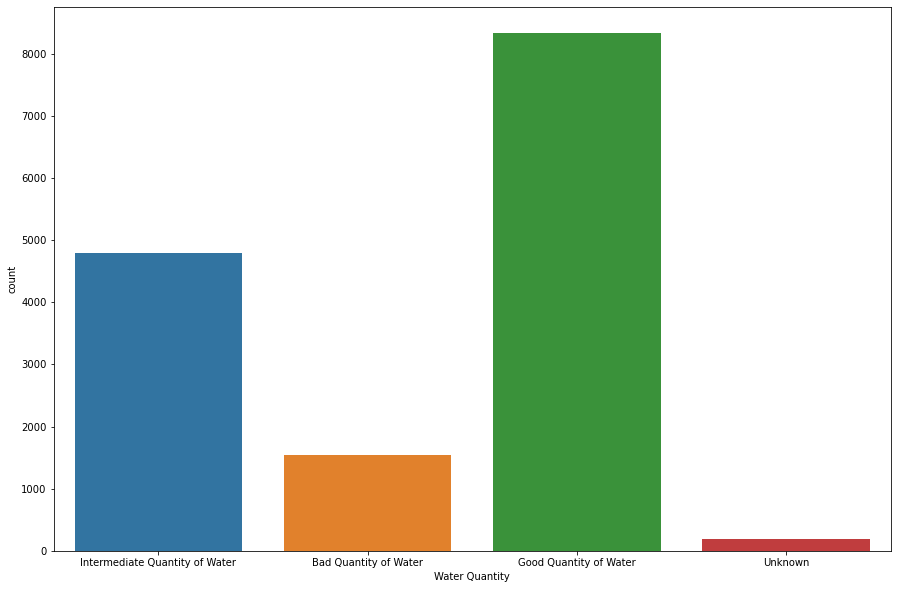

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water Quantity',data=df3)

In [44]:
category3 = []
for i in qualification3:
    if i == 'Bad Quantity of Water':category3.append(3)
    if i == 'Good Quantity of Water':category3.append(1)
    if i == 'Intermediate Quantity of Water':category3.append(2)
    if i == 'Unknown':category3.append(0)   
df3['Category'] = category3
df3

,Quantity_Group,Water Quantity,Category
0,seasonal,Intermediate Quantity of Water,2
1,insufficient,Intermediate Quantity of Water,2
2,insufficient,Intermediate Quantity of Water,2
3,dry,Bad Quantity of Water,3
4,enough,Good Quantity of Water,1
...,...,...,...
14845,enough,Good Quantity of Water,1
14846,insufficient,Intermediate Quantity of Water,2
14847,insufficient,Intermediate Quantity of Water,2
14848,insufficient,Intermediate Quantity of Water,2


<center><h1 style="color:#00FFFF" >5. Variable: Source</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Well Water Source?:</span><br>
A well is a deep hole or shaft dug into the ground to access natural resources. There are water wells, oil wells, gas wells, and more. Wells have been used in many cultures around the world for over 8,000 years. The first wells were likely dug by hand or with very simple tools. They provided access to groundwater that could be brought to the surface. As rain falls, it is absorbed into the soil. This drips down, providing water to many plants. It continues moving through layers until it passes the water table. The water table is the line where the soil stops and water starts. The water stops when it gets to rock that it can't move past. This creates open spaces where it gathers into underground pools. In fact, over 90% of the world's freshwater is underground. By digging down into one of these underground pools, a bucket can be placed in the water and then pulled up with a rope. Wells provide a reliable source of clean water to many homes, farms, and some industries. In America, more than 15 million homes have water wells. Of course, as the ground becomes contaminated, the groundwater can also become contaminated.
    
Well water is a private water source taken directly from the earth. To create a private well, a hole is drilled into the ground down to the aquifer—a permeable layer of rock that contains water. A pump system is then used to carry that water up and into your home.

Unlike tap water, which comes from a general municipal water supply, well water is not treated with chemicals like chlorine or chloramines to filter out bacteria and microorganisms. Instead, it is naturally filtered by the layers of rock and soil that it passes through—though it’s not guaranteed to be bacteria-free. Proper sealing, sufficient filtration, and a slow travel time between the aquifer and the ground surface can go a long way toward preventing any bacterial contamination.

If you purchase a home with a private well, you’ll need to be diligent about doing an annual check for bacteria. This test is easy and cheap to do on your own (about $50 total for the kit and the lab testing), and some rural counties provide the service themselves.
    
The first step to making a well is to find out where the water is underground. No one wants to drill down to find the water isn't there! Hiring a hydrogeologist or a groundwater surveyor can help identify the water table line, where to dig, and what material will need to be drilled through. It's also important to know about possible sources of contamination. A well near a dump or animal feeding area is likely to only provide dirty water. Once the proper area is identified and the type of material to drill through is known, the proper tool can be selected. This could be bored with an auger or rotary tool if the conditions are right. Another option is to smash out the ground with a percussion cable or even to cut through the ground with high-pressure water jets. After the shaft is the correct depth, a tube or casing is added to give stability to the shaft. This is important as it prevents the shaft from caving in and closing off the well. A cap is attached to the top of the well to prevent contamination and evaporation. Depending on the type of well, a spigot, pump, or bucket is added to make the water accessible.
There are a few different types of water wells based on how they are created, their diameter, and depth.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Shallow Well?:</span><br>
A shallow well is a hole which has been dug, bored, driven or drilled into the ground for the purpose of extracting water is a well. A well is considered to be shallow if it is less than 50 feet deep. The source of a well is an aquifer. An aquifer is an underground layer of permeable soil (such as sand or gravel) that contains water and allows the passage of water. Aquifers are replenished as rainfall seeps down through the soil. Ground water travels through permeable soil on top of hard or impermeable layers. Shallow wells usually are only deep enough to intercept the uppermost (or most easily reached) perched water table.
    
<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Shallow Well? </span>
The benefits of shallow wells is that they are less expensive due to lower labor and material costs. Your well pump for this setup is not submersible, which means it must be placed above ground in well housing. Fortunately, this means it is easier to access and service should any maintenance be needed.
Also, shallow wells can have lower levels of naturally occurring components, like magnesium and calcium (hard water culprits) as well as manganese and iron. It’s also possible for deeper wells to have higher levels of radioactivity than their shallower counterparts, depending on the local geology. However, this isn’t always the case in Arizona. Talk to your water well professional about the water quality in your local area.
    
<span style='font-weight:bold;color:#00FFFF'>What are the disadvantage of a Shallow Well? </span>
One of the downsides of shallow wells is that they tend to carry a higher risk of running dry, especially in arid climates. Drought-prone areas can experience a sustained lowering of the water table over the course of years, which means a shallow well may eventually be too shallow to reach the water.
Also, their proximity to the surface means they are prone to contamination from fertilized fields, septic systems, and other human activities and land uses. Shallow wells must be occasionally treated and inspected to make sure the water is clean.</p>


<p><span style='font-weight:bold;color:#fbec5d'>What is a Spring?:</span><br>
Springs occur when water pressure causes a natural flow of groundwater onto the earth's surface. As rainwater enters or "recharges" the aquifer, pressure is placed on the water already present. This pressure moves water through the cracks and tunnels within the aquifer, and this water flows out naturally to the surface at places called springs.When rivers flood, the pressure created by rising floodwaters causes many springs within the Suwannee River Basin to reverse flow and bring river water into the aquifer. This reverse flow is an important part of groundwater recharge and the health of the caves associated with the springs. Springs can be categorized in a number of ways, with the two main ones being discharge (the amount of water flow out of the spring) and spring water chemistry.
    
<span style='font-weight:bold;color:#00FFFF'>What is a Aquifer?:</span>    An aquifer is a body of porous rock or sediment saturated with groundwater. Groundwater enters an aquifer as precipitation seeps through the soil. It can move through the aquifer and resurface through springs and wells. Groundwater is the word used to describe precipitation that has infiltrated the soil beyond the surface and collected in empty spaces underground. There are two general types of aquifers: confined and unconfined. Confined aquifers have a layer of impenetrable rock or clay above them, while unconfined aquifers lie below a permeable layer of soil.
    
<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Spring? </span>  One of the best things about drinking spring water is the higher concentration of important nutrients, when compared to other kinds of drinking water. When spring water moves through the soil, it collects the so important minerals that your body needs to stay healthy and strong.Spring water is rich in minerals which is important when you consider that the human body is nearly two-thirds water. This natural resource is essential for purification, removal of toxins, and it allows every organ (including your brain which is 75% water) to function as it should. Having access to pure, clean, and mineral-rich drinking water should never be considered an expensive luxury, it is essential for a healthy mind and body and it is what humans have been consuming for millennia.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Machine Dbh?:</span><br>
A plunger pump is a type of positive displacement pump where the high-pressure seal is stationary and a smooth cylindrical plunger slides through the seal. This makes them different from piston pumps and allows them to be used at higher pressures. This type of pump is often used to transfer municipal and industrial sewage.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Machine Dbh? </span>   </p>


<p><span style='font-weight:bold;color:#fbec5d'>What is a River?:</span><br>
A river is a ribbon-like body of water that flows downhill from the force of gravity. A river can be wide and deep, or shallow enough for a person to wade across. A flowing body of water that is smaller than a river is called a stream, creek, or brook. Some rivers flow year-round, while others flow only during certain seasons or when there has been a lot of rain. The largest rivers can be thousands of miles long. The erosional power of rivers can form geologic wonders like the Grand Canyon.
All rivers have a starting point where water begins its flow. This source is called a headwater. The headwater can come from rainfall or snowmelt in mountains, but it can also bubble up from groundwater or form at the edge of a lake or large pond. The other end of a river is called its mouth, where water empties into a larger body of water, such as a lake or ocean. Along the way, rivers may pass through wetlands where plants slow down the water and filter out pollutants.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a River? </span> The economic benefits of rivers are, they are the sources of freshwater which is essential for the survival of all living beings. Water bodies are used for navigation purposes. They act like a connecting point to different places. The flowing water is used for the generation of electricity. Hydro power is considered to be cheap and clean energy source  </p>


<p><span style='font-weight:bold;color:#fbec5d'>What is Rainwater Harvesting?:</span><br>
Rainwater harvesting is defined by Wikipedia as “the accumulation and deposition of rainwater for reuse on-site, rather than allowing it to run off.” While this definition is basic, the practice of rainwater harvesting is greatly varied from where the rainwater is collected from to how the rainwater is ultimately used.
A more appropriate definition of rainwater harvesting might be the collection of rainwater from a surface that allows for the rainwater to be stored and used at a later time. In a typical rainwater harvesting situation, rainwater is collected from an impervious surface such as the roof of a building and then stored inside of a tank or cistern. Rainwater can be collected from other surfaces as well. Other surfaces include parking lots, roadways, driveways, and even land surfaces (once surface runoff from the land surface begins).

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of Rainwater Harvesting? </span> Rainwater harvesting has many benefits but the main one is that it is a sustainable water management practice that can be implemented by anyone on many different levels, from a simple rain barrel to a comprehensive rainwater harvesting system that integrates with an irrigation system or household plumbing. Rainwater harvesting helps utilities reduce peak demands during summer months, saving treated water for more important and appropriate water uses. While rainwater can be a perfect primary water source for many uses and situations, it is also a great backup water supply for emergency situations.  </p>


<p><span style='font-weight:bold;color:#fbec5d'>What is a Hand Dtw?:</span><br>
DTWs are the drilled wells of large diameter borehole (about 55 cm) with gravel pack around the screen and upper well casing of sufficient diameter (35cm) and length (about 25m) to permit installation of turbine pump. The usual depth of DTW is about 60 to 100m depending on the aquifer. The prime mover of a DTW is either a diesel engine or an electric motor mounted above the well and connected to the pump by shaft. The pump that is force mode type is always submerged below normal operating water level in the well and discharge is no longer limited by the severe restrictions on drawdown. DTW has a normal capacity of two-cusec (56 lps) which can irrigate 24 to 32 ha of cultivable land. Deep tubewells were first introduced in Bangladesh to supply potable water in large quantities to major towns in order to meet their domestic and industrial demands. This DTW technology was first introduced for irrigation purposes during the early 1960s.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Hand Dtw? </span>   </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Lake?:</span><br>
A lake is a body of water that is surrounded by land. There are millions of lakes in the world. They are found on every continent and in every kind of environment—in mountains and deserts, on plains, and near seashores. Lakes vary greatly in size. Some measure only a few square meters and are small enough to fit in your backyard. Such small lakes are often referred to as ponds. Other lakes are so big that they are called seas. The Caspian Sea, in Europe and Asia, is the world’s largest lake, with an area of more than 370,000 square kilometers (143,000 square miles). Lakes also vary greatly in depth. The world’s deepest lake is Lake Baikal, in Russia. Its bottom is nearly 2 kilometers (more than 1 mile) below the surface in places. Although Lake Baikal covers less than half the surface area of Lake Superior—one of North America’s Great Lakes—it is about four times deeper and holds nearly as much water as all five of the Great Lakes combined. Other lakes are so shallow that a person could easily wade across them.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Lake? </span>Lakes are highly valued for their recreational, aesthetic, scenic, and water-supply qualities, and the water they contain is one of the most treasured of our natural resources. Lakes constitute important habitats and food resources for a diverse array of fish, aquatic life, and wildlife.   </p>


<p><span style='font-weight:bold;color:#fbec5d'>What is a Dam?:</span><br>
A dam is a structure built across a river or stream to hold back water. People have used different materials to build dams over the centuries. Ancient dam builders used natural materials such as rocks or clay. Modern-day dam builders often use concrete. Manmade dams create artificial lakes called reservoirs. Reservoirs can be used to store water for farming, industry, and household use. They also can be used for fishing, boating, and other leisure activities. People have used dams for many centuries to help prevent flooding.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Dam? </span>As a water source, dams have many advantages and applications. The application of dams can include cooking, cleaning, bathing, washing, drinking water, farming and for other cultivation purposes. When there’s excess flow of water, dams help by storing water in reservoirs. Dams also function to release water during times of low flow when natural streams are inadequate to meet demands. Since the water stored in dams is fresh water, it can then be used for drinking water in nearby towns and cities. Some cities get their water from rivers and streams in other states. The water is transported through large canals and waterways. All purposes are kept in mind when constructing dams. Some functions of dams can include: Irrigation, Drinking Water, Electrical Generation, Used in Flood Control, Water Storage, Power, Transportation, Irrigation and Recreational Purposes.  </p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Source?:</span><br>
</p>
<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br></p>

In [45]:
raw_info["source"].value_counts()

shallow well            4316
spring                  4195
machine dbh             2747
river                   2352
rainwater harvesting     568
hand dtw                 234
lake                     185
dam                      184
other                     49
unknown                   20
Name: source, dtype: int64

In [46]:
sources = raw_info["source"].value_counts().index.tolist()
sources

['shallow well',
 'spring',
 'machine dbh',
 'river',
 'rainwater harvesting',
 'hand dtw',
 'lake',
 'dam',
 'other',
 'unknown']

In [47]:
sources1 = raw_info["source"].value_counts().tolist()
sources1

[4316, 4195, 2747, 2352, 568, 234, 185, 184, 49, 20]

In [48]:
sources2 = raw_info["source"].tolist()
len(sources2)

14850

In [49]:
qualification4 = []
for source in sources2:
    if source == 'shallow well' :
        qualification4.append('Good Source')
    elif source == 'spring':
        qualification4.append('Good Source')
    elif source == 'machine dbh':
        qualification4.append('Good Source')
    elif source == 'river' :
        qualification4.append('Intermediate Source')
    elif source == 'rainwater harvesting':
         qualification4.append('Bad Source')
    elif source == 'hand dtw':
        qualification4.append('Intermediate Source')
    elif source == 'lake' or 'dam':
        qualification4.append('Bad Source')
len(qualification4)

14850

In [50]:
df4 = pd.DataFrame({'Sources':sources2,'Source Quality':qualification4})
df4

,Sources,Source Quality
0,rainwater harvesting,Bad Source
1,spring,Good Source
2,rainwater harvesting,Bad Source
3,shallow well,Good Source
4,spring,Good Source
...,...,...
14845,river,Intermediate Source
14846,shallow well,Good Source
14847,dam,Bad Source
14848,river,Intermediate Source


<AxesSubplot:xlabel='Source Quality', ylabel='count'>

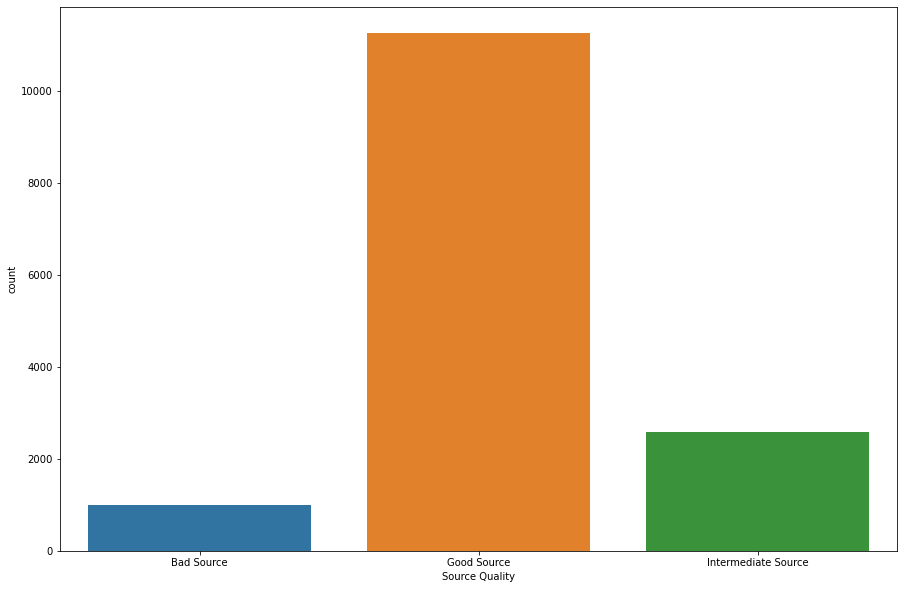

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x='Source Quality',data=df4)

In [52]:
category4 = []
for i in qualification4:
    if i == 'Bad Source':category4.append(3)
    if i == 'Good Source':category4.append(1)
    if i == 'Intermediate Source':category4.append(2)
    if i == 'Unknown':category4.append(0)   
df4['Category'] = category4
df4

,Sources,Source Quality,Category
0,rainwater harvesting,Bad Source,3
1,spring,Good Source,1
2,rainwater harvesting,Bad Source,3
3,shallow well,Good Source,1
4,spring,Good Source,1
...,...,...,...
14845,river,Intermediate Source,2
14846,shallow well,Good Source,1
14847,dam,Bad Source,3
14848,river,Intermediate Source,2


<center><h1 style="color:#00FFFF" >6. Variable: Source Type</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is the Soruce Type of a well?:</span><br>
The importance of water cannot be understated. We use it for food preparation, drinking, cleaning, irrigation, transport, recreation, and industrial purposes. Water is arguably the most important natural resource and it can be classified into two broad categories – fresh and salty water. Freshwater refers to water that has less than 1% dissolved salts.

Due to climate change, some water sources that have previously been readily available and accessible have become unreliable, fluctuating, diminishing, or even wiped out. below we will have a look at the main sources of water.
</p>
<p><span style='font-weight:bold;color:#fbec5d'>What is a Shallow Well?:</span><br>
A shallow well is a hole which has been dug, bored, driven or drilled into the ground for the purpose of extracting water is a well. A well is considered to be shallow if it is less than 50 feet deep. The source of a well is an aquifer. An aquifer is an underground layer of permeable soil (such as sand or gravel) that contains water and allows the passage of water. Aquifers are replenished as rainfall seeps down through the soil. Ground water travels through permeable soil on top of hard or impermeable layers. Shallow wells usually are only deep enough to intercept the uppermost (or most easily reached) perched water table.</p>


<p><span style='font-weight:bold;color:#fbec5d'>What is a Spring?:</span><br>
Springs occur when water pressure causes a natural flow of groundwater onto the earth's surface. As rainwater enters or "recharges" the aquifer, pressure is placed on the water already present. This pressure moves water through the cracks and tunnels within the aquifer, and this water flows out naturally to the surface at places called springs.When rivers flood, the pressure created by rising floodwaters causes many springs within the Suwannee River Basin to reverse flow and bring river water into the aquifer. This reverse flow is an important part of groundwater recharge and the health of the caves associated with the springs. Springs can be categorized in a number of ways, with the two main ones being discharge (the amount of water flow out of the spring) and spring water chemistry.
    
An aquifer is a body of porous rock or sediment saturated with groundwater. Groundwater enters an aquifer as precipitation seeps through the soil. It can move through the aquifer and resurface through springs and wells. Groundwater is the word used to describe precipitation that has infiltrated the soil beyond the surface and collected in empty spaces underground. There are two general types of aquifers: confined and unconfined. Confined aquifers have a layer of impenetrable rock or clay above them, while unconfined aquifers lie below a permeable layer of soil.
    

<p><span style='font-weight:bold;color:#fbec5d'>What is a Borehole?:</span><br>
A borehole is the generalised term for any narrow shaft drilled in the ground, either vertically or horizontally. A borehole may be constructed for many different purposes, including the extraction of water or other liquid (such as petroleum) or gases (such as natural gas), as part of a geotechnical investigation or environmental site assessment, for mineral exploration, or as a pilot hole for installing piers or underground utilities. Boreholes used as water wells are described in more depth in that section.Typically, a borehole used as a well is completed by installing a vertical pipe (casing) and well screen to keep the borehole from collapsing. This also helps prevent surface contaminants from entering the borehole and protects any installed pump from drawing in sand and sediment. When completed in this manner the borehole is then more commonly called a well: whether it is a water well, oil well or natural gas extraction well.</p>


<p><span style='font-weight:bold;color:#fbec5d'>What is a Dam?:</span><br>
A dam is a structure built across a river or stream to hold back water. People have used different materials to build dams over the centuries. Ancient dam builders used natural materials such as rocks or clay. Modern-day dam builders often use concrete. Manmade dams create artificial lakes called reservoirs. Reservoirs can be used to store water for farming, industry, and household use. They also can be used for fishing, boating, and other leisure activities. People have used dams for many centuries to help prevent flooding.


<p><span style='font-weight:bold;color:#fbec5d'>What is a River/Lake?:</span><br>
A lake is a body of water that is surrounded by land. There are millions of lakes in the world. They are found on every continent and in every kind of environment—in mountains and deserts, on plains, and near seashores. Lakes vary greatly in size. Some measure only a few square meters and are small enough to fit in your backyard. Such small lakes are often referred to as ponds. Other lakes are so big that they are called seas. The Caspian Sea, in Europe and Asia, is the world’s largest lake, with an area of more than 370,000 square kilometers (143,000 square miles). Lakes also vary greatly in depth. The world’s deepest lake is Lake Baikal, in Russia. Its bottom is nearly 2 kilometers (more than 1 mile) below the surface in places. Although Lake Baikal covers less than half the surface area of Lake Superior—one of North America’s Great Lakes—it is about four times deeper and holds nearly as much water as all five of the Great Lakes combined. Other lakes are so shallow that a person could easily wade across them.

A river is a ribbon-like body of water that flows downhill from the force of gravity. A river can be wide and deep, or shallow enough for a person to wade across. A flowing body of water that is smaller than a river is called a stream, creek, or brook. Some rivers flow year-round, while others flow only during certain seasons or when there has been a lot of rain. The largest rivers can be thousands of miles long. The erosional power of rivers can form geologic wonders like the Grand Canyon.
All rivers have a starting point where water begins its flow. This source is called a headwater. The headwater can come from rainfall or snowmelt in mountains, but it can also bubble up from groundwater or form at the edge of a lake or large pond. The other end of a river is called its mouth, where water empties into a larger body of water, such as a lake or ocean. Along the way, rivers may pass through wetlands where plants slow down the water and filter out pollutants.
</p>
<p><span style='font-weight:bold;color:#fbec5d'>What is a Rainwater Harvesting?:</span><br>
Rainwater harvesting is defined by Wikipedia as “the accumulation and deposition of rainwater for reuse on-site, rather than allowing it to run off.” While this definition is basic, the practice of rainwater harvesting is greatly varied from where the rainwater is collected from to how the rainwater is ultimately used.
A more appropriate definition of rainwater harvesting might be the collection of rainwater from a surface that allows for the rainwater to be stored and used at a later time. In a typical rainwater harvesting situation, rainwater is collected from an impervious surface such as the roof of a building and then stored inside of a tank or cistern. Rainwater can be collected from other surfaces as well. Other surfaces include parking lots, roadways, driveways, and even land surfaces (once surface runoff from the land surface begins).

 be used for drinking water in nearby towns and cities. Some cities get their water from rivers and streams in other states. The water is transported through large canals and waterways. All purposes are kept in mind when constructing dams. Some functions of dams can include: Irrigation, Drinking Water, Electrical Generation, Used in Flood Control, Water Storage, Power, Transportation, Irrigation and Recreational Purposes. </p>

<p><span style='font-weight:bold;color:#fbec5d'>How does the Source Type of a well effect the functionality of a well?:</span><br>
<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Shallow Well? </span>
The benefits of shallow wells is that they are less expensive due to lower labor and material costs. Your well pump for this setup is not submersible, which means it must be placed above ground in well housing. Fortunately, this means it is easier to access and service should any maintenance be needed.
Also, shallow wells can have lower levels of naturally occurring components, like magnesium and calcium (hard water culprits) as well as manganese and iron. It’s also possible for deeper wells to have higher levels of radioactivity than their shallower counterparts, depending on the local geology. However, this isn’t always the case in Arizona. Talk to your water well professional about the water quality in your local area.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Spring? </span>  One of the best things about drinking spring water is the higher concentration of important nutrients, when compared to other kinds of drinking water. When spring water moves through the soil, it collects the so important minerals that your body needs to stay healthy and strong.Spring water is rich in minerals which is important when you consider that the human body is nearly two-thirds water. This natural resource is essential for purification, removal of toxins, and it allows every organ (including your brain which is 75% water) to function as it should. Having access to pure, clean, and mineral-rich drinking water should never be considered an expensive luxury, it is essential for a healthy mind and body and it is what humans have been consuming for millennia.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of Rainwater Harvesting? </span> Rainwater harvesting has many benefits but the main one is that it is a sustainable water management practice that can be implemented by anyone on many different levels, from a simple rain barrel to a comprehensive rainwater harvesting system that integrates with an irrigation system or household plumbing. Rainwater harvesting helps utilities reduce peak demands during summer months, saving treated water for more important and appropriate water uses. While rainwater can be a perfect primary water source for many uses and situations, it is also a great backup water supply for emergency situations. </p>

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of a Dam? </span>As a water source, dams have many advantages and applications. The application of dams can include cooking, cleaning, bathing, washing, drinking water, farming and for other cultivation purposes. When there’s excess flow of water, dams help by storing water in reservoirs. Dams also function to release water during times of low flow when natural streams are inadequate to meet demands. Since the water stored in dams is fresh water, it can then.

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of Borehole? </span>
Borehole water is rich in naturally occurring minerals and hasn’t been treated or altered with any man-made chemical additives.
When you’re drinking water from the municipal supply, the water has inevitably been treated and chlorinated in an effort to render the water “safe for human consumption”. This process, while removing harmful bacteria growing in dams and other large stagnant bodies of water, also removes all the naturally occurring nutrients and minerals found in natural groundwater sources. When you drink the water straight from your personal groundwater source, it has been filtered and cleaned for you by mother earth herself, while leaving behind all the good-for-you minerals! Not only is borehole water better for you from a water-consumption perspective, it is also typically kinder and gentler to skin if you’re showering and/or bathing in it. Water from the municipal supply is chemically altered and can be bad for skin and hair and cause adverse reactions, especially in those with allergies and hyper-sensitive skin and/or eyes.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Source?:</span><br>
<span style='font-weight:bold;color:#00FFFF'>What are the disadvantage of a Shallow Well? </span>
One of the downsides of shallow wells is that they tend to carry a higher risk of running dry, especially in arid climates. Drought-prone areas can experience a sustained lowering of the water table over the course of years, which means a shallow well may eventually be too shallow to reach the water.
Also, their proximity to the surface means they are prone to contamination from fertilized fields, septic systems, and other human activities and land uses. Shallow wells must be occasionally treated and inspected to make sure the water is clean.</p>
<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br></p>

In [53]:
raw_info["source_type"].value_counts()

shallow well            4316
spring                  4195
borehole                2981
river/lake              2537
rainwater harvesting     568
dam                      184
other                     69
Name: source_type, dtype: int64

In [54]:
raw_info["source_type"].value_counts().index.tolist()

['shallow well',
 'spring',
 'borehole',
 'river/lake',
 'rainwater harvesting',
 'dam',
 'other']

In [55]:
raw_info["source_type"].value_counts().tolist()

[4316, 4195, 2981, 2537, 568, 184, 69]

In [56]:
source_type = raw_info["source_type"].tolist()
len(source_type)

14850

In [57]:
qualification5 = []
for source in source_type:
    if source == 'shallow well' :
        qualification5.append('Good Source')
    elif source == 'spring':
        qualification5.append('Good Source')
    elif source == 'borehole':
        qualification5.append('Intermediate Source')
    elif source == 'river/lake' :
        qualification5.append('Bad Source')
    elif source == 'rainwater harvesting':
         qualification5.append('Bad Source')
    elif source == 'other':
        qualification5.append('Unknown')
    elif source == 'dam':
        qualification5.append('Bad Source')
len(qualification5)

14850

In [58]:
df5 = pd.DataFrame({'Source_Type':source_type,'Source Quality':qualification5})
df5

,Source_Type,Source Quality
0,rainwater harvesting,Bad Source
1,spring,Good Source
2,rainwater harvesting,Bad Source
3,shallow well,Good Source
4,spring,Good Source
...,...,...
14845,river/lake,Bad Source
14846,shallow well,Good Source
14847,dam,Bad Source
14848,river/lake,Bad Source


<AxesSubplot:xlabel='Source Quality', ylabel='count'>

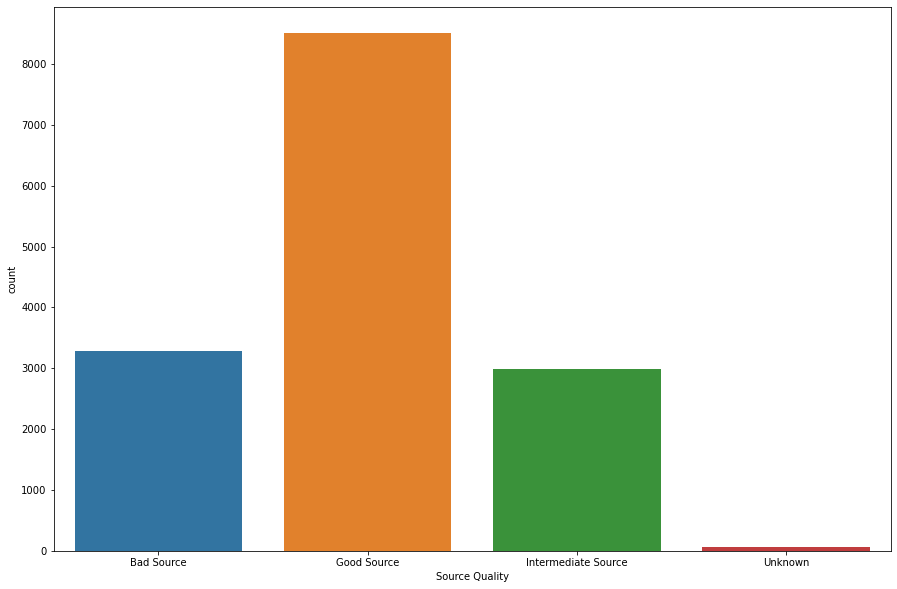

In [59]:
plt.figure(figsize=(15,10))
sns.countplot(x='Source Quality',data=df5)

In [60]:
category5 = []
for i in qualification5:
    if i == 'Bad Source':category5.append(3)
    if i == 'Good Source':category5.append(1)
    if i == 'Intermediate Source':category5.append(2)
    if i == 'Unknown':category5.append(0)   
df5['Category'] = category5
df5

,Source_Type,Source Quality,Category
0,rainwater harvesting,Bad Source,3
1,spring,Good Source,1
2,rainwater harvesting,Bad Source,3
3,shallow well,Good Source,1
4,spring,Good Source,1
...,...,...,...
14845,river/lake,Bad Source,3
14846,shallow well,Good Source,1
14847,dam,Bad Source,3
14848,river/lake,Bad Source,3


<center><h1 style="color:#00FFFF" >7. Variable: Source Class</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is the Soruce Class of a well?:</span><br>
There are a couple of different types of water that are able to meet the water supply needs that a community has, which include surface water and groundwater. Surface water includes any freshwater that’s sent into wetlands, stream systems, and lakes. On the other hand, groundwater exists in subterranean aquifers that are situated underground. Most groundwater is obtained from snowmelt and rainfall that gets into the bedrock via the surrounding soil. As this water flows downward, it will settle between cavities and fractures that are found in rock layers.

To better understand the difference between groundwater and surface water, groundwater is considered to be underground water. On the other hand, surface water is freshwater that exists above ground. Most of the groundwater contained in the earth is situated within half a mile or less from the surface. Once the water reaches an impermeable layer of the earth, the water will pool and start flowing upwards. When groundwater pools, it can appear on the surface as groundwater-fed lakes and springs.

Even though surface water has many useful applications, groundwater aquifers are able to provide the majority of the drinking water supply throughout the U.S. To understand how these types of water can be used, it’s important to look at the many differences between groundwater and surface water. This article goes into detail about what these differences are and how they can impact you.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Groundwater?:</span><br>
Groundwater is the water found underground in the cracks and spaces in soil, sand and rock. It is stored in and moves slowly through geologic formations of soil, sand and rocks called aquifers. Aquifers are typically made up of gravel, sand, sandstone, or fractured rock, like limestone. Water can move through these materials because they have large connected spaces that make them permeable. The speed at which groundwater flows depends on the size of the spaces in the soil or rock and how well the spaces are connected. Groundwater can be found almost everywhere. The water table may be deep or shallow; and may rise or fall depending on many factors. Heavy rains or melting snow may cause the water table to rise, or heavy pumping of groundwater supplies may cause the water table to fall. Groundwater supplies are replenished, or recharged, by rain and snow melt that seeps down into the cracks and crevices beneath the land’s surface. In some areas of the world, people face serious water shortages because groundwater is used faster than it is naturally replenished. In other areas groundwater is polluted by human activities.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Surface Water?:</span><br>
Surface water is any body of water found on the Earth’s surface, including both the saltwater in the ocean and the freshwater in rivers, streams, and lakes. A body of surface water can persist all year long or for only part of the year. Surface water is any body of water above ground, including streams, rivers, lakes, wetlands, reservoirs, and creeks. The ocean, despite being saltwater, is also considered surface water. Surface water participates in the hydrologic cycle, or water cycle, which involves the movement of water to and from the Earth’s surface. Precipitation and water runoff feed bodies of surface water. Evaporation and seepage of water into the ground, on the other hand, cause water bodies to lose water. Water that seeps deep into the ground is called groundwater. Surface water and groundwater are reservoirs that can feed into each other. While surface water can seep underground to become groundwater, groundwater can resurface on land to replenish surface water. Springs are formed in these locations.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How does the Source Class of a well effect the functionality of a well?:</span><br>
<span style='font-weight:bold;color:#00FFFF'>What are the benefits of Groundwater? </span> The advantages of groundwater by use of groundwater for drinking have significant benefits are groundwater is generally not toxic if it is away (at least 20 m) from sanitation. The water is filtered by sand and stones. Thus, the groundwater stays clean and fresh. Since bore wells will be closed, there really is no chance of exposure to pollution. Because there is no risk possibility of children or animals falling into it covered. The deepwater temperature remains stable. It feels cool in summer, warm during the winter. But since bore is shallow, there are many more possibilities of water becoming accessible throughout the summer season. India is more dependent on groundwater drained from aquifers than any other nation, accounting for almost a quarter of the global demand for water, as per the World Bank. In India, over 90% of groundwater is being used for agricultural production. The residual 24 billion cubic meters comprise 85 percent of the country’s drinkable water. Nearly 80% of India’s 1.35 billion citizens rely on groundwater with both drinking and irrigation. The groundwater is an important source for the needs of the population for water supply. Groundwater is now a popular source for individual homes and small towns, although rivers and lakes are common sources for urban centers. While roughly 98% of liquid freshwater resides as groundwater, much of it is very deep. This renders pumping quite costly, restricting the complete production and exploitation of all groundwater resources.</p>

<span style='font-weight:bold;color:#00FFFF'>What are the benefits of Surface Water? </span> Lakes, ponds, rivers, and streams hold less than one thousandth of a percent of the water on the planet, but they serve many critical functions for the environment and for human life. These fresh surface waters sustain ecological systems and provide habitat for many plant and animal species. They also support a myriad of human uses, including drinking water, irrigation, wastewater treatment, livestock, industrial uses, hydropower, and recreation. Fresh surface waters also influence the extent and condition of other water resources, including ground water, wetlands, and coastal systems downstream.

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Source Class?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br></p>

In [61]:
raw_info["source_class"].value_counts()

groundwater    11492
surface         3289
unknown           69
Name: source_class, dtype: int64

In [62]:
source_class = raw_info["source_class"].tolist()
len(source_class)

14850

In [63]:
qualification6 = []
for source in source_class:
    if source == 'groundwater' :
        qualification6.append('Intermediate Source')
    elif source == 'surface':
        qualification6.append('Bad Source')
    elif source == 'unknown':
        qualification6.append('Unknown')
len(qualification6)

14850

In [64]:
df6 = pd.DataFrame({'Source_Class':source_class,'Source Class Quality':qualification6})
df6

,Source_Class,Source Class Quality
0,surface,Bad Source
1,groundwater,Intermediate Source
2,surface,Bad Source
3,groundwater,Intermediate Source
4,groundwater,Intermediate Source
...,...,...
14845,surface,Bad Source
14846,groundwater,Intermediate Source
14847,surface,Bad Source
14848,surface,Bad Source


<AxesSubplot:xlabel='Source Class Quality', ylabel='count'>

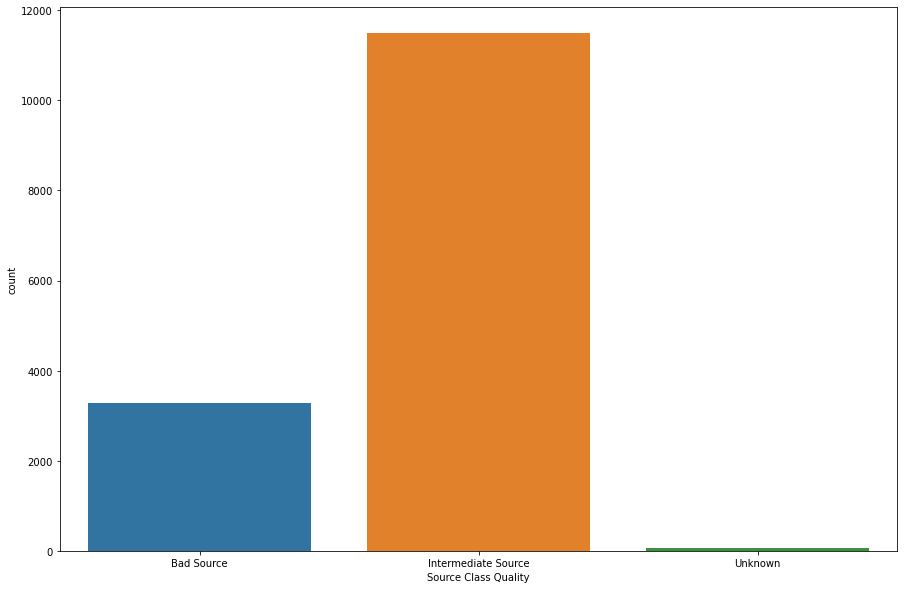

In [65]:
plt.figure(figsize=(15,10))
sns.countplot(x='Source Class Quality',data=df6)

In [66]:
category6 = []
for i in qualification6:
    if i == 'Bad Source':category6.append(3)
    if i == 'Good Source':category6.append(1)
    if i == 'Intermediate Source':category6.append(2)
    if i == 'Unknown':category6.append(0)   
df6['Category'] = category6
df6

,Source_Class,Source Class Quality,Category
0,surface,Bad Source,3
1,groundwater,Intermediate Source,2
2,surface,Bad Source,3
3,groundwater,Intermediate Source,2
4,groundwater,Intermediate Source,2
...,...,...,...
14845,surface,Bad Source,3
14846,groundwater,Intermediate Source,2
14847,surface,Bad Source,3
14848,surface,Bad Source,3


<center><h1 style="color:#00FFFF" >8. Variable: Waterpoint Type</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is the Waterpoint Type of a well?:</span><br>
Ever wondered what the main responsibility of a Well Point is? Since they belong deep down in the ground, you don't come across them that often once they have been installed. You may not be able to see them work but you have probably run into the water they help produce. Well points have a couple different names including Sand Points, Drive Points or Drive Well Points. A Well Point is a piece of pipe that has openings large enough to allow water to enter but also small enough to keep the water-bearing formation in place. There are a variety of well point designs. The well point is then drove into the ground, passing the soil and clay until it has reached water bearing gravel and sand.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Communal Standpipe?:</span><br>
In some Middle Eastern, Caribbean and North African countries a standpipe is used as a communal water supply for neighbourhoods which lack individual housing water service. In areas such as Morocco, standpipes often yield unreliable service and lead to water scarcity for large numbers of people. Standpipes are a long-standing delivery mechanism in many African countries. Until the 1980s, standpipes that dispensed ‘free’ water were a common way of getting water to low-income households. Political ideology determined who paid for this water. Some independent utilities would bill government but in many public utilities
(e.g. municipal water departments), neither the state nor the user was invoiced for the water consumed. Over time, the inability to recover costs resulted in growing
utility deficits and eventually to the decline of free public standpipes as a key component of delivery to low-income households. </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Hand Pump?:</span><br>
Hand pumps are a type of human operated positive displacement pump. They are a common sight in many rural areas where piped water connections do not exist. Hand pumps have a simple and robust design, require little maintenance, and are easy to operate, this has led to their widespread application throughout the world. Hand pumps are pumps which are operated manually by hand as opposed via electricity or air. Hand pumps can be of centrifugal or positive displacement technology where they can be piston or double diaphragm. Centrifugal hand pumps require a foot valve in order to be self-priming. Their operation can be semi-rotary where the handle is limited in motion to a 180° radius, or rotary where their motion is in a 360° radius. Positive displacement hand pumps can be single or double-acting. Single-acting pumps operate in one direction only, meaning when the lever is pulled forward or pulled up the pump draws in fluid and then when pushed or lowered the pump discharges the fluid. 
A double-acting hand pump operates in both directions meaning when the pump is pulled forward or pulled up the pump draws in fluid as well as discharges at the same time.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Communal Standpipe Multiple?:</span><br></p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Imporved Spring?:</span><br>
Improved spring means any artificial opening or excavation in the ground, however made, including any physical alteration at the point of discharge regardless of whether it results in any increase in the yield of ground water, from which ground water is sought or can be obtained or through which it flows under natural pressures or is artificially withdrawn. Sample 1 Sample 2 Sample 3 Based on 10 documents. </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Cattle Trough?:</span><br></p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Dam?:</span><br>
A dam is a structure built across a river or stream to hold back water. People have used different materials to build dams over the centuries. Ancient dam builders used natural materials such as rocks or clay. Modern-day dam builders often use concrete. Manmade dams create artificial lakes called reservoirs. Reservoirs can be used to store water for farming, industry, and household use. They also can be used for fishing, boating, and other leisure activities. People have used dams for many centuries to help prevent flooding. </p>

<p><span style='font-weight:bold;color:#fbec5d'>How does the Waterpoint Type of a well effect the functionality of a well?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Waterpoint Type?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br></p>

In [67]:
raw_info["waterpoint_type"].value_counts()

communal standpipe             7106
hand pump                      4396
other                          1630
communal standpipe multiple    1508
improved spring                 175
cattle trough                    34
dam                               1
Name: waterpoint_type, dtype: int64

In [68]:
raw_info["waterpoint_type_group"].value_counts()

communal standpipe    8614
hand pump             4396
other                 1630
improved spring        175
cattle trough           34
dam                      1
Name: waterpoint_type_group, dtype: int64

In [69]:
waterpoint_type= raw_info["waterpoint_type_group"].tolist()
len(waterpoint_type)

14850

In [70]:
qualification7 = []
for waterpoint in waterpoint_type:
    if waterpoint == 'communal standpipe' :
        qualification7.append('Good Waterpiont')
    elif waterpoint == 'hand pump':
        qualification7.append('Good Waterpiont')
    elif waterpoint == 'other':
        qualification7.append('Unknown Waterpiont')
    elif waterpoint == 'improved spring':
        qualification7.append('Good Waterpiont')
    elif waterpoint == 'cattle trough':
        qualification7.append('Intermediate Waterpiont')
    elif waterpoint == 'dam':
        qualification7.append('Bad Waterpiont')
len(qualification7)

14850

In [71]:
df7 = pd.DataFrame({'Water_Piont_Type':waterpoint_type,'Water Piont Class':qualification7})
df7

,Water_Piont_Type,Water Piont Class
0,other,Unknown Waterpiont
1,communal standpipe,Good Waterpiont
2,other,Unknown Waterpiont
3,other,Unknown Waterpiont
4,communal standpipe,Good Waterpiont
...,...,...
14845,communal standpipe,Good Waterpiont
14846,hand pump,Good Waterpiont
14847,communal standpipe,Good Waterpiont
14848,communal standpipe,Good Waterpiont


<AxesSubplot:xlabel='Water Piont Class', ylabel='count'>

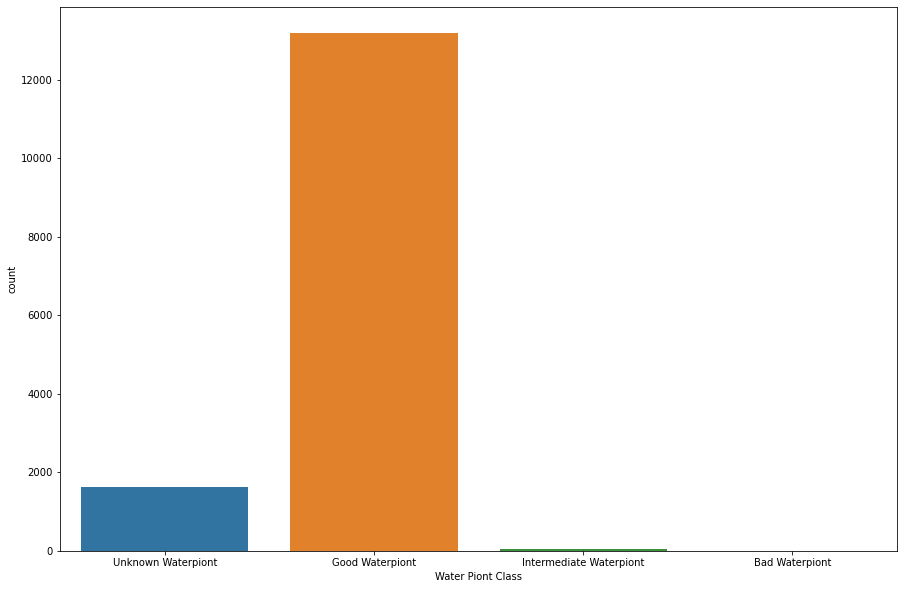

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water Piont Class',data=df7)

In [73]:
category7 = []
for i in qualification7:
    if i == 'Bad Waterpiont':category7.append(3)
    if i == 'Good Waterpiont':category7.append(1)
    if i == 'Intermediate Waterpiont':category7.append(2)
    if i == 'Unknown Waterpiont':category7.append(0)   
df7['Category'] = category7
df7

,Water_Piont_Type,Water Piont Class,Category
0,other,Unknown Waterpiont,0
1,communal standpipe,Good Waterpiont,1
2,other,Unknown Waterpiont,0
3,other,Unknown Waterpiont,0
4,communal standpipe,Good Waterpiont,1
...,...,...,...
14845,communal standpipe,Good Waterpiont,1
14846,hand pump,Good Waterpiont,1
14847,communal standpipe,Good Waterpiont,1
14848,communal standpipe,Good Waterpiont,1


<center><h1 style="color:#00FFFF" >9. Variable: Basin</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Basin of a well?:</span><br>
A basin is a depression, or dip, in the Earth’s surface. Basins are shaped like bowls, with sides higher than the bottom. They can be oval or circular in shape, similar to a sink or tub you might have in your own bathroom. Some are filled with water. Others are empty. Basins are formed by forces above the ground (like erosion) or below the ground (like earthquakes). They can be created over thousands of years or almost overnight.  A basin is also the spot where a river drains — like the famed Mississippi River Basin. That’s one big bowl! Three agents of erosion are prolific creators of basins on land—rivers, glaciers, and groundwater. Rivers form large drainage basins by eroding mountainous areas through tentacle-like systems of incising tributaries. The MISSISSIPPI-Missouri River and the Ohio River basins are examples of this basin type. Glaciers create basins by plucking (quarrying) huge chunks of rock as they move over underlying bedrock. They reveal the basins after they melt back during warm periods. The size of glacier basins varies considerably. The now extinct Laurentide ice sheet created the Hudson Bay Basin in northern CANADA.<br>

<span style='font-weight:bold;color:#00FFFF'>The three different types of Basins:</span>
The major types of basins are river drainage basins, structural basins, and ocean basins.<br>
<span style='color:#00FFFF'>River Drainage Basin:</span> A river drainage basin is an area drained by a river and all of its tributaries. A river basin is made up of many different watersheds.<br>
    
<span style='color:#00FFFF'>Structural Basin:</span> Structural basins are formed by tectonic activity. Tectonic activity is the movement of large pieces of the Earth’s crust, called tectonic plates. Tectonic activity is responsible for such phenomena as earthquakes and volcanoes. The natural processes of weathering and erosion also contribute to forming structural basins.<br>
    
<span style='color:#00FFFF'>Oceans Basins:</span> Ocean basins are the largest depressions on Earth. Edges of the continents, called continental shelves, form the sides of ocean basins. There are five major ocean basins, coordinating with the major oceans of the world: the Pacific basin, the Atlantic basin, the Indian basin, the Arctic basin, and the Southern basin.</p>

<center>The nine major basins of Tazinina are  <span style='color:#00FFFF'> Pangani River, Wami/Ruvo River Basin, Rufiji River Basin, Ruvuma River and Southern Coastel Basin,<br> Lake Nyasa Basin, Internal Drainage Basin, Lake Rukwa Basin, Lake Tanganyika Basin and Lake Victoria Basin</span>.</center>
<center>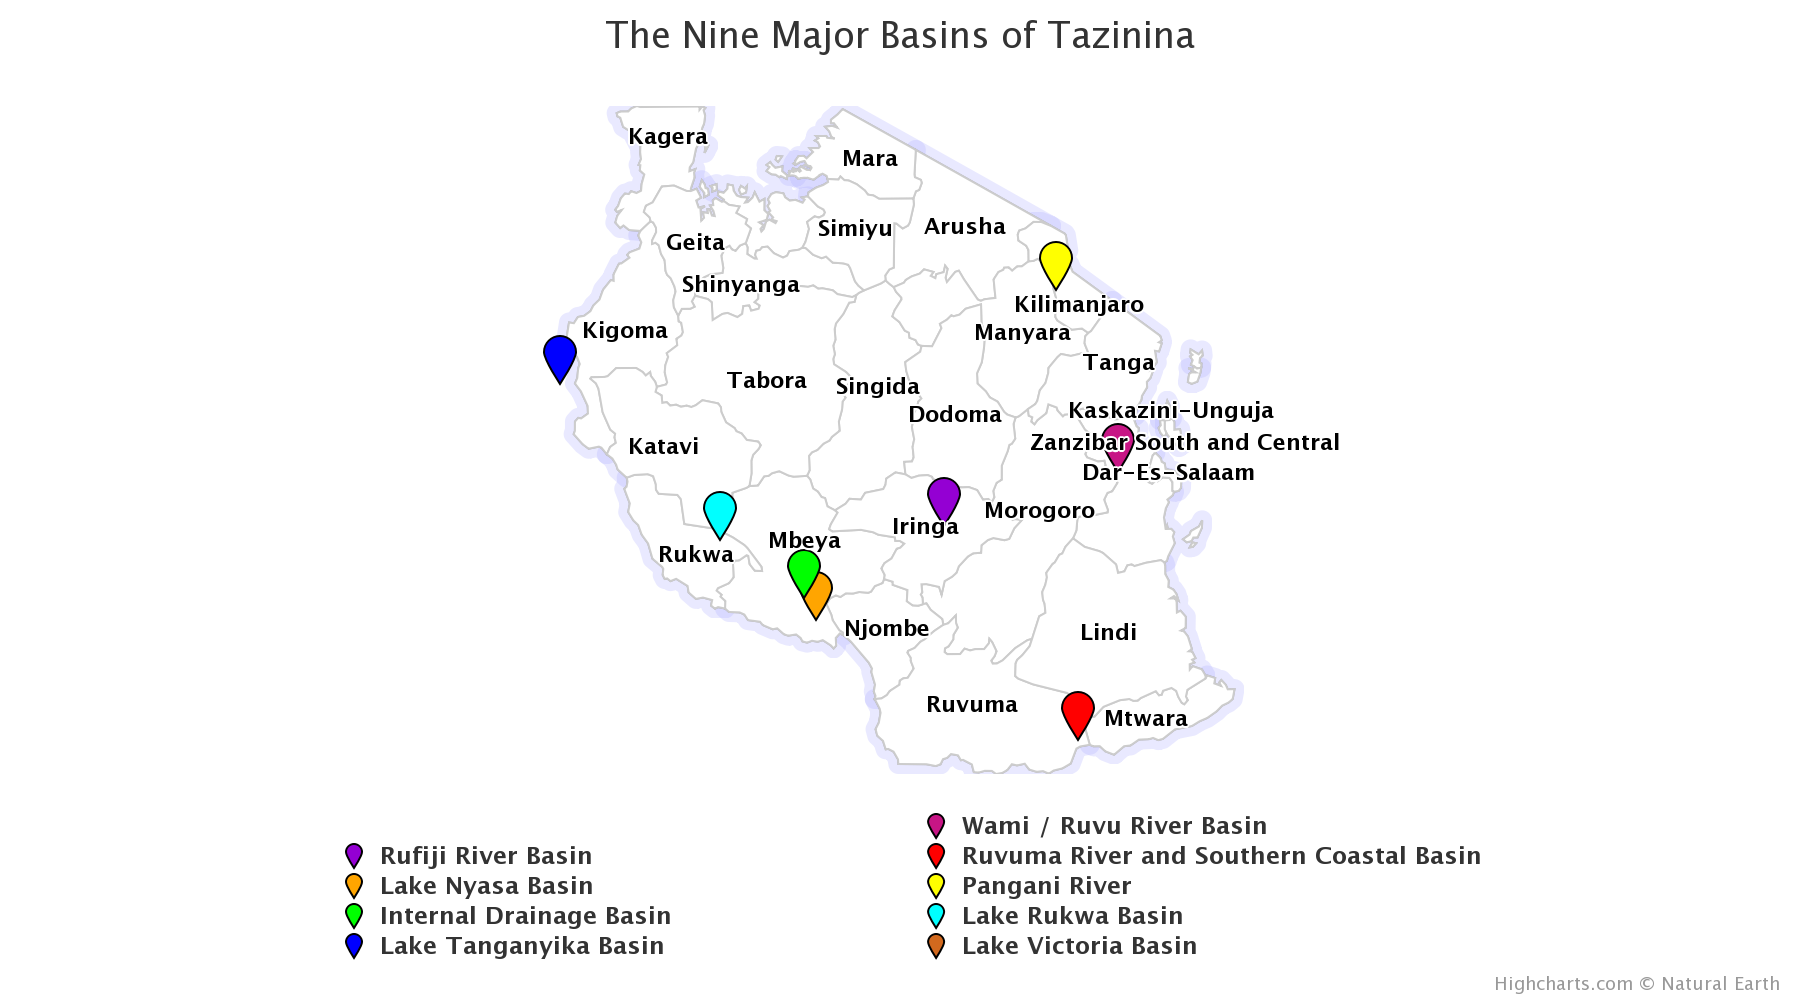</center>

<p><span style='font-weight:bold;color:#fbec5d'>Lake Victoria:</span><br>
Lake Victoria, also called Victoria Nyanza, largest lake in Africa and chief reservoir of the Nile, lying mainly in Tanzania and Uganda but bordering on Kenya. Its area is 26,828 square miles (69,484 square km). Among the freshwater lakes of the world, it is exceeded in size only by Lake Superior in North America. It is an irregular quadrilateral in shape, and its shores, save on the west, are deeply indented. Lake Victoria receives 80 percent of its water from direct rainfall. Average evaporation on the lake is between 2.0 and 2.2 metres (6.6 and 7.2 ft) per year, almost double the precipitation of riparian areas. Lake Victoria receives its water additionally from rivers, and thousands of small streams. The Kagera River is the largest river flowing into this lake, with its mouth on the lake's western shore. Lake Victoria is drained solely by the Nile River near Jinja, Uganda, on the lake's northern shore. In the Kenya sector, the main influent rivers are the Sio, Nzoia, Yala, Nyando, Sondu Miriu, Mogusi, and Migori. The lake is considered a shallow lake considering its large geographic area with a maximum depth of approximately 80 metres (260 ft) and an average depth of 40 metres (130 ft).</p>

<p><span style='font-weight:bold;color:#fbec5d'>Pangani River:</span><br>
The Pangani River (pin-gi'nee) (also called Luffu and Jipe Ruvu, especially in older sources, and probably once called Rhaptus) is a major river of northeastern Tanzania. It has two main sources: the Ruvu, which rises as Lumi at Kilimanjaro, passes through Lake Jipe, and empties into the Nyumba ya Mungu Reservoir, and the Kikuletwa, coming from the west and mainly fed by Mount Meru in Arusha Region, which also enters into the Nyumba ya Mungu Reservoir in Kilimanjaro Region. Just after leaving the reservoir the stream becomes the main Pangani, which empties into the Indian Ocean in Tanga Region at the Tangan port town of Pangani. The Pangani river basin covers an area of 43,650km2 with 95% in Tanzania and 5% in Kenya. The river begins as a series of small streams draining from Mt. Kilimanjaro, Mt
Meru and the Pare and Usambara mountain ranges and flows into the Indian Ocean. Over three million people derive their livelihoods from the Pangani River Basin, primarily from agriculture and fisheries. Its fertile soils and ample rainfall have earned it the reputation of being the breadbasket of Tanzania. An
estimated 55,000 hectares of the basin is intensely irrigated. The 500km long river also serves a series of hydro-electric power stations, which, combined,
contribute towards 17% of Tanzania’s national electricity needs.</p>

<p><span style='font-weight:bold;color:#fbec5d'>Rufiji River Basin:</span><br>
The Rufiji River lies entirely within Tanzania. It is also the largest and longest river in the country. The river is formed by the confluence of the Kilombero and Luwegu rivers. It is approximately 600 kilometres (370 mi) long, with its source in southwestern Tanzania and its mouth on the Indian Ocean opposite Mafia Island across the Mafia Channel, in Pwani Region. Its principal tributary is the Great Ruaha River. It is navigable for approximately 100 kilometres (62 mi). The Rufiji river is approximately 200 kilometres (120 mi) south of Dar es Salaam. The river's delta contains the largest mangrove forest in eastern Africa. The Basin covers 11 administrative regions and 26 districts. The Basin itself is managed by the Rufiji Basin Water Board under the Ministry of Water. Figure 1 illustrates the district administrative boundaries within the Basin.</p>

<p><span style='font-weight:bold;color:#fbec5d'>Internal Drainage Basin:</span><br>
The Internal Drainage Basin receives in average an annual precipitation of 100 km3 out of which as much as ca. 93 km3 returns back to the atmosphere and 6.97 km3 (about 7%) turns into surface and ground water as renewable freshwater resources. Ecosystem is the largest water user in the Internal Drainage Basin. About 65% of the renewable water resources in the basin is required for replenishment of environmental demands, and nearly 16% is currently utilised for domestic, industries, irrigation, and livestock sectors. In the latter portion, Irrigation sector accounts for about 63% of human-consumptive uses, which makes it the second rank in total water demands. The Transboundary Internal Drainage Basin is Tanzania’s 2nd Largest basin (considering total area of the basin shared with Kenya); however, regarding part of the basin that is located inside Tanzania, it is the 3rd largest basin that encompasses more than 15% of the area of the country. The basin is stretched from central parts of Tanzania to the north-east, where it crosses borders with Kenya. Waters that run from precipitation, flow into several lakes and swamps scattered in the basin.</p>

<p><span style='font-weight:bold;color:#fbec5d'>Lake Tanganyika :</span><br>
Lake Tanganyika  is an African Great Lake. It is the second-oldest freshwater lake in the world, the second-largest by volume, and the second-deepest, in all cases after Lake Baikal in Siberia. It is the world's longest freshwater lake. The lake is shared among four countries—Tanzania, the Democratic Republic of the Congo (DRC), Burundi, and Zambia, with Tanzania (46%) and DRC (40%) possessing the majority of the lake. It drains into the Congo River system and ultimately into the Atlantic.
Lake Tanganyika is situated within the Albertine Rift, the western branch of the East African Rift, and is confined by the mountainous walls of the valley. It is the largest rift lake in Africa and the second-largest lake by volume in the world. It is the deepest lake in Africa and holds the greatest volume of fresh water on the continent, accounting for 16% of the world's available fresh water. It extends for 676 km (420 mi) in a general north–south direction and averages 50 km (31 mi) in width. The lake covers 32,900 km2 (12,700 sq mi), with a shoreline of 1,828 km (1,136 mi), a mean depth of 570 m (1,870 ft) and a maximum depth of 1,471 m (4,826 ft) (in the northern basin). It holds an estimated 18,900 km3 (4,500 cu mi).Ocean.</p>

<p><span style='font-weight:bold;color:#fbec5d'>Wami / Ruvu River Basin :</span><br>
The Wami-Ruvu Basin is comprised of the Wami and Ruvu Rivers. The Wami flows from its source in the Eastern Arc Mountain ranges of Tanzania in a south-eastwardly direction from dense forests, across fertile agricultural plains and through grassland savannahs along its course to the Indian Ocean. The Wami River Sub-Basin extends from the semi-arid Dodoma region to the humid inland swamps in the Morogoro region to Saadani Village in the coastal Bagamoyo district.The Ruvu sub-basin extends from Morogoro to the west of Dar es Salaam through the Coast and Dar es Salaam regions. The Ruvu sub-basin is in mostly low lying areas, except for the Uluguru Mountains in the extreme West.   The population of both the Wami and Ruvu basins combined is approximately 5.4 million.</p>

<p><span style='font-weight:bold;color:#fbec5d'>Lake Nyasa Basin:</span><br>
Tanzania mainland is comprised of nine hydrologic basins. Lake Nyasa Basin is the smallest basin, which involves 3.5% of the area of the country. The basin is in the form of a relatively narrow strip that bounds Lake Nyasa along its shorelines in the south to southwest Tanzania. Lake Nyasa is internationally shared between Tanzania, Malawi, and Mozambique. Ecosystem is the largest water user in Lake Nyasa Basin. More than 32% of the renewable water resources in the basin is required
for replenishment of environmental demands, and nearly 3% is currently utilised for domestic, industries, irrigation, and livestock sectors. In the latter portion, Irrigation sector accounts for about 85% of human-consumptive uses. Hydropower generation requires 23% of the renewable waters, which is mostly considered a non-consumptive demand in the basin. Water supply access in Tanzania – mainly in rural areas – is realised through "water points", i.e. usually a public place for people to obtain clean water. Water from water points is potable water consumed for the people or livestock. Means of access to water at the supply points are usually in form of communal standpipes. However, other shapes of access to water are present such as water kiosks, water tanks, hand pumps, developed or undeveloped springs, and cattle troughs.</p>

<p><span style='font-weight:bold;color:#fbec5d'>Ruvuma / Southern Coast Basin:</span><br>
Tanzania mainland is comprised of nine hydrologic basins. Ruvuma and Southern Coast Basin is the 5 the largest basin that embraces more than 11% of the area of the country. The basin is stretched along the southern Tanzania – where Ruvuma River establishes border with Mozambique – to the southeast coasts of Indian Ocean. Waters that run from precipitation over the basin, flow eventually into the Indian Ocean. Environment is the largest water user in Ruvuma and Southern Coast Basin. More than 32% of the renewable water resources in the basin is required for replenishment of environmental demands, and less than 3% is currently utilised for domestic, irrigation, and livestock sectors. Non-consumptive water uses are mainly environmental flows that account for 41% of surface waters in the basin. There is no hydropower plant in the basin at present. Ruvuma and Southern Coast Basin receives in average an annual precipitation of 104.8 km3 out of which as much as 89.9 km3
returns back to the atmosphere and 14.9 km3 (ca. 14%) turns into surface and ground water as renewable freshwater resources.</p>

<p><span style='font-weight:bold;color:#fbec5d'>Lake Rukwa Basin:</span><br>
Lake Rukwa is an endorheic lake located the Rukwa Valley of Rukwa Region, Songwe Region and Katavi Region in southwestern Tanzania. The lake is the third largest inland body of water in the country. Lake Rukwa, lake, southwestern Tanzania, Eastern Africa. It is part of an inland drainage system in the Rukwa Trough, which probably at one time belonged to the East African Rift Valley system of which Lake Nyasa is a part. The lake covers an area of about 1,000 square miles (2,600 square km) and lies midway between Lake Tanganyika and Lake Nyasa, at an elevation of about 2,600 feet (800 m); it has an average depth of 10 feet (3 m). The British explorer John Hanning Speke heard it described as an impassable swamp, and in 1880 Joseph Thomson, a noted Scottish geologist and explorer, saw the lake from a distance. It has a drainage basin with an area of 31,000 square miles (80,000 square km) in Tanzania. There is no outlet from the lake, and at times it is completely dry. In 1929 it shrank to a length of about 30 miles (50 km), but 10 years later it expanded to about 80 miles (130 km) with a width of 25 miles (40 km). The lake’s fluctuations in size are caused by the varying inflow of streams. Its water is brackish, and there are salt pans near its southwestern end. Crocodile and hippopotamus inhabit the lake, and fish abound. Subsistence and commercial fishing operations centred on the lake are important to the local population. The lake lies over the epicentre of an earthquake-prone zone.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How does the Basin Type of a well effect the functionality of a well?:</span><br>
    
<span style='font-weight:bold;color:#00FFFF'>What are the benefits of Rufii River Basin?</span> Apart from being rich in water resources and biodiversity, the Basin is endowed with a good climate, fertile soil, minerals and human resource. It is known for it agricultural production and is often called the "bread basket" of Tanzania. Within the Basin, there are important national parks (Kitulo, Ruaha, Mikumi, Udzungwa and Uluguru), large game reserves (Selous, Rungwa, Usangu, Mpanga/ Kipengere, and Lunda), forest reserves, mining, and pasture for livestock. Because of its large agricultural, hydroelectric and other potential, the Basin is the focus of Government of Tanzania, donor and private development plans. It has also attracted large numbers of people migrating to the area seeking land for cropping and to raise livestock. According to the national census, the Districts within the Basin had 9,032,089 people in 2012; this compares to 3,055,051 in 2002 (URT 2013b). Historical and projected future land use change is thus dynamic. Figures 2 though 4 illustrate projected land use from 2013 to 2050, taking into account past land use change patterns and projected population. The expansion of cultivation is assumed to be constrained to be within suitable agricultural areas and outside of protected areas (Olson et al. 2015).</p>
<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Basin Type?:</span><br></p>
<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span><br></p>

In [82]:
%%html
<center><script src="https://code.highcharts.com/maps/highmaps.js"></script>
<script src="https://code.highcharts.com/maps/modules/exporting.js"></script>
<script src="https://code.highcharts.com/maps/modules/accessibility.js"></script>
<figure class="highcharts-figure">
    <div id="map"></div>
</figure></center>

In [19]:
%%js
(async () => {

    const topology = await fetch(
        'https://code.highcharts.com/mapdata/countries/tz/tz-all.topo.json'
    ).then(response => response.json());
    const data = [
        ['tz-mw', 10], ['tz-kr', 11], ['tz-pw', 12], ['tz-mo', 13],
        ['tz-nj', 14], ['tz-zs', 15], ['tz-zw', 16], ['tz-km', 17],
        ['tz-mt', 18], ['tz-rv', 19], ['tz-pn', 20], ['tz-ps', 21],
        ['tz-zn', 22], ['tz-sd', 23], ['tz-sh', 24], ['tz-as', 25],
        ['tz-my', 26], ['tz-ma', 27], ['tz-si', 28], ['tz-mb', 29],
        ['tz-rk', 30], ['tz-ds', 31], ['tz-do', 32], ['tz-tb', 33],
        ['tz-li', 34], ['tz-ge', 35], ['tz-kl', 36], ['tz-tn', 37],
        ['tz-ka', 38], ['tz-ir', 39]
    ];

    // Create the chart
 Highcharts.mapChart('map', {

        chart: {
            map: topology,
            width:900,
            height:500
        },

        title: {
            text: 'The Nine Major Basins of Tazinina'
        },

        accessibility: {
            description: 'Map where city locations have been defined using latitude/longitude.'
        },

        mapNavigation: {
            enabled: true
        },

        tooltip: {
            headerFormat: '',
            pointFormat: '<b>{point.name}</b><br>Lat: {point.lat}, Lon: {point.lon}'
        },
       plotOptions: {
            mappoint: {
                keys: ['id', 'lat', 'lon', 'name', 'y'],
                marker: {
                    lineWidth: 1,
                    lineColor: '#000',
                    symbol: 'mapmarker',
                    radius: 8
                },
                dataLabels: {
                    enabled: false
                }
            }
        },


        series: [{
            allAreas: true,
            name: 'Coastline',
            states: {
                inactive: {
                    opacity: 0.2
                }
            },
            dataLabels: {
                enabled: false
            },
            enableMouseTracking: false,
            showInLegend: false,
            borderColor: 'blue',
            opacity: 0.3,
            borderWidth: 10,
            linecap: 'round'
        }, {
            allAreas: true,
            name: 'Countries',
            states: {
                inactive: {
                    opacity: 1
                }
            },
            dataLabels: {
                enabled: false
            },
            enableMouseTracking: false,
            showInLegend: false,
            borderColor: 'rgba(0, 0, 0, 0.25)'
        },{
            data: data,
            name: '',
            color: 'white',
            states: {
                hover: {
                    color: 'white'
                }
            },
            dataLabels: {
                enabled: true,
                format: '{point.name}'
            }
        },
            {
            name: 'Wami / Ruvu River Basin',
            color: '#C71585',
            data: 
                [[
                    'Wami / Ruvu River Basin',
                    -6.885559882222717, 
                    38.54316268420707,
                    'Wami / Ruvu River Basin',
                    
                ]],
            type: 'mappoint'
            },{
            name: 'Rufiji River Basin',
            color: '#9400D3',
            data: [[
                    'Rufiji River Basin',
                    -7.739159565571637, 
                    35.717692868558565,
                    'Rufiji River Basin',
                    
                ]],
            type: 'mappoint'
            },{
            name: 'Ruvuma River and Southern Coastal Basin',
            color: '#FF0000',
            data:
                [[
                    'Ruvuma River and Southern Coastal Basin',
                    -11.18793663847635, 
                    37.93053055391856,
                    'Ruvuma River and Southern Coastal Basin',
                   
                ]],
            type: 'mappoint'
            },{
            name: 'Lake Nyasa Basin',
            color: '#FFA500',
            data:
                [[
                    'Lake Nyasa Basin',
                    -9.253622687583805, 
                    33.64832729740597,
                    'Lake Nyasa Basin',
                    
                ]],
            type: 'mappoint'
            },{
            name: 'Pangani River',
            color: '#FFFF00',
            data:
                [[
                    'Pangani River',
                    -3.957528580420586, 
                    37.51452378410233,
                    'Pangani River',
                    
                ]],
            type: 'mappoint'
            },{
            name: 'Internal Drainage Basin',
            color: '#00FF00',
            data:
                [[
                    'Internal Drainage Basin',
                    -8.904136097302313, 
                    33.44243144529893,
                    'Internal Drainage Basin',
                    
                ]],
            type: 'mappoint'
            },{
            name: 'Lake Rukwa Basin',
            color: '#00FFFF',
            data:
                [[
                    'Lake Rukwa Basin',
                   -7.965018627129822, 
                    32.07119238715025,
                    'Lake Rukwa Basin',
                    
                ]],
            type: 'mappoint'
            },{
            name: 'Lake Tanganyika Basin',
            color: '#0000FF',
            data:
                [[
                    'Lake Tanganyika Basin',
                    -5.440291039317557, 
                    29.51119973025754,
                    'Lake Tanganyika Basin',
                    
                ]],
            type: 'mappoint'
            },{
            name: 'Lake Victoria Basin',
            color: '#D2691E',
            data:
                [[
                    'Lake Victoria Basin',
                    -0.7058566132070954, 
                    32.83942599440682,
                    'Lake Victoria Basin',]
                    
                ],
            type: 'mappoint'
         }
        ]
    });

})();


<IPython.core.display.Javascript object>

In [6]:
raw_info["basin"].value_counts()

NameError: name 'raw_info' is not defined

In [75]:
basins= raw_info["basin"].tolist()
len(basins)

14850

In [76]:
qualification8 = []
for basin in basins:
    if basin == 'Lake Tanganyika' :
        qualification8.append('Good Basin')
    elif basin == 'Lake Nyasa':
        qualification8.append('Good Basin')
    elif basin == 'Lake Victoria':
        qualification8.append('Bad Basin')
    elif basin == 'Ruvuma / Southern Coast':
        qualification8.append('Bad Basin')
    elif basin == 'Rufiji':
        qualification8.append('Bad Basin')
    elif basin == 'Lake Rukwa':
        qualification8.append('Intermediate Basin')
    elif basin == 'Pangani':
        qualification8.append('Intermediate Basin')
    elif basin == 'Wami / Ruvu':
        qualification8.append('Intermediate Basin')
    elif basin == 'Internal':
        qualification8.append('Bad Basin')
len(qualification8)

14850

In [77]:
df8 = pd.DataFrame({'Water_Basins':basins,'Basin Class':qualification8})
df8

,Water_Basins,Basin Class
0,Internal,Bad Basin
1,Pangani,Intermediate Basin
2,Internal,Bad Basin
3,Ruvuma / Southern Coast,Bad Basin
4,Ruvuma / Southern Coast,Bad Basin
...,...,...
14845,Wami / Ruvu,Intermediate Basin
14846,Pangani,Intermediate Basin
14847,Internal,Bad Basin
14848,Lake Nyasa,Good Basin


<AxesSubplot:xlabel='Basin Class', ylabel='count'>

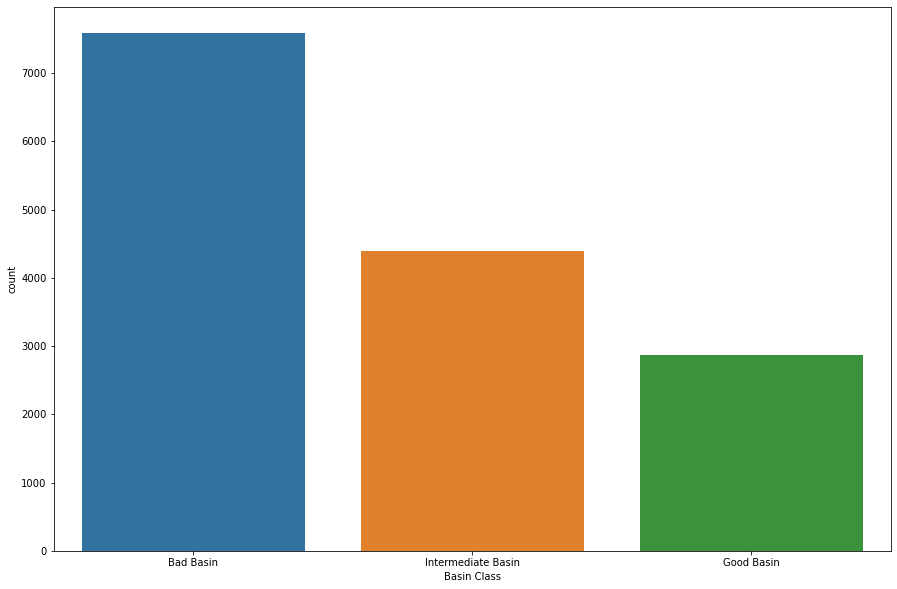

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='Basin Class',data=df8)

In [79]:
category8 = []
for i in qualification8:
    if i == 'Bad Basin':category8.append(3)
    if i == 'Good Basin':category8.append(1)
    if i == 'Intermediate Basin':category8.append(2)
    if i == 'Unknown Basin':category8.append(0)   
df8['Category'] = category8
df8

,Water_Basins,Basin Class,Category
0,Internal,Bad Basin,3
1,Pangani,Intermediate Basin,2
2,Internal,Bad Basin,3
3,Ruvuma / Southern Coast,Bad Basin,3
4,Ruvuma / Southern Coast,Bad Basin,3
...,...,...,...
14845,Wami / Ruvu,Intermediate Basin,2
14846,Pangani,Intermediate Basin,2
14847,Internal,Bad Basin,3
14848,Lake Nyasa,Good Basin,1


<center><h1 style="color:#00FFFF" >10. Variable: Population Density</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is Population Density?</span><br>
Population density is the concentration of individuals within a species in a specific geographic locale. Population density data can be used to quantify demographic information and to assess relationships with ecosystems, human health, and infrastructure. A population is a subgroup of individuals within the same species that are living and breeding within a geographic area. The number of individuals living within that specific location determines the population density, or the number of individuals divided by the size of the area. Population density can be used to describe the location, growth, and migration of many organisms. In the case of humans, population density is often discussed in relation to urbanization, immigration, and population demographics. Dense population clusters generally coincide with geographical locations often referred to as city, or as an urban or metropolitan area; sparsely populated areas are often referred to as rural. These terms do not have globally agreed upon definitions, but they are useful in general discussions about population density and geographic location.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a High and Low Population Density?</span><br>
<span style='color:#00FFFF'>Sparesely, Moderately and Densely Populated</span> are the three main categories in population density to define how populated a country or region is.
    
<span style='color:#00FFFF'>Sparsely Populated</span> simply defines an area that contains few people. Generally speaking, sparsely populated areas are usually rather challenging places to live. When discussing these challenges, geographers usually break them into physical factors and human factors. For our purposes, we'll start with physical factors.Sparse means thinly dispersed or scattered, so sparsely populated would mean that there were few people scattered about the area spoken of. An example might be a county which is a large area, but with farms located far apart across it. Regions where population is between 1 and 49 persons per square km are considered as areas of moderate population density
    
<span style='color:#00FFFF'>Moderately Populated</span> area refers to places where average number of people live per unit area. These places have comparatively lower population density than that of densely populated areas. These places are neither scarcely populated neither densely. Moderately populated area refers to places where average number of people live per unit area.These places have comparatively lower population density than that of densely populated areas. Regions where population is between 50 and 99 persons per square km are considered as areas of moderate population density. They fall between densely and sparsely populated regions. These regions are in general agriculturally developed and semi-urban in nature. Industries have begun to develop here. Examples are Iran, Iraq and Eastern Europe.
    
<span style='color:#00FFFF'>Densely Populated</span>  clusters generally coincide with geographical locations often referred to as city, or as an urban or metropolitan area; sparsely populated areas are often referred to as rural. These terms do not have globally agreed upon definitions, but they are useful in general discussions about population density and geographic location. If an area, such as a country, region, or city, is described as densely populated, this means that there are many people living there compared with another similar-sized area. At world level, the regions where the population is 100 and above persons per square km are considered as areas of high population density. The density of population is very high along the fertile river valleys and industrial regions of the world. Examples are Japan and Korea.

</p>

<center>Below is Map of the  <span style='color:#00FFFF'>Population Density of the 24 Regions in Tazanina</span> that are in the Dataset. </center>
<center>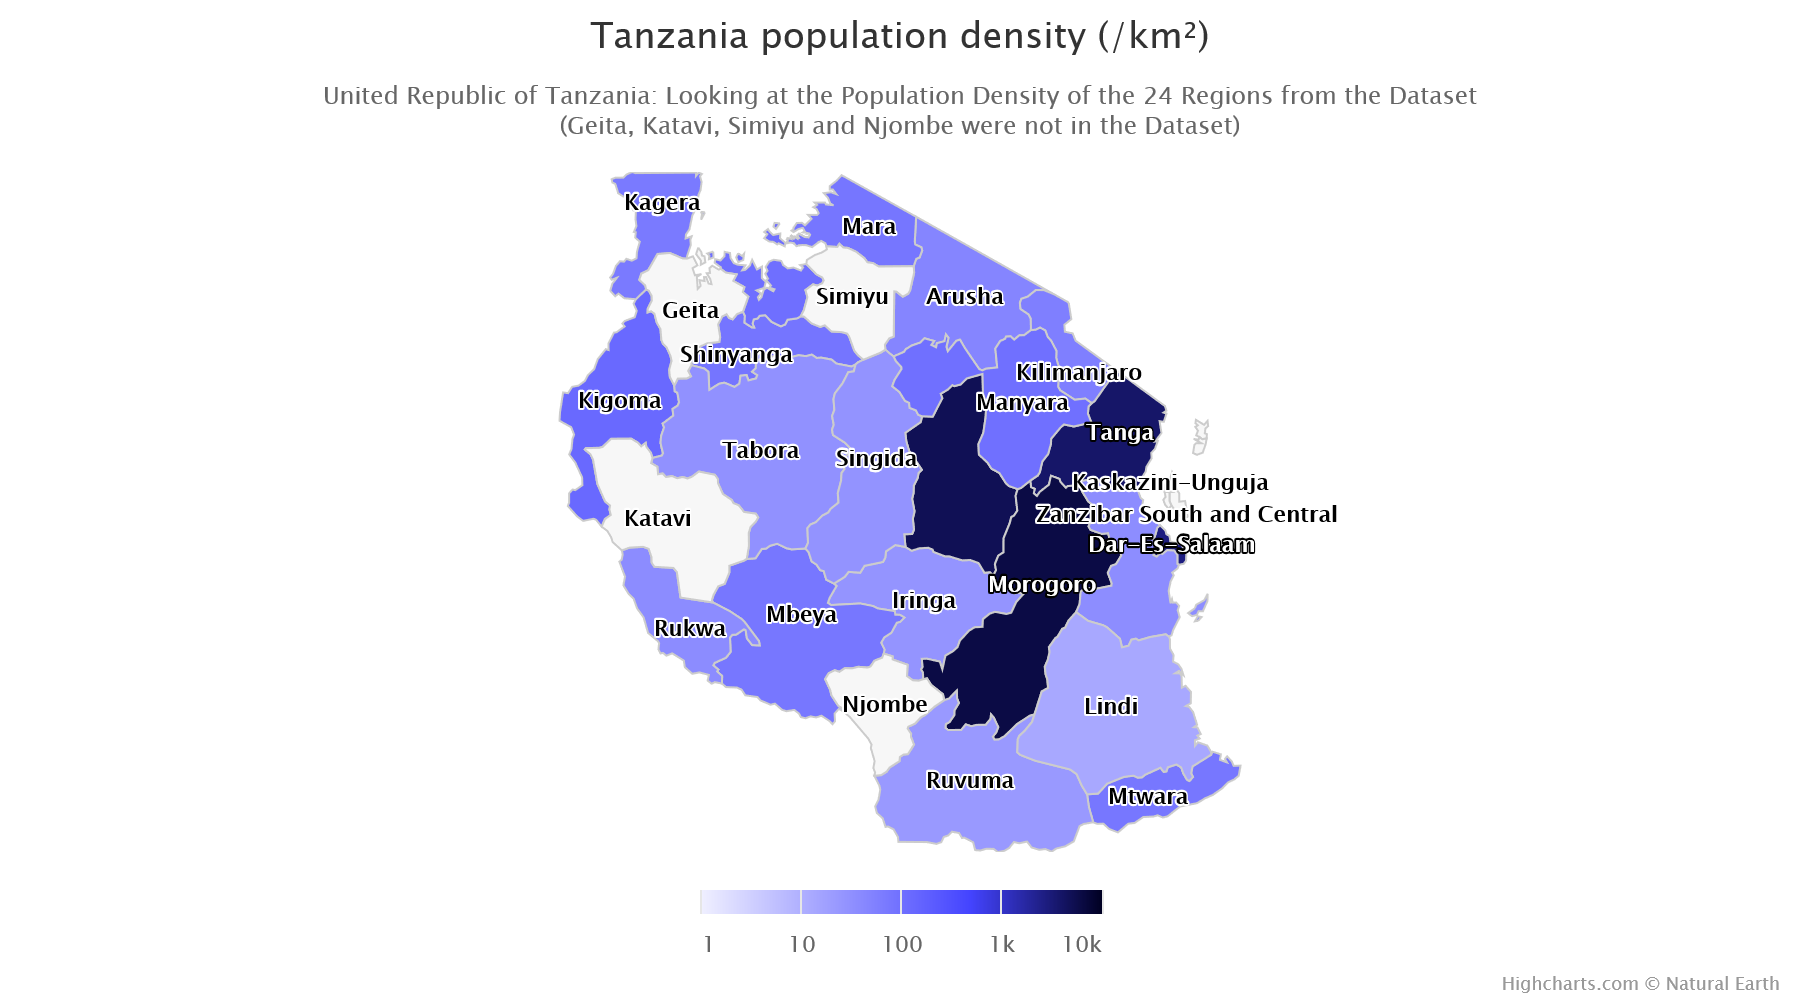</center>

<span style='font-weight:bold;color:#00FFFF'>The three different types of Popultion Density: </span>Putting all the 24 regions in Tanzania from the dataset into the three categories of Population Density.<br>
<span style='color:#00FFFF'>Sparsely Populated:</span> <br>
    
<span style='color:#00FFFF'>Moderately Populated:</span> <br>
    
<span style='color:#00FFFF'>Densely Populated:</span> </p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Population Density of a Region effect the functionality of a well?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Population Density?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [132]:
%%html
<script src="https://code.highcharts.com/maps/highmaps.js"></script>
<script src="https://code.highcharts.com/maps/modules/exporting.js"></script>
<div id="den"></div>

In [131]:
%%js
(async () => {

    const topology = await fetch(
        'https://code.highcharts.com/mapdata/countries/tz/tz-all.topo.json'
    ).then(response => response.json());

    // Prepare demo data. The data is joined to map using value of 'hc-key'
    // property by default. See API docs for 'joinBy' for more info on linking
    // data and map.
    const data = [
        ['tz-ir', 27], ['tz-ds', 2744], ['tz-do', 4985],['tz-tn', 3816], ['tz-mo', 6162],
        ['tz-mb', 76], ['tz-km', 124], ['tz-kr', 69], ['tz-mt', 76],['tz-as', 46],
        ['tz-sh', 83], ['tz-kl', 57],  ['tz-pw', 34], ['tz-rk', 36],['tz-tb', 30],
        ['tz-ma', 80], ['tz-sd', 28], ['tz-rv', 22],['tz-mw', 100],  ['tz-my', 98], 
        ['tz-li', 13],
    ];

    // Create the chart
    Highcharts.mapChart('den', {
        chart: {
            map: topology,
            width:900,
            height:500
        },
        

        title: {
            text: 'Tanzania population density (/km²)'
        },

        subtitle: {
            text: 'United Republic of Tanzania: Looking at the Population Density of the 24 Regions from the Dataset<br> (Geita, Katavi, Simiyu and Njombe were not in the Dataset)'
        },

        mapNavigation: {
            enabled: true,
            buttonOptions: {
                verticalAlign: 'bottom'
            }
        },

        colorAxis: {
                min: 1,
                type: 'logarithmic',
                minColor: '#EEEEFF',
                maxColor: '#000022',
                stops: [
                    [0, '#EFEFFF'],
                    [0.67, '#4444FF'],
                    [1, '#000022']
                ]
            },

        series: [{
            name: 'Population Density',
            data: data,
            states: {
                hover: {
                    color: '#BADA55'
                }
            },
            dataLabels: {
                enabled: true,
                format: '{point.name}'
            }
        }]
    });

})();

<IPython.core.display.Javascript object>

In [80]:
raw_info["subvillage"].value_counts()

Shuleni           140
Majengo           129
Madukani          121
Kati               94
Sokoni             62
                 ... 
Kurukangara         1
Kiranjeranje A      1
Mwajiji             1
Ngabobo             1
Kamba               1
Name: subvillage, Length: 8443, dtype: int64

In [81]:
raw_info["region_code"].value_counts()

17    1323
11    1308
12    1120
3     1115
5     1039
18     859
19     777
16     717
2      685
10     666
4      632
1      578
14     509
20     482
13     443
15     434
6      423
21     389
80     298
60     273
90     216
7      215
9      109
99      89
24      76
8       75
Name: region_code, dtype: int64

In [82]:
raw_info["district_code"].value_counts()

1     3096
2     2756
3     2523
4     2254
5     1072
6     1034
7      823
30     261
8      239
33     189
53     176
43     148
13     105
63      69
23      67
62      18
60      13
0        4
67       2
80       1
Name: district_code, dtype: int64

In [83]:
 raw_info["region"].value_counts()

Shinyanga        1311
Iringa           1305
Mbeya            1119
Kilimanjaro      1115
Morogoro         1032
Kagera            858
Mwanza            795
Arusha            761
Kigoma            717
Pwani             696
Ruvuma            666
Tanga             639
Dodoma            578
Tabora            507
Mara              482
Singida           443
Rukwa             434
Mtwara            414
Manyara           389
Lindi             374
Dar es Salaam     215
Name: region, dtype: int64

In [84]:
region = raw_info["region"].value_counts().index.tolist()
region

['Shinyanga',
 'Iringa',
 'Mbeya',
 'Kilimanjaro',
 'Morogoro',
 'Kagera',
 'Mwanza',
 'Arusha',
 'Kigoma',
 'Pwani',
 'Ruvuma',
 'Tanga',
 'Dodoma',
 'Tabora',
 'Mara',
 'Singida',
 'Rukwa',
 'Mtwara',
 'Manyara',
 'Lindi',
 'Dar es Salaam']

In [85]:
regions= raw_info["region"].tolist()
len(regions)

14850

In [1]:
region  = ['Shinyanga',
 'Iringa',
 'Mbeya',
 'Kilimanjaro',
 'Morogoro',
 'Kagera',
 'Mwanza',
 'Arusha',
 'Kigoma',
 'Pwani',
 'Ruvuma',
 'Tanga',
 'Dodoma',
 'Tabora',
 'Mara',
 'Singida',
 'Rukwa',
 'Mtwara',
 'Manyara',
 'Lindi',
 'Dar es Salaam']

In [2]:
area = []
for i in region:
    if i == 'Shinyanga':area.append(18555)       
    if i == 'Iringa':area.append(35503)           
    if i == 'Mbeya':area.append(35954)            
    if i == 'Kilimanjaro':area.append(13250)  
    if i == 'Morogoro':area.append(360)  
    if i == 'Kagera':area.append(35686) 
    if i == 'Mwanza':area.append(25230)  
    if i == 'Arusha':area.append(36486)
    if i == 'Kigoma':area.append(37040) 
    if i == 'Pwani':area.append(32547)
    if i == 'Ruvuma':area.append(63669)  
    if i == 'Tanga':area.append(536)   
    if i == 'Dodoma':area.append(418) 
    if i == 'Tabora':area.append(76151)
    if i == 'Mara':area.append(21760) 
    if i == 'Singida':area.append(49340)   
    if i == 'Rukwa':area.append(27765) 
    if i == 'Mtwara':area.append(16710) 
    if i == 'Manyara':area.append(14520) 
    if i == 'Lindi':area.append(66040)             
    if i == 'Dar es Salaam':area.append(1590)  
len(area)

21

In [3]:
populations = []
for i in region:
    if i == 'Shinyanga':populations.append(1534808)       
    if i == 'Iringa':populations.append(941238)           
    if i == 'Mbeya':populations.append(2707410)            
    if i == 'Kilimanjaro':populations.append(1640087)      
    if i == 'Morogoro':populations.append(2218492)         
    if i == 'Kagera':populations.append(2458023)           
    if i == 'Mwanza':populations.append(2772509)            
    if i == 'Arusha':populations.append(1694310)          
    if i == 'Kigoma':populations.append(2127930)            
    if i == 'Pwani':populations.append(1098668)            
    if i == 'Ruvuma':populations.append(1376891)            
    if i == 'Tanga':populations.append(2045205)             
    if i == 'Dodoma':populations.append(2083588)           
    if i == 'Tabora':populations.append(2291623)            
    if i ==  'Mara':populations.append(1743830)              
    if i == 'Singida':populations.append(1370637)          
    if i == 'Rukwa':populations.append(1004539)            
    if i == 'Mtwara':populations.append(1270854)            
    if i == 'Manyara':populations.append(1425131)           
    if i == 'Lindi':populations.append(864652)             
    if i == 'Dar es Salaam':populations.append(4364541)   
len(populations)

21

In [4]:
population_density = []
for x,y in enumerate(populations):population_density.append(y/area[x])   
population_density

[82.71668014012396,
 26.511506069909586,
 75.3020526227958,
 123.78015094339622,
 6162.477777777778,
 68.8791963234882,
 109.88937772493064,
 46.43726360795922,
 57.44951403887689,
 33.75635235198329,
 21.62576764202359,
 3815.680970149254,
 4984.660287081339,
 30.093143885175508,
 80.1392463235294,
 27.779428455614106,
 36.18004682153791,
 76.05350089766607,
 98.14951790633609,
 13.092852816474863,
 2744.9943396226413]

In [7]:
df9 = pd.DataFrame({'Regions':region,'Area':area,'Population':populations,'Population Density':population_density})
df9

,Regions,Area,Population,Population Density
0,Shinyanga,18555,1534808,82.716680
1,Iringa,35503,941238,26.511506
2,Mbeya,35954,2707410,75.302053
3,Kilimanjaro,13250,1640087,123.780151
4,Morogoro,360,2218492,6162.477778
5,Kagera,35686,2458023,68.879196
6,Mwanza,25230,2772509,109.889378
7,Arusha,36486,1694310,46.437264
8,Kigoma,37040,2127930,57.449514
9,Pwani,32547,1098668,33.756352


In [90]:
ALL_Density = []
for x,i in regions:
    if i == 'Shinyanga':ALL_Density.append(df9[x])       
    if i == 'Iringa':ALL_Density.append(df9[x])          
    if i == 'Mbeya':ALL_Density.append(df9[x])           
    if i == 'Kilimanjaro':ALL_Density.append(df9[x])    
    if i == 'Morogoro':ALL_Density.append(df9[x])       
    if i == 'Kagera':ALL_Density.append(df9[x])           
    if i == 'Mwanza':ALL_Density.append(df9[x])          
    if i == 'Arusha':ALL_Density.append(df9[x])         
    if i == 'Kigoma':ALL_Density.append(df9[x])         
    if i == 'Pwani':ALL_Density.append(df9[x])           
    if i == 'Ruvuma':ALL_Density.append(df9[x])            
    if i == 'Tanga':ALL_Density.append(df9[x])            
    if i == 'Dodoma':ALL_Density.append(df9[x])          
    if i == 'Tabora':ALL_Density.append(df9[x])           
    if i ==  'Mara':ALL_Density.append(df9[x])             
    if i == 'Singida':ALL_Density.append(df9[x])         
    if i == 'Rukwa':ALL_Density.append(df9[x])           
    if i == 'Mtwara':ALL_Density.append(df9[x])          
    if i == 'Manyara':ALL_Density.append(df9[x])         
    if i == 'Lindi':ALL_Density.append(df9[x])            
    if i == 'Dar es Salaam':ALL_Density.append(df9[x])  
len(ALL_Density)

14850

In [91]:
qualification9 = []
for density in ALL_Density:
    if 0 <= density <= 100:
        qualification9.append('Low Density')
    elif 101 <= density <= 500:
        qualification9.append('Intermediate Density')
    elif 501 <= density :
        qualification9.append('High Density')
len(qualification9)

14850

In [92]:
df10 = pd.DataFrame({'Regions':regions,'Population Density Class':qualification9})
df10

,Regions,Population Density Class
0,Manyara,Low Density
1,Arusha,Intermediate Density
2,Singida,Low Density
3,Lindi,Low Density
4,Ruvuma,Low Density
...,...,...
14845,Pwani,Low Density
14846,Tanga,Intermediate Density
14847,Singida,Low Density
14848,Ruvuma,Low Density


<AxesSubplot:xlabel='Population Density Class', ylabel='count'>

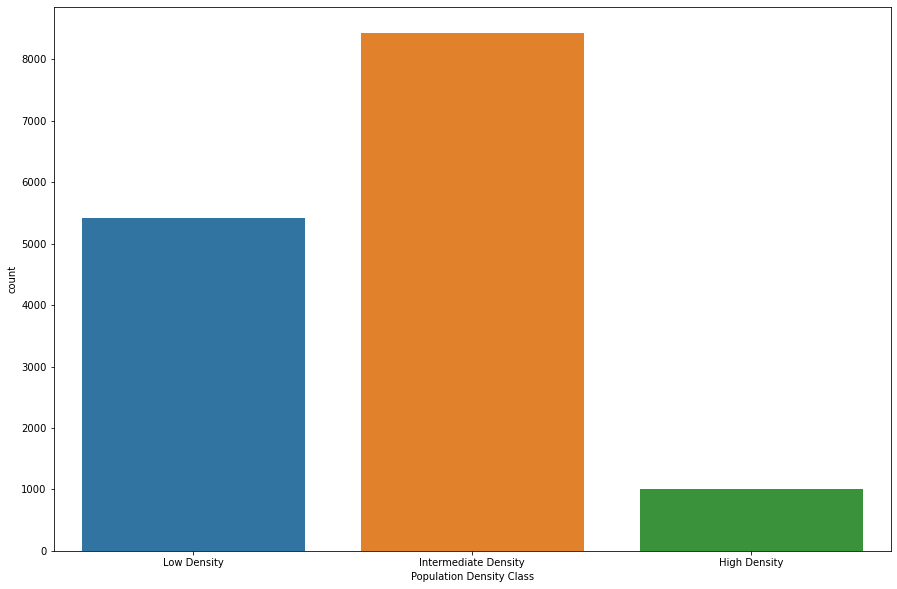

In [93]:
plt.figure(figsize=(15,10))
sns.countplot(x='Population Density Class',data=df10)

In [94]:
category9 = []
for i in qualification9:
    if i == 'Low Density':category9.append(1)
    if i == 'High Density':category9.append(3)
    if i == 'Intermediate Density':category9.append(2)  
df10['Category'] = category9
df10

,Regions,Population Density Class,Category
0,Manyara,Low Density,1
1,Arusha,Intermediate Density,2
2,Singida,Low Density,1
3,Lindi,Low Density,1
4,Ruvuma,Low Density,1
...,...,...,...
14845,Pwani,Low Density,1
14846,Tanga,Intermediate Density,2
14847,Singida,Low Density,1
14848,Ruvuma,Low Density,1


<center><h1 style="color:#00FFFF" >11. Variable: Extraction Type Class</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What water Extraction from a well?</span><br>
Water extraction (or water withdrawal) is the process of taking water from any source, either temporarily or permanently, for flood control or to obtain water for, for example, irrigation.[1][2] The extracted water could also be used as drinking water after suitable treatment. Depending on the environmental legislation in the country, controls may be placed on extraction to limit the amount of water that can be removed. The over-extraction of water can lead to dry rivers or declining groundwater levels.The science of hydrogeology is used to determine safe water extraction levels. Water can go through dams that are used to regulate or stop water from coming though, creating hydroelectricity.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Gravity Extraction Type?</span><br>
Gravity fed water systems have been used for many hundreds of years to haul water from one place to another. This system uses the laws of gravity to move water from point A to point B and C if necessary. There are no pumps of any sort required for this system or electricity for that matter. Gravity water systems use gravity to transport water from the source to the user through a pipe network. Bringing water closer to people reduces time, effort and risk – especially for women and girls – and protecting water as it is transported prevents it from being contaminated. A gravity-flow water system starts above the intake, with a protected catchment area. Activities must be controlled in this area to keep the water source clean. The gravity fed water system is used to pull the water from springs, streams, creeks, rain barrels, and rivers upstream or uphill from the water source. You can use this system to provide water to your shower, gardens, animal barns, and even your whole house if you have it set up properly. </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Handpump Extraction Type?</span><br>
Hand pumps are manually operated pumps; they use human power and mechanical advantage to move fluids or air from one place to another. They are widely used in every country in the world for a variety of industrial, marine, irrigation and leisure activities. There are many different types of hand pump available, mainly operating on a piston, diaphragm or rotary vane principle with a check valve on the entry and exit ports to the chamber operating in opposing directions. Most hand pumps are either piston pumps or plunger pumps, and are positive displacement. Hand pumps are commonly used in developing countries for both community supply and self-supply of water and can be installed on boreholes or hand-dug wells.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Submersible Extraction Type?</span><br>
A submersible pump is a mechanical equipment that works by pushing the water toward the surface instead of pulling it. It has a hermetically sealed motor connected to the pump body that helps to push the fluid toward the surface. It is a most famous type of the centrifugal pump. A submersible pump mainly uses to pump the water from the wells. This type of pump pushes water toward the surface by changing the rotatory motion (speed) into kinetic energy, and diffuser blades further convert this K.E into pressure energy. The significant benefit of this pump is that it can prevent the pump from cavitation – these pumps are known as submersible pumps because these submerge entirely in the water. Therefore, the principal purpose of these pumps is to pump water out of the tanks, wells, or other vessels by submerging into the water or other fluids. These pumps also use in hot water-heavy oil applications where pressurized liquid from the ground is used to power a hydraulic motor in wells instead of an electric motor.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Motorpump Extraction Type?</span><br>
A Motor pump is a mechanical device, used to move the liquids/gases from one place to another by using mechanical action. The working principle of the water pump is, it converts the motor’s energy from mechanical to fluid flow. These are classified into various types based on the technique they use for supplying the liquid like direct, gravity and displacement. A pump operates by using a mechanism like rotary or reciprocating and they consume energy for performing mechanical work to move the liquid. Pumps use several energy sources for their operations like manual, wind power, electricity, engines, etc. These are available in many shapes based on its application like medical to large industries. There different mechanical pumps available in the market to serve in an extensive range of applications like water pumping from wells, filtering of the aquarium, pond, in industries like automobile, energy, medical, etc.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Rope Pump Extraction Type?</span><br>
A rope pump is a kind of pump where a loose hanging rope is lowered into a well and drawn up through a long pipe with the bottom immersed in water. On the rope, round disks or knots matching the diameter of the pipe are attached which pull the water to the surface. It is commonly used in developing countries for both community supply and self-supply of water and can be installed on boreholes or hand-dug wells. The modern Rope pump is a highly efficient and low cost pump, it can be produced with local materials and can be truly operated and maintained at a village level. The basic design has a wheel with a continuous loop of rope with pistons that fit with a small clearance in the pump pipe. The low end of this pipe is at the bottom of the well. By turning the wheel the rope passes up through the PVC pump pipe and pushes the water up. At the top end of the pump pipe, the diameter increases and the water comes out via a Tee piece.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Wind-Powered Extraction Type?</span><br>
Wind power has been used to supply water to homes and communities for hundreds of years. Locally manufactured windpumps can be found in most countries, though they tend to be small in size. These units have a wide range of sophistication and reliability and their reliability seems to be proportional to the unit’s weight and cost. In general, the heavier the construction and the more costly the product, the more reliable they are. Lighter weight and faster running designs, such as those promoted by the now defunct Dutch CWD, have not been able to achieve the level of reliability required for community water supply applications. Mechanical windpumps must be optimized for a particular wind speed because the linear power requirements of their volumetric pumps do not match well with the cubic increases in power available from the wind rotor (blade assembly) with increasing wind speed. Manufacturers optimize the performance at low wind speeds because delivering some water in the low wind speed periods is usually more important than maximizing total delivered water volume over the year. As a result, most windpumps have excellent low wind speed performance. They are able to begin pumping at wind speeds as low as 2.5 m/s (for low lifts) and they reach their peak efficiency in the range of 4-7 m/s. Mechanical windpumps are probably the best choice for using wind energy when the annual average wind speed is less than 4 m/s.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Extraction Type effect the functionality of a well?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Extraction Type?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [95]:
raw_info["extraction_type_class"].value_counts()

gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope pump        121
wind-powered      35
Name: extraction_type_class, dtype: int64

In [96]:
extraction_type = raw_info["extraction_type_class"].value_counts().index.tolist()
extraction_type

['gravity',
 'handpump',
 'other',
 'submersible',
 'motorpump',
 'rope pump',
 'wind-powered']

In [97]:
extraction_types = raw_info["extraction_type_class"].tolist()
len(extraction_types)

14850

In [98]:
qualification10= []
for extraction in extraction_types:
    if extraction == 'gravity' :
        qualification10.append('Good Water Extraction')
    elif extraction == 'handpump':
        qualification10.append('Intermediate Water Extraction')
    elif extraction == 'other':
        qualification10.append('Unknown')
    elif extraction == 'submersible':
        qualification10.append('Good Water Extraction')
    elif extraction == 'motorpump':
        qualification10.append('Good Water Extraction')
    elif extraction == 'rope pump':
        qualification10.append('Intermediate Water Extraction')
    elif extraction == 'wind-powered':
        qualification10.append('Good Water Extraction')
len(qualification10)

14850

In [99]:
df11 = pd.DataFrame({'Extraction Type':extraction_types,'Extraction Type Class':qualification10})
df11

,Extraction Type,Extraction Type Class
0,other,Unknown
1,gravity,Good Water Extraction
2,other,Unknown
3,other,Unknown
4,gravity,Good Water Extraction
...,...,...
14845,motorpump,Good Water Extraction
14846,handpump,Intermediate Water Extraction
14847,gravity,Good Water Extraction
14848,gravity,Good Water Extraction


<AxesSubplot:xlabel='Extraction Type Class', ylabel='count'>

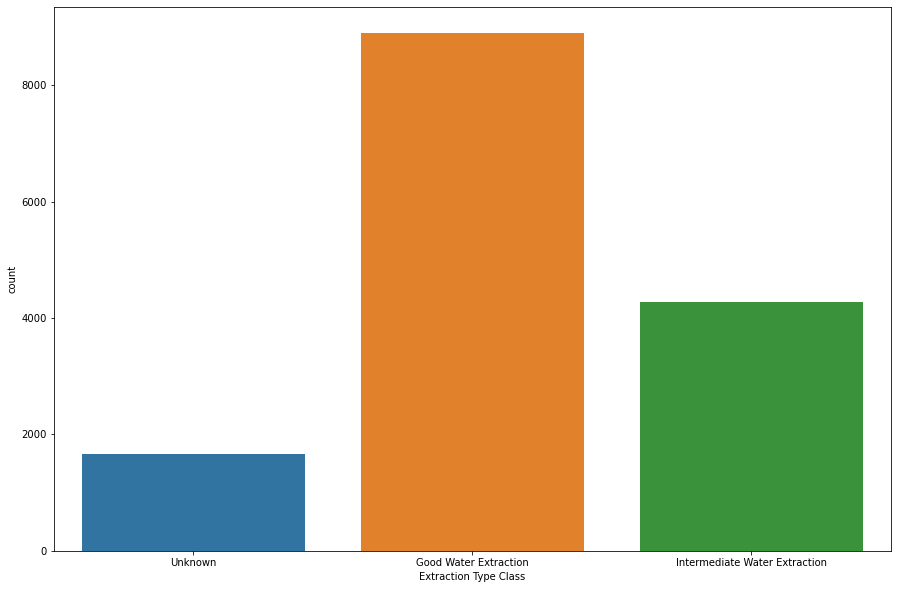

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(x='Extraction Type Class',data=df11)

In [101]:
category10 = []
for i in qualification10:
    if i == 'Intermediate Water Extraction':category10.append(2)
    if i == 'Good Water Extraction':category10.append(1)
    if i == 'Unknown':category10.append(0)  
df11['Category'] = category10
df11

,Extraction Type,Extraction Type Class,Category
0,other,Unknown,0
1,gravity,Good Water Extraction,1
2,other,Unknown,0
3,other,Unknown,0
4,gravity,Good Water Extraction,1
...,...,...,...
14845,motorpump,Good Water Extraction,1
14846,handpump,Intermediate Water Extraction,2
14847,gravity,Good Water Extraction,1
14848,gravity,Good Water Extraction,1


<center><h1 style="color:#00FFFF" >12. Variable: Management Group</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is the Management of a well?</span><br>
In view of the issues and challenges in water resources management it is clear that an integrated water resources management is needed to ensure that water does not
become a constraint to national development. This calls for a new vision " A country where there is equitable and sustainable use and management of water resources for
socio-economic development, and for maintenance of the environment". The existing approach is sector oriented and does not fully recognize the multi-sectoral linkages in the planning the use of water resources. This is based on a regional development and does not focus on institutional capacity to manage water resources. It is oriented more towards the development of the water resources and not on the protection or management of the water resources, and is based on regulation as a primary instrument for implementing the water policy. The integrated approach addresses participatory, multi-sectoral, multidisciplinary river basin management, which, recognizes that water is a scarce resource and integrates the linkage between land use and water use and recognizes the important role water ecosystems play in the national economy
    
Water wells require regular maintenance to ensure adequate water flow and continued drinking water safety. To ensure water quality, well water should be tested annually for total coliform bacteria and E. coli bacteria by a state accredited testing laboratory. Every three years, additional testing is recommended for pH and total dissolved solids as well as tests related to land uses occurring or expected to occur within sight of the well. Additionally, if there are obvious stains, tastes, or odors in water, seek testing that will help identify the source of these symptoms. Water wells should also be inspected annually for obvious signs of damage or contamination. Be sure the area within 100 feet around the well is clear of debris or items that might pollute the water supply.This is where a well management comes into play.  Well Management approach treats a water supply well as a valuable asset throughout its entire life, from initial well siting studies, design and construction, through routine diagnostics and well rehabilitation to maintain well health and on to eventual well replacement.  This method allows for proper planning and budgeting to maintain a productive well while minimizing its life-cycle costs.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a User-Group Management?</span><br>
Water User Groups means any water user group established (whether or not established under law), to govern the arrangements surrounding an irrigation program. A water user group is defined in the Land and Water Regional Plan as a group of users with existing authorisations to take water, voluntarily grouped together to collectively manage the water resource allocated to them, primarily during times of restriction. Water User Associations (WUAs) are community-based organizations that share a common interest of well performing irrigation systems. There are advantages associated with WUAs taking over tertiary/secondary level irrigation systems</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Commercial Management?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is a Parastatal Management?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Managment Type effect the functionality of a well?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Management Type?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [102]:
raw_info["management_group"].value_counts()

user-group    13048
commercial      953
parastatal      461
other           266
unknown         122
Name: management_group, dtype: int64

In [103]:
management_group = raw_info["management_group"].tolist()
len(management_group)

14850

In [104]:
qualification11= []
for management in management_group:
    if management == 'user-group' :
        qualification11.append('Good Management')
    elif management == 'commercial':
        qualification11.append('Intermediate Management')
    elif management == 'parastatal':
        qualification11.append('Bad Management')
    elif management == 'other':
        qualification11.append('Bad Management')
    elif management == 'unknown':
        qualification11.append('Unknown')
len(qualification11)

14850

In [105]:
df12 = pd.DataFrame({'Management Type':management_group,'Management Type Class':qualification11})
df12

,Management Type,Management Type Class
0,parastatal,Bad Management
1,user-group,Good Management
2,user-group,Good Management
3,user-group,Good Management
4,user-group,Good Management
...,...,...
14845,user-group,Good Management
14846,user-group,Good Management
14847,user-group,Good Management
14848,user-group,Good Management


<AxesSubplot:xlabel='Management Type Class', ylabel='count'>

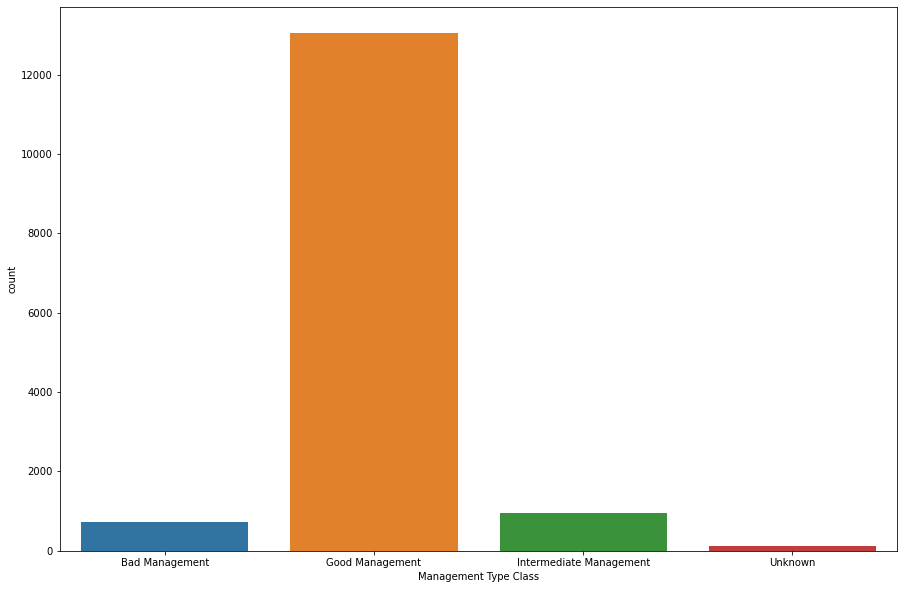

In [106]:
plt.figure(figsize=(15,10))
sns.countplot(x='Management Type Class',data=df12)

In [107]:
category11 = []
for i in qualification11:
    if i == 'Intermediate Management':category11.append(2)
    elif i == 'Bad Management':category11.append(3)
    elif i == 'Good Management':category11.append(1)
    elif i == 'Unknown':category11.append(0)  
df12['Category'] = category11
df12

,Management Type,Management Type Class,Category
0,parastatal,Bad Management,3
1,user-group,Good Management,1
2,user-group,Good Management,1
3,user-group,Good Management,1
4,user-group,Good Management,1
...,...,...,...
14845,user-group,Good Management,1
14846,user-group,Good Management,1
14847,user-group,Good Management,1
14848,user-group,Good Management,1


<center><h1 style="color:#00FFFF" >13. Variable: Construction Year</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is the Construction Year of a well?</span><br>
The Contruction Year of a well is when the well was built. The question is how long does a well last before it should be re-constructed to another brand new well.
The type of well, will determine its life expectancy. Generally, hand-dug wells (which are uncommon nowadays thanks to modern technology) have the shortest lifespan of 15-30 years, while cased or sealed wells last the longest: around 50-100 years. A well lasts 30-50 years on average. However, some wells last longer than this – up to 100 years. The average well’s life expectancy depends on factors including the well’s size, type, and quality of construction, outside factors like the weather and the general geographic location, and the well water demand. There are several different types of wells, and they each have their own specific estimated lifespans. Dug wells	15-30 years, Driven wells 20-40 years, Bored or drilled wells 30-50 years, Cased or sealed wells50-100 years. The average lifespan of a well pump is 8-15 years. A pump’s exact life expectancy depends on the type of pump, the water quality and temperature, and the pump’s daily running time.

Wondering why a well water system doesn’t last forever? It’s because a well will naturally run out of water in the aquifer. It takes years for an underground aquifer to fill with water. As the water in the aquifer is used, it will also be replenished. But water is used at a faster rate than it can be replenished, and there will come a time when the aquifer is emptied and the well dries out. It’s uncommon for a well to dry out permanently, and you should be able to use the aquifer again – but only after waiting a few years for it to refill. Along with the gradual water decline, a well will eventually stop working due to failure or degradation of important parts in the well system, like the pump, well casing, and pressure tank. Luckily, these parts can often be repaired or replaced to save the need of drilling an entirely new well – but the cost is usually in the thousands.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Construction Year effect the functionality of a well?</span><br>
In actuality, most wells begin life at less than 15% efficiency. It is through the process of well efficiency development that well efficiency is increased prior to the well beginning its operational life.  However, wells get old too, and as they age, they start having performance issues. 
    
Since wells are designed to deliver water, the quality of the water flowing through the well system will have a direct effect on the lifespan of the well components.
Contaminants like sediment and hardness minerals can cause pump damage and clog the water tank, reducing their efficiency and shortening the lifespans. You’ll probably notice that your water pressure or water flow rate reduces due to high levels of sediment or hardness minerals in your water supply, and your water may look cloudy or discolored.

No, wells don’t last forever. The average lifespan of a drinking water well is 30-50 years. Eventually, a well’s water yield will deplete so much that the well will dry up. Plus, the well parts, like the water pump and the pressure tank, will become old and worn. You might be able to restore water by hiring a contractor to increase the well depth and access new pockets of water within the same aquifer.Yes, with the right maintenance and servicing, some types of wells last up to 100 years – or even longer. Cased or sealed wells last the longest, and are the well type most likely to last beyond 100 years. That’s because these wells are the most sturdily built and resistant to damage and wear and tear.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Construction Year Type?</span><br>
Wells have a life expectancy that can vary considerably. While some wells may last 100 or more years, a life of 25 to 50 years is more common. Properties with a long history may have more than one well. Farm properties are more likely to have multiple wells to serve barns, irrigation, and other purposes</p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [108]:
raw_info["construction_year"].value_counts()

0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1963      22
1960      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1965       2
1966       2
Name: construction_year, dtype: int64

In [109]:
construction_year = raw_info["construction_year"].tolist()
len(construction_year)

14850

In [110]:
qualification12= []
for construction in construction_year:
    if 2001 <= construction <= 2021 :
        qualification12.append('Good Construction Year')
    elif 1991 <= construction <= 2002 :
        qualification12.append('Intermediate Construction Year')
    elif   construction <= 1991  :
        qualification12.append('Bad Construction Year')
len(qualification12)

14850

In [111]:
df13 = pd.DataFrame({'Construction Year':construction_year,'Construction Year Class':qualification12})
df13

,Construction Year,Construction Year Class
0,2012,Good Construction Year
1,2000,Intermediate Construction Year
2,2010,Good Construction Year
3,1987,Bad Construction Year
4,2000,Intermediate Construction Year
...,...,...
14845,1988,Bad Construction Year
14846,1994,Intermediate Construction Year
14847,2010,Good Construction Year
14848,2009,Good Construction Year


<AxesSubplot:xlabel='Construction Year Class', ylabel='count'>

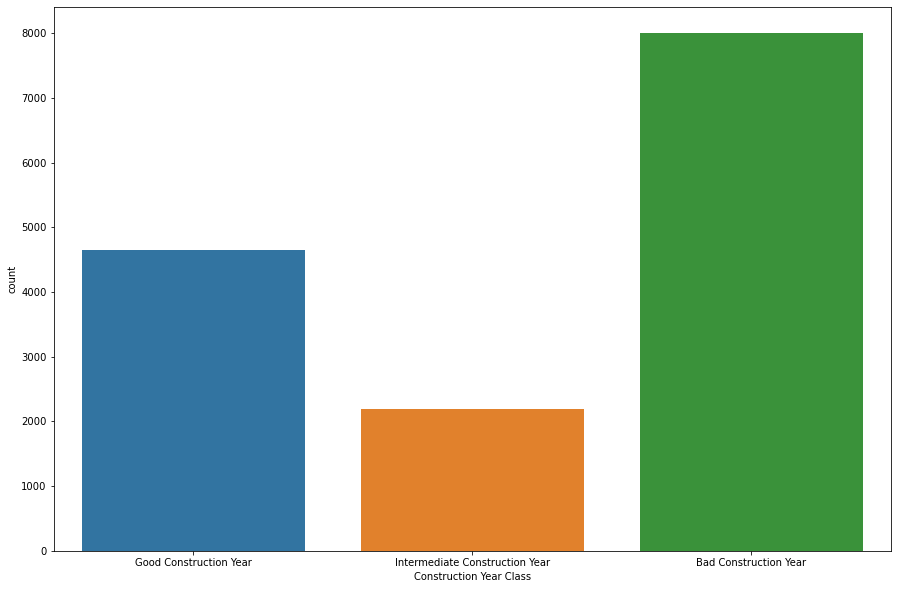

In [112]:
plt.figure(figsize=(15,10))
sns.countplot(x='Construction Year Class',data=df13)

In [113]:
category12 = []
for i in qualification12:
    if i == 'Intermediate Construction Year':category12.append(2)
    elif i == 'Bad Construction Year':category12.append(3)
    elif i == 'Good Construction Year':category12.append(1)
    elif i == 'Unkown Year':category12.append(0)  
df13['Category'] = category12
df13

,Construction Year,Construction Year Class,Category
0,2012,Good Construction Year,1
1,2000,Intermediate Construction Year,2
2,2010,Good Construction Year,1
3,1987,Bad Construction Year,3
4,2000,Intermediate Construction Year,2
...,...,...,...
14845,1988,Bad Construction Year,3
14846,1994,Intermediate Construction Year,2
14847,2010,Good Construction Year,1
14848,2009,Good Construction Year,1


<center><h1 style="color:#00FFFF" >14. Variable: Permit</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is the Permit Type of a well?</span><br>
Permitted Well means a well with production pipe 2-inches in diameter and producing more than 17.5 gallons per minute, that has satisfactorily met all of the requirements necessary to obtain Operating and Drilling Permits, which includes any artificial excavation constructed to produce, or which is not exempt pursuant to Chapter 36, Texas Water Code, as amended, and/or these rules. Water Well Permit/Groundwater Well Permit means the authorization given by the District for construction of water wells capable of pumping greater than 50 gallons per minute
    
Water well permits are governed by state and local laws, which vary by jurisdiction. The process of obtaining a water well permit involves primarily identifying potential sources of contamination and then maintaining separation distances to protect the water quality. Well permits are required to assure construction consistent with regulations for the safeguarding of persons and property from hazards arising from unsanitary and unhealthy drinking water and to assure an adequate supply of water.

Water well permits are required prior to commencing construction. Well permits may be required for commercial, industrial, municipal, irrigation, feed lot, geothermal, recovery wells, and other uses. In some cases, permits are not required for test holes, temporarily dewatering wells with a short-term use, or water wells designed and constructed to pump (yield) under a certain number of gallons per minute. The permit process may require site inspection and water quality testing. Local laws should be consulted for specific requirements in your area.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is a No Permit Type Type?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is a Permit Type?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>How does Permit Type effect the functionality of a well?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Permit Type?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [114]:
raw_info["permit"].value_counts()

True     9754
False    4359
Name: permit, dtype: int64

In [115]:
permits = raw_info["permit"].tolist()
len(permits)

14850

In [116]:
qualification13= []
for permit in permits:
    if permit == True :
        qualification13.append('Good')
    elif permit == False :
        qualification13.append('Bad')
    else:
        qualification13.append('Unkown')
len(qualification13)

14850

In [117]:
df14 = pd.DataFrame({'Permit':permits,'Permit Class':qualification13})
df14

,Permit,Permit Class
0,True,Good
1,True,Good
2,NaN,Unkown
3,True,Good
4,True,Good
...,...,...
14845,True,Good
14846,False,Bad
14847,NaN,Unkown
14848,True,Good


<AxesSubplot:xlabel='Permit Class', ylabel='count'>

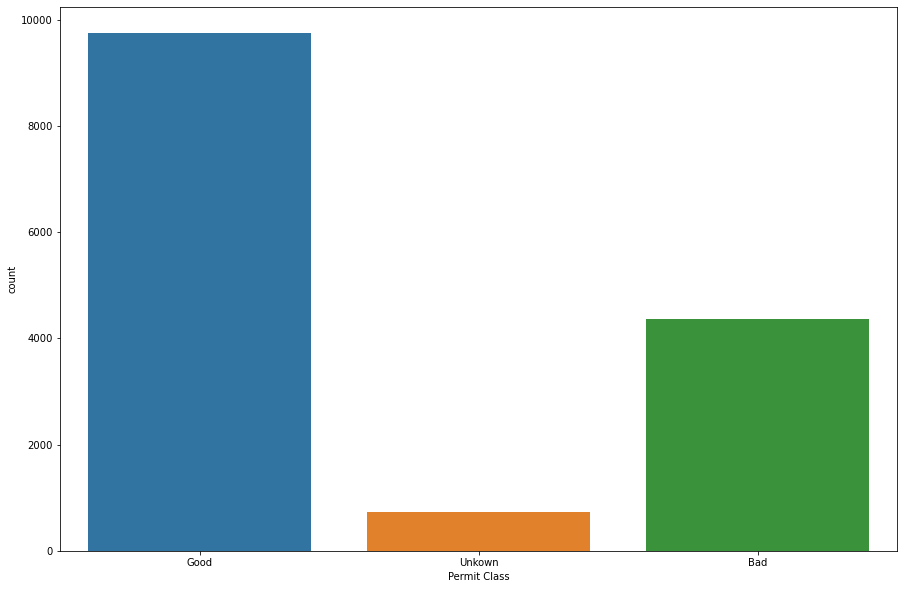

In [118]:
plt.figure(figsize=(15,10))
sns.countplot(x='Permit Class',data=df14)

In [119]:
category13 = []
for i in qualification13:
    if i == 'Bad':category13.append(3)
    elif i == 'Good':category13.append(1)
    elif i == 'Unkown':category13.append(0) 
df14['Category'] = category13
df14

,Permit,Permit Class,Category
0,True,Good,1
1,True,Good,1
2,NaN,Unkown,0
3,True,Good,1
4,True,Good,1
...,...,...,...
14845,True,Good,1
14846,False,Bad,3
14847,NaN,Unkown,0
14848,True,Good,1


<center><h1 style="color:#00FFFF" >15. Variable: Installer</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is Payment Type of a well?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is Never Pay?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is Pay Per Bucket?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is Pay Monthly?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is Pay Annually?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>What is Pay When Scheme Fails?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>How does Payment Type effect the functionality of a well?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Payment Type?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [120]:
raw_info["payment"].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: payment, dtype: int64

In [121]:
payment_type = raw_info["payment"].tolist()
len(payment_type)

14850

In [122]:
qualification14= []
for payments in payment_type:
    if payments  == 'pay per bucket' or payments  == 'pay monthly' or payments  == 'pay annually'or payments  == 'pay when scheme fails' :
        qualification14.append('Good Water Quality')
    elif payments == 'unknown' :
        qualification14.append('Unkown')
    elif  payments  == 'never pay' or payments  == 'other' :
        qualification14.append('Bad Water Quality')
len(qualification14)

14850

In [263]:
df15 = pd.DataFrame({'Payment Type':payment_type,'Water Quality Class':qualification14})
df15

,Payment Type,Water Quality Class
0,never pay,Bad Water Quality
1,never pay,Bad Water Quality
2,never pay,Bad Water Quality
3,unknown,Unkown
4,pay monthly,Good Water Quality
...,...,...
14845,never pay,Bad Water Quality
14846,pay annually,Good Water Quality
14847,never pay,Bad Water Quality
14848,never pay,Bad Water Quality


<AxesSubplot:xlabel='Water Quality Class', ylabel='count'>

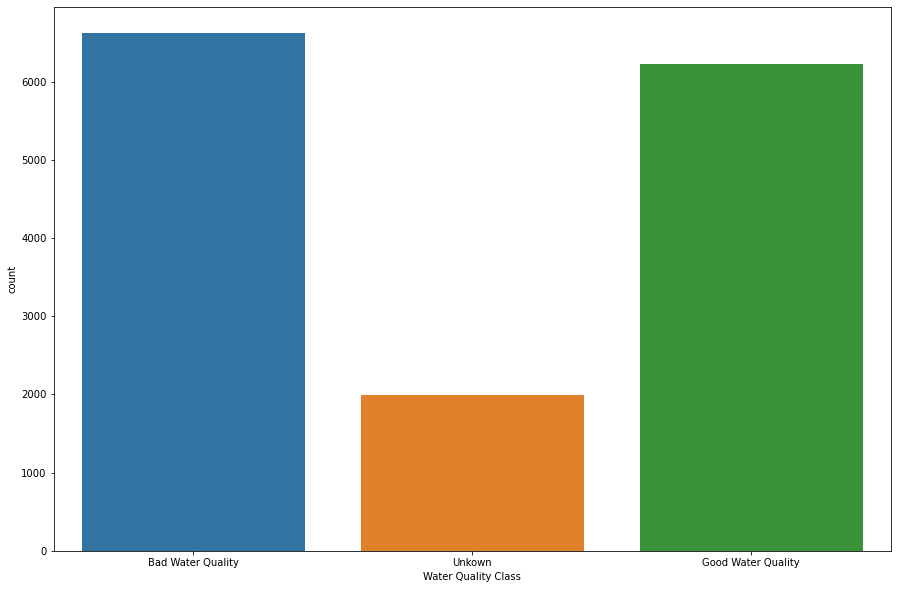

In [124]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water Quality Class',data=df15)

In [125]:
category14 = []
for i in qualification14:
    if i == 'Bad Water Quality':category14.append(3)
    elif i == 'Good Water Quality':category14.append(1)
    elif i == 'Unkown':category14.append(0) 
df15['Category'] = category14
df15

,Payment Type,Water Quality Class,Category
0,never pay,Bad Water Quality,3
1,never pay,Bad Water Quality,3
2,never pay,Bad Water Quality,3
3,unknown,Unkown,0
4,pay monthly,Good Water Quality,1
...,...,...,...
14845,never pay,Bad Water Quality,3
14846,pay annually,Good Water Quality,1
14847,never pay,Bad Water Quality,3
14848,never pay,Bad Water Quality,3


<center><h1 style="color:#00FFFF" >16. Variable: Population</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is Population of a Country or Region?</span><br>
Population is the term typically used to refer to the number of people in a single area. Governments conduct a census to quantify the size of a resident population within a given jurisdiction. The term is also applied to animals, microorganisms, and plants, and has specific uses within such fields as ecology and genetics.
A population is the complete set group of individuals, whether that group comprises a nation or a group of people with a common characteristic. In ordinary usage, a population is a distinct group of individuals with shared citizenship, identity, or characteristics.
    
The population of Tazanina is 59 illion and out of its population of 59 million people, 16 million people (28% of the population) lack access to safe water, and 44 million people (73%) lack access to safely managed household sanitation facilities. People living under these circumstances, particularly women and girls, spend a significant amount of time traveling long distances to collect water. And other challenges like underfunding of planned government projects, population growth, and extreme weather events due to climate change create challenges for those living in poverty. Now more than ever access to safe water at home is critical to families in Tanzania.

In Tanzania, demand for both water and sanitation are high and the market for water products (like storage tanks, pipes, and rain harvesting facilities) is dynamic. With the growing digital finance sector, there is a strong opportunity to scale our impact in Tanzania.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How does Population of a Region effect the functionality of a well?</span><br>
A high population causes water scarcity, water scarcity is insufficient freshwater resources to meet the human and environmental demands of a given area. Every inch of land available in cities is used for building housing complexes. All these households need water. This increases the demand for potable water. The rise in population leads to higher demand for water for domestic, industrial, agricultural and municipal needs and also the evacuation of waste materials. With the increase in population, the demand for water has increased. Overpopulation has caused over-consumption of water. Due to this few countries are already facing a water-scarcity problem. If this continues then there would not be enough water available for us and our future generation.

If the population of a region is highly populated it can cause over pumping. Over pumping is a common factor with the low water well. A well is over-pumped if the water is withdrawn at a faster rate due to a high population, than the well was designed for or the aquifer is able to produce. Over-pumping is the most common well problem that leads to premature well failure. Over-pumping not only depletes the groundwater aquifer (or source), but it rapidly increases the rate of corrosion, incrustation, and biofouling related problems. Over-pumping also increases the rate of sediment particles moving toward the well, causing plugging of the perforated area where water flows into the well. It can also cause the aquifer to settle and compact which further restricts water flow to the well. In the case of the low water levels in the well, possibly due to the many factors listed above, the cone of depression can cover a much larger area and continue to grow in size as the need for water is greater than the supply at which the water table can provide. This can have negatives effects.</p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Population?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [126]:
raw_info["population"].value_counts()

0       5453
1       1757
150      436
200      430
250      406
        ... 
745        1
4735       1
447        1
546        1
2960       1
Name: population, Length: 637, dtype: int64

In [127]:
populations = raw_info["population"].tolist()
len(populations)

14850

In [128]:
qualification15= []
for population in populations:
    if 0 <= population <= 2000:
        qualification15.append('Good Water well')
    elif 2001 <= population   :
        qualification15.append('Bad Water well')
len(qualification15)

14850

In [129]:
df16 = pd.DataFrame({'Population':populations,'Water well Quality Class':qualification15})
df16

,Population,Water well Quality Class
0,321,Good Water well
1,300,Good Water well
2,500,Good Water well
3,250,Good Water well
4,60,Good Water well
...,...,...
14845,20,Good Water well
14846,2960,Bad Water well
14847,200,Good Water well
14848,150,Good Water well


<AxesSubplot:xlabel='Water well Quality Class', ylabel='count'>

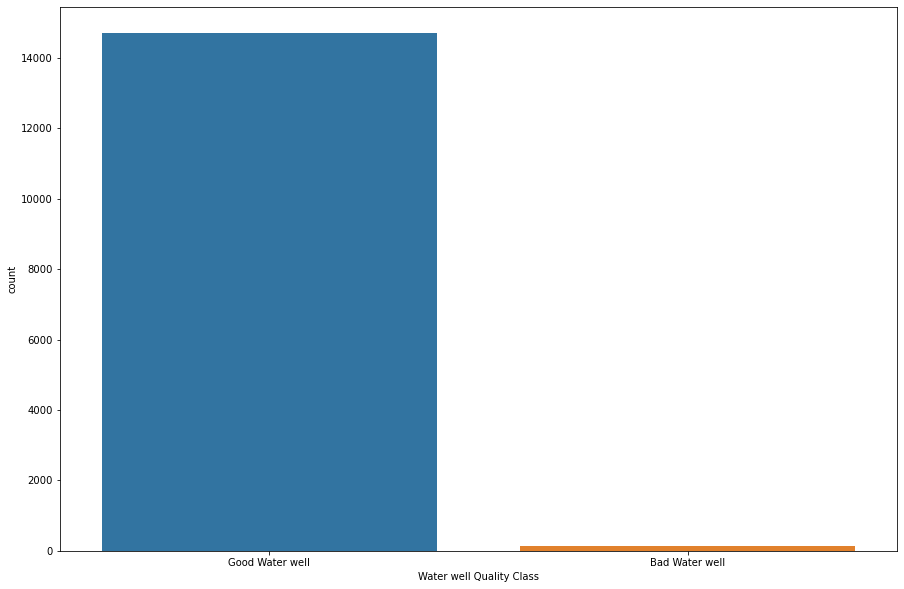

In [130]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water well Quality Class',data=df16)

In [131]:
category15 = []
for i in qualification15:
    if i == 'Bad Water well':category15.append(3)
    elif i == 'Good Water well':category15.append(1)
df16['Category'] = category15
df16

,Population,Water well Quality Class,Category
0,321,Good Water well,1
1,300,Good Water well,1
2,500,Good Water well,1
3,250,Good Water well,1
4,60,Good Water well,1
...,...,...,...
14845,20,Good Water well,1
14846,2960,Bad Water well,3
14847,200,Good Water well,1
14848,150,Good Water well,1


<center><h1 style="color:#00FFFF" >17. Variable: Funder</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What is a Public Meeting?</span></p>
<p><span style='font-weight:bold;color:#fbec5d'>How does Does a Public Metting effect the functionality of a well?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Public Merting?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [132]:
raw_info["public_meeting"].value_counts()

True     12738
False     1291
Name: public_meeting, dtype: int64

In [133]:
public_meetings = raw_info["public_meeting"].tolist()
len(public_meetings)

14850

In [134]:
qualification16= []
for meetings in public_meetings:
    if  meetings == True :
        qualification16.append('Bad Water well')
    elif meetings == False :
        qualification16.append('Good Water well')
    else:
        qualification16.append('Unkown')
len(qualification16)

14850

In [135]:
df17 = pd.DataFrame({'Public Meetings':public_meetings,'Water well Quality Class':qualification16})
df17

,Public Meetings,Water well Quality Class
0,True,Bad Water well
1,True,Bad Water well
2,True,Bad Water well
3,NaN,Unkown
4,NaN,Unkown
...,...,...
14845,True,Bad Water well
14846,True,Bad Water well
14847,True,Bad Water well
14848,True,Bad Water well


<AxesSubplot:xlabel='Water well Quality Class', ylabel='count'>

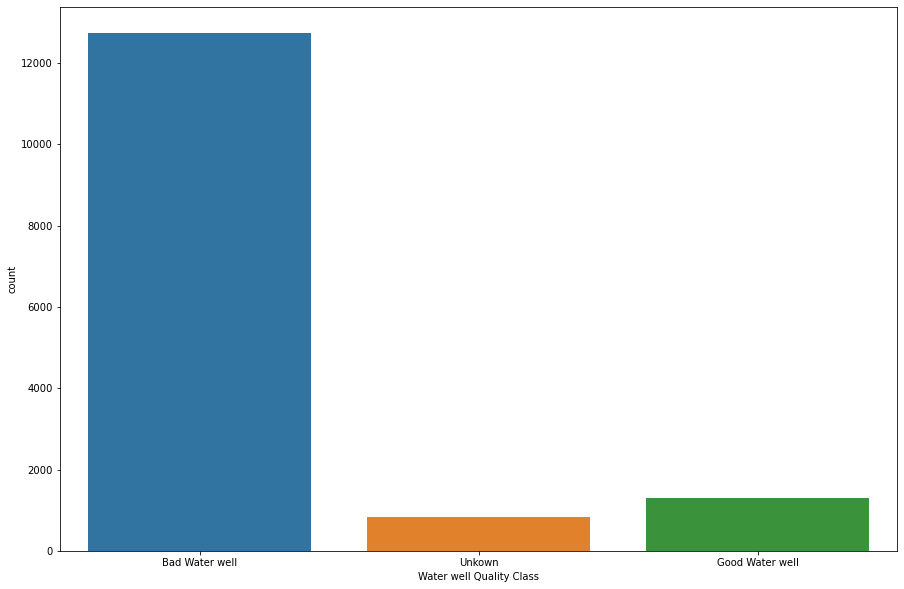

In [136]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water well Quality Class',data=df17)

In [137]:
category16 = []
for i in qualification16:
    if i == 'Bad Water well':category16.append(3)
    elif i == 'Good Water well':category16.append(1)
    elif i == 'Unkown':category16.append(0)
df17['Category'] = category16
df17

,Public Meetings,Water well Quality Class,Category
0,True,Bad Water well,3
1,True,Bad Water well,3
2,True,Bad Water well,3
3,NaN,Unkown,0
4,NaN,Unkown,0
...,...,...,...
14845,True,Bad Water well,3
14846,True,Bad Water well,3
14847,True,Bad Water well,3
14848,True,Bad Water well,3


<center><h1 style="color:#00FFFF" >18. Variable: Region</h1></center>

<p><span style='font-weight:bold;color:#fbec5d'>What are the Regions of Tazaninia?</span><br>
The United Republic of Tanzania is the largest country in East Africa, covering 940,000 square kilometres, 60,000 of which is inland water. Tanzania lies south of the Equator and borders eight countries: Kenya and Uganda to the north; Rwanda, Burundi, Zaire, and Zambia to the west; and Malawi and Mozambique to the south. 
Tanzania, the African country, is divided into thirty-one regions as the highest administrative structure. Five of the thirty-one regions of the country are located in Zengibar and Pemba, which constitute the united republic, while 26 are in the Republic of Tanganyika, the other country of the united republic on the mainland.
Tanzania is divided into thirty-one regions as the highest administrative division. In 1975, Tanzania had 25 regions. In the 1970s, the name of the Ziwa Magharibi District was renamed Kagera District. In 2002, Manyara Region was established as part of the Arusha Region. In 2012, four new regions were created: Geita, Katavi, Njombe and Simiyu. Finally, in 2016, Songwe District was established from the western part of Mbeya District and the number of regions has been thirty-one.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Shinyanga?</span><br>
Shinyanga Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Shinyanga City. The region is located in the northern part of the country. The area is 18,901 square kilometers and the population is 1,534,808 according to the 2012 census. Shinyanga Region is divided into five districts.

The Shinyanga region, which once belonged to the Sukuma territory, is situated 20 to 160 kilometers south of Lake Victoria. The area is located between 2 and 3 degrees Southern latitude and 31 and 35 Eastern longitude. In the northwestern region of Tanzania, it is a component of the Lake Zone. Kigosi National Park is located on the western border with Geita Region. The western and southern regions follow lakes and sand river flows.

Tropical climate with distinct wet and dry seasons can be found in the Shinyanga Region. Between 600 and 900 millimeters of rainfall on average. Typically, the rainy season begins around the middle of October and lasts until May. The average temperature of Shinyanga is 23.9°C. Throughout the year, October has the hottest average temperature (26.0 °C), while July has the coldest average temperature (22.3 °C).</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Iringa?</span><br>
Iringa Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Iringa. The region is located in the central and southern part of the country. The area is 35,503 square kilometers and the population is 941,238 according to the 2012 official census. The Iringa Region is divided into five districts.

The elevation of Iringa varies from 900 to 2,300 meters above sea level. A significant scarp that can reach 800 meters in height and is the eastern portion of the Great Rift Valley surrounds the area on all sides. Iringa is hence situated in Tanzania's southern highlands, bordering the Mbeya, Njombe, Morogoro, Dodoma, and Singida areas.

The region is drained by the Little Ruaha and the Great Ruaha rivers. The lake created by the Mtera Dam is the other significant water body here.

The region can be divided into three zones - highland, midland and lowland. The highland zone is towards the east of the region. This area experiences a rainy season between November and May with annual precipitation ranging from 500–1,500 mm (20–59 in). The period between June and September is cold and dry. The midland zone, in the central part of the region, lies at a height of 1,200–1,600 m (3,900–5,200 ft) above sea level and faces between 600–1,000 mm (24–39 in) of rain every year. Finally, the lowland zone, at a height of 900–1,200 m (3,000–3,900 ft) gets between 500–600 mm (20–24 in) of rain per annum.

About 16% of the land in Iringa Region is forested. The region is host to the Ruaha National Park, famous for its large herd of elephants and over 400 species of birds. Other animals include lions, sable antelopes and kudu. A second park, Udzungwa Mountains National Park in Iringa Rural District, is less visited.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Mbeya?</span><br>
Mbeya Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Mbeya. The region is located in the southwestern part of the country. The area is 35,954 square kilometers and the population is 2,707,410 according to the 2012 census. Mbeya Region is divided into seven districts.
    
The Great Rift Valley created the majority of the places in the area, with the lowland elevation occupying the Western Rift Zone, which includes the Lake Rukwa and Lake Nyasa regions, and the Eastern Rift Zone, which includes the Usangu Plains and other sections of the Ruaha Trough. The heights range from 475 meters above sea level at Lake Nyasa to more than 2,900 meters at Mount Rungwe's summit

The Mbeya Region has a tropical climate, with lowlands temperatures of 25 °C and highlands temperatures of 16 °C. The rainy season lasts from October to May. The Usangu Plains and Chunya receive 650 millimeters of rain annually, while the mountains of Rungwe District Council and the northern coasts of Lake Nyasa receive 2,600 millimeters. June through September are the cold and dry months in the area. The soils and vegetation types in the area exhibit significant variance. Most of the region's arable land has soils with a medium texture, moderate fertility, and ranges from sandy loams to alluvial soils to cracked clays. The majority of the territory is covered with Miombo woodland, with annual rainfall ranging from 800 millimeters to 1,200 millimeters. Less rainy areas, particularly in the region's north, encourage the development of dense acacia and other thorny tree thickets as well as woodland grassland.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Kilimanjaro?</span><br>
Kilimanjaro Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Moshi city. The region is located in the northwestern part of the country. The area is 13,250 square kilometers and the population is 1,640,087 according to the 2012 official census. Kilimanjaro Region is divided into six districts.

Kilimanjaro Region (Mkoa wa Kilimanjaro in Swahili) is one of Tanzania's 31 administrative regions. The regional capital and largest city is the municipality of Moshi. With an HDI of 0.613, Kilimanjaro is one among the most developed regions of Tanzania. According to the 2012 national census, the region had a population of 1,640,087, which was lower than the pre-census projection of 1,702,207.: page 2  For 2002-2012, the region's 1.8 percent average annual population growth rate was the 24th highest in the country.: page 4  It was also the eighth most densely populated region with 124 people per square kilometer.: page 6 

The region forms part of the Northern Tourism Circuit in Tanzania. It is home to the Kilimanjaro National Park (which contains Mount Kilimanjaro), the Mkomazi National Park, the Pare Mountains, Lake Jipe, and Lake Chala. The region is bordered to the north and east by Kenya, to the south by the Tanga Region, to the southwest by the Manyara Region, and to the west by the Arusha Region.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Morogoro?</span><br>
Morogoro Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Morogoro. The region is located in the central and southeastern part of the country. The area is 70,624 square kilometers and the population is 2,218,492 according to the 2012 census. Morogoro Region is divided into seven districts.

The Morogoro Region has a tropical savannah climate with regular rainfall. In lowlands, the annual average temperature ranges from 18 °C to 30 °C. Nearly the entire year, the Region receives moderate temperatures of about 25 °C. Typically, the cooler season lasts from July to September. The Region typically experiences a bi-modal rainfall pattern, with long rains from March to May and short rains from November to January. The yearly rainfall ranges from 600 to 1800 millimeters.

While the leeward sides of the Uluguru Mountains often remain dry with yearly rainfall of less than 600mm, the eastern parts of the mountains receive extremely high rainfall of up to 2,850mm. The Gairo and Mamboya divisions in the North of Kilosa District and the Ngerengere division in the Morogoro District are those that receive the least rainfall. The Mahenge and Udzungwa mountain ranges, which are high in elevation and include substantial forest reserves, also have a significant impact on the region's climate, particularly in the southern Ulanga and Kilombero Districts.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Kagera?</span><br>
Kagera Region is one of the 31 administrative regions of Tanzania. The capital and largest city is Bukoba. The region is located in the northernmost part of the country. The area is 25,265 square kilometers and the population is 2,458,023 according to the 2012 official census. Kagera Region is divided into eight districts.

Kagera borders Uganda to the north, Rwanda and Burundi to the west, and the Tanzanian regions Kigoma to the south and Geita to the east. The Kagera River forms the region's border with Rwanda. The region lies in the middle of 30°25' and 32°40' east, and 1°00' and 2°45' south. The total area is 35,686 square kilometres (13,778 sq mi), of which 25,513 square kilometres (9,851 sq mi) is land and 27 percent, and 10,173 square kilometres (3,928 sq mi) is water. Much of the water is that of the great lake, Victoria, as well as lakes Ikimba, Burigi, Ngono and the Kagera River. Kagera is Tanzania's fifteenth-largest region and accounts for approximately 3.3 percent of Tanzania's land area of 885,800 square kilometres (342,000 sq mi). The regional capital Bukoba is about 1,500 kilometres (930 mi) from Dar es Salaam.

With an average annual rainfall of 500 to 2000 mms, the Kagera Region has a bi-modal rainfall pattern from March to May and from October to November. Rainfall varies from 2000 mm per year in Bukoba to 500 mm in the west, with rainfall being higher along Lake Victoria's coasts and decreasing inland and away from the lake as well as with height. The temperature ranges from 20 degress Celsius to 28 degrees Celsius. The area is made up of a number of hills that run parallel to the lake's edge and north to south. </p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Mwanza?</span><br>
Mwanza Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Mwanza. The region is located in the northern part of the country. The area is 9,467 square kilometers and the population is 2,772,509 according to the 2012 official census. Mwanza Region is divided into seven districts.
    
Mwanza Region (Mkoa wa Mwanza in Swahili) is one of Tanzania's 31 administrative regions The region covers a land area of 25,233 km2 (9,743 sq mi). The region is comparable in size to the combined land area of the nation state of North Macedonia. Mwanza Region is bordered to the north through Lake Victoria by the Kagera Region and Mara Region, to the east by Simiyu Region, to the south by the Shinyanga Region and to the west by Geita Region. The regional capital is the city of Mwanza. According to the 2022 national census, the region had a population of 3,699,872 and national census of 2012 had 2,772,509. Mwanza Region is the second region with high population in Tanzania after Dar es Salaam Region

The region covers an area of 25,233 square kilometres (9,743 sq mi), of which 13,437 km2 (5,188 sq mi) is water and 11,796 km2 (4,554 sq mi) dry land. Mwanza Region is home to Ukerewe Island, the largest lake island in Africa as well as Saanane Island National Park, the smallest national park in Tanzania. The major rivers found in the region are; Moame River, Isanga River, Mirongo River, Nyarua River and Ndemabolia River.  The region is situated between 1200 and 1,400 meters above sea level on Lake Victoria's southern shore.The area is primarily flat, with little mountains and hills made of granite stone strewn about. Rainwater from the plains flows into Lake Victoria in the north. The "mbuga soil" ranges in texture from sand to sandyloam to sand-clay or loom-clay.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Arusha?</span><br>
Arusha Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Arusha. The region is located in the northeastern part of the country. The area is 37,576 square kilometers and the population is 1,694,310 according to the 2012 official census. The Arusha Region is divided into a city and six districts. Arusha Region (Swahili: Mkoa wa Arusha) is one of Tanzania's 31 administrative regions and is located in the north of the country. The region's capital and largest city is the city of Arusha. The region is bordered by Kajiado County and Narok County in Kenya to the north, the Kilimanjaro Region to the east, the Manyara and Singida Regions to the south, and the Mara and Simiyu regions to the west. Arusha Region is home to Ngorongoro Conservation Area, a UNESCO World Heritage Site. The region is comparable in size to the combined land and water areas of the state of Maryland in the United States.

Arusha Region is a tourist destination in Africa and is the hub of the northern Tanzania safari circuit. The national parks and nature reserves in this region include Ngorongoro Conservation Area, Arusha National Park, the Loliondo Game Controlled Area, and part of Lake Manyara National Park. Remains of 600-year-old stone structures are found at Engaruka, just off the dirt road between Mto wa Mbu and Lake Natron. With a HDI of 0.721, Arusha is one among the most developed regions of Tanzania.

Arusha region is home to a number of lakes, the largest lake in the region being Lake Eyasi. Other prominent lakes in the region are Lake Duluti, Momela Lakes, Lake Manyara, Lake Masek, Lake Empakaai, Lake Magadi, Lake Ndutu and Lake Natron. Most of the lakes in the region are alkaline in nature.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Kigoma?</span><br>
Kigoma Region is one of the 31 administrative regions of Tanzania. The capital and largest city is Kigoma. The region is located in the northwestern part of the country. The area is 37,040 square kilometers and the population is 2,127,930 according to the 2012 official census. Kigoma Region is divided into eight districts.

Kigoma Region resides in the northwestern corner of Tanzania, on the eastern shore of Lake Tanganyika. The region lies at about 5° south and 30° east of Greenwich. The region is bordered to the north by both Burundi and the Kagera Region. To the east, it is bordered by the Geita Region and Tabora Regions, to the south by the Katavi Region, and to the west by Lake Tanganyika, which forms a border with the Democratic Republic of the Congo.

The region's total area is 45,066 square kilometres (17,400 sq mi), of which 37,037 square kilometres (14,300 sq mi) is land and 8,029 square kilometres (3,100 sq mi) is water. The region's total area is just 161 square kilometres (62 sq mi) less than that of Estonia. As of 1998, approximately 20,000 square kilometres (7,700 sq mi) was in forests and 12,000 square kilometres (4,600 sq mi) was suitable for grazing or farming.

Kigoma Region is on a plateau that slopes from the northeast at about 1,750 metres (5,740 ft) down to 800 metres (2,600 ft) at the shore of lake Tanganyika. The topography in the north and east is gently rolling hills that gradually become steeper as they get closer to the Albertine Rift margin. The most important river is the Malagarasi, with the Luiche and the Ruchugi being the two other major rivers draining the region.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Pwani?</span><br>
Pwani Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is the city of Kibaha. The region is located in the eastern part of the country. The area is 32,547 square kilometers and the population is 1,098,668 according to the 2012 official census. The Pwani Region is divided into seven districts.

Pwani Region (Mkoa wa Pwani in Swahili) is one of Tanzania's 31 administrative regions. The word "Pwani" in Swahili means the "coast". The regional capital is the town of Kibaha. The Region borders the Tanga Region to the north, Morogoro Region to the west, Lindi Region to the south, and surrounds Dar es Salaam Region to the east. The Indian Ocean also borders the region to its northeast and southeast. The region is home to Mafia Island, the Rufiji delta and Saadani National Park. The region is home to Bagamoyo town, a historical Swahili settlement, and the first colonial capital of German East Africa. According to the 2012 national census, the region had a population of 1,098,668, which was slightly lower than the pre-census projection of 1,110,917.: page 2  From 2002 to 2012, the region's 2.2 percent average annual population growth rate was the seventeenth-highest in the country.: page 4  It was also the 21st most densely populated region with 34 people per square kilometre.,: page 6  the region is slightly larger than Belgium (32,133 square kilometres (12,407 sq mi)).</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Ruvuma?</span><br>
Ruvuma Region is one of the 31 administrative regions of Tanzania. The capital and largest city is Songea. The region is located in the southern part of the country. The area is 63,669 square kilometers and the population of the region is 1,376,891 according to the 2012 census. The Ruvuma Region is divided into six districts.

Ruvuma Region is located in the Southern Highlands, which range between 300 and 2000 meters above sea level. Lake Nyasa, which is located in the Western arm of the Great Rift Valley, covers the western portion of the area. The Matengo Mountains ranges, which reach heights of up to 2000 meters, are to the east of the Rift Valley. In a similar vein, the Lukumburu Mountains, which can reach an elevation of 2000 meters above sea level, are located to the north. The Ruvuma River cuts across the lower plains in the region's south. The region has diverse topology. While the Lukumburu and Matengo mountains' northern and western portions climb to a height of 2,000 meters above sea level, the region's eastern lowlands are only 300 meters above sea level.

Depending on the wet or dry season and altitude, the average temperature in the Ruvuma Region is 23°C. With lows of 13°C, the months of June, July, and August are particularly frigid in the Mbinga District's sections near the Matengo Highlands. The hottest months are October and November, which have an average temperature of 30°C. The area receives enough rainfall each year, excluding tough years. The annual cycle of rainfall shows a single, extended season that runs from November to May. The annual rainfall ranges from 800 to 1800 millimeters. The amount of rain varies from one district to the next, with Tunduru District typically receiving less than 900 mm of rain annually, while Mbinga District records the greatest annual average rainfall of 1,225 mm. Particularly early in the day, the location of Ruvuma experiences relatively high mean humidity. In the month of March, the humidity is approximately 88 percent during the day, while in the month of October, it may only be 37 percent at night.

</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Tanga?</span><br>
Tanga Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Tanga. The region is located in the western part of the country. The area is 26,667 square kilometers and the population is 2,045,205 according to the 2012 official census. Tanga is divided into Region on district.
    
Tanga Region is the 15th largest region by size with an area of 26,667 km2 (10,296 sq mi), after Songwe Region at 27,656 km2 (10,678 sq mi). An area occupying 3% of the country. In comparison Tanga is larger than the African nation of Burundi at 25,680 square kilometers. The Tanga Region shares land borders with four other regions and three regions across the Pemba Channel namely; Pemba North Region, Pemba South Region and Zanzibar North. Tanga northwestern area is of high elevation, home to the Usambara Mountains with Tanga Region's highest point being Chambolo peak at 2,289 meters above sea level. The largest and longest river in Tanga Region is the Pangani River, fed by the Umkomazi River, Soni River and the Lwengera River. Tanga Region is located between 4 and 6 degrees south of the Equator. Another major river, the Mligasi River forms the southern border between Pwani Region and Tanga Region. Tanga Region is also home to largest cave system in East Africa, the Amboni Caves located a few kilometers north of Tanga city

Tanga Region has a tropical savanna climate with the Köppen climate classification of 49 and Aw. Western Tanga on the Handeni plateau is semi-arid and dry. Where are the Usambara mountains share a more temperate climate. Tanga Region receives annual precipitation level of 1,100 to 1,400 millimeters, often raining in April to May during the Wet season. Western Tanga Region gets less annual rainfall at 600mm annually, whilst some parts of the Usambara mountains receive up to 2,000mm annually. The average temperature range during the hot months of December to March is a high of 32 and a low of 26 degrees C. In comparison, the average temperature range during the cooler months of May to October is a high of 28 and a low of 20 degrees C.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Dodoma?</span><br>
Dodoma Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is the city of Dodoma. The region is located in the central part of the country. The area is 41,311 square kilometers and the population is 2,083,588 according to the 2012 official census. The Dodoma Region is divided into seven districts.
    
Dodoma is the 8th largest region by area after Manyara Region. Dodoma Region, which is primarily semi-arid, covers an area of 41,311 square kilometres (15,950 sq mi), making it slightly larger than Switzerland (41,284 square kilometres (15,940 sq mi)). The Dodoma Region lies in the heart of Tanzania in the eastern-central part of the country, the main city being about 300 miles (480 km) from the coast. The region is bordered by the Manyara Region to the north, the Tanga Region to the north east, the Singida Region to the west, the Iringa Region to the south, and the Morogoro Region to the east and southeast.

Due to irregular and low rainfall, the Dodoma Region is primarily semi-arid. The most significant climatic characteristic in the area is rainfall. It occurs between November/December and April/May during a single rainy season. Usually, these storms bring strong rains that cause flash floods. In order for crops to thrive, about 60% of the rainwater runs off instead of soaking into the soil. The annual total of precipitation ranges from 500 to 800 mm. Although the temperature in the area varies depending on height, it typically ranges from around 15 °C in July to 30 °C in October. Additionally, there can be significant temperature changes between day and night, with scorching afternoons reaching temperatures of up to 35 °C and frigid nights reaching temperatures of around 10 °C.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Tabora?</span><br>
Tabora Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Tabora. The region is located in the central and eastern part of the country. The area is 76,150 square kilometers and the population is 2,291,623 according to the 2012 official census. The Tabora Region is divided into seven districts.

Tabora Region is located on the central plateau of at the latitude between 4 and 7 degrees south of the equator. Majority of the region's land area is between 1000m to 1500 m above sea-level. Tabora Region has an area of 76,151 square kilometres (29,402 sq mi), the region is slightly larger than the Central American country of Panama (75,417 square kilometres (29,119 sq mi)). Therefore, with its 76,151-square-kilometre (29,402 sq mi) size, Tabora Region is Tanzania's largest region by area.

Tabora Region is in the central-western part of the country. The highest point in Tabora Region is Wumbo peak at 1395m located in eastern Sikonge District. The most prominent mountain is Mount Kizuge located in northern Tabora in Nzega District.

The longest river in Tabora Region is the Ugalla River which feeds in to the lake Tanganyika drainage basin. Other major rivers in Tabora territory are the Malagarasi River which forms the western border with Kigoma Region, in the north is the Wembere River and in the north is the Gombe River. Another prominent river is the Manonga River which drains east into lake Eyasi in Arusha Region. However, most of rivers in Tabora dry up during the dry season. The Malagarasi swamp is the largest Swamp in Tabora Region and one of the largest in Tanzania. Tabora borders a small eastern part of Lake Sagara.

Tabora Region has a tropical savanna climate with the Köppen climate classification of Aw. The total average annual precipitation in Western Tabora is 1010mm. While its 700mm or less in east Tabora towards the Singida border. The daily mean temperature is 23 degree Celsius.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Mara?</span><br>
Mara Region is one of 31 administrative regions in Tanzania. Its capital and largest city is Musoma. The region is located in the northern part of the country. The area is 21,760 square kilometers and the population is 1,743,830 according to the 2012 official census. Manyara Region is divided into seven districts.

The maximum temperature of the region is 29.32°C and minimum of 27.68°C, with an average of 28.50°C. The Mara Region experiences a bimodal rainfall pattern, consisting of two rainy seasons and two dry seasons. The long rainfall period last between February until June. The short rainfall period last between September and June.

The Mara Region can be divided into 3 climatic zones. The northern zone resides in the Tarime District as well as parts of the Serengeti District. On average, it receives annual rainfall of 1,250-2,000 mm/year. The central zone includes much of Musoma District and eastern parts of Serengeti. It receives an annual rainfall of 900–1300 mm/year. The Lowland zone covers much of Bunda and the lake shores. This zone receives 700–900 mm/year. Lake Victoria borders the Mara Region of Tanzania. The lake has a surface area 68,800 square km, and its coastline expands over 3,220 km. It is the Nile's principle water reservoir. Lake Victoria has numerous archipelagos, or groups of islands. Islands found in Mara territory are numerous, in the Bunda District Council, there are Bulamba, Nafuba, Sozia, Sata, Namguma, Machwele, Ilela, Igali, Chalika, Nyakalango, Bugulani, Nachenyele, and Guyanza; in the Musoma Municipal Council, Rukuba, and Iriga; and in the Rorya District Council, Towa, Kinesi, and Bugwambwa Island. There are a plethora of over 200 species of fish, however economically tilapia and nile perch are important.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Singida?</span><br>
Singida Region is one of the 31 administrative regions of Tanzania. The capital and largest city is the city of Singida. The region is located in the central part of the country. The area is 49,340 square kilometers and the population is 1,370,637 according to the 2012 official census. The Singida Region is divided into six districts.

The area is a portion of Tanzania's semi-arid central region, which has an unpredictable rainfall pattern, brief rainy seasons, and a fairly severe drought once every four years. There are significant geographic and seasonal variations in the annual total rainfall, which ranges from 500 mm to 800 mm. There are two seasons: the lengthy dry season from April/May to November and the brief rainy season from December to March (or occasionally up to April).

In the south-west of Manyoni District near Rungwa and along the escarpment at Kiomboi in Iramba District, where long-term mean annual rainfall surpasses 800 mm, respectively, are where Singida Region is wettest. Over a sizable portion of the Iramba and Singida districts, the mean annual rainfall falls between 600 mm and 800 mm. The driest section of the region, where the mean annual rainfall is less than 550 mm, is located on the eastern side of Manyoni District, close to the Bahi Swamp and the Rift Valley depression of Mgori and Shelui divisions. The average annual rainfall in the region is 700 mm.

The temperatures in the region vary according to altitude but generally range from about 15 °C in July to 30 °C during the month of October. Moreover, temperature differences are observed between day and night and may be very high, with hot afternoons going up to 35 °C and chilly nights going down to 10 °C.

The direction of the winds is determined by the monsoon season; they are north-easterly from November to March and south-easterly the rest of the year (dry season). The region is typically semi-arid from May to October because of the typically dry breezes in the area. The climatic influence of strong winds on moisture losses and consequent desertification is highlighted by the fact that maximal wind speeds occur with the time of greatest water scarcity.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Rukwa?</span><br>
Rukwa Region is one of the 31 administrative regions of Tanzania. The capital and largest city is Sumbawanga city. The region is located in the western part of the country. The area is 22,792 square kilometers and the population is 1,004,539 according to the 2012 census. The Rukwa Region is divided into four districts.

The Rukwa region has a total surface area of 27,765 km2, of which 6,605 km2 (23.79%) is made up of water bodies and 21,160 km2 (76.21%) is made up of land. Nkasi District, which makes up 47.27 percent of the region's total area, and Sumbawanga District, which makes up 36.74 percent, dominate the distribution of the region's area among the districts. The smallest district is Kalambo, which makes up only 15.99% of the region's total area. 

Three significant superficial geological deposits can be found in the Rukwa Region. In the high areas, these are the sandy soils, shallow, dispersed clayey lacustrines, and ferralitic soils. Western Tanzania is where the Rukwa Region is located. Malonje in the Ufipa plateau has the highest point in the area at 2,461 meters above sea level, and Lake Tanganyika has the lowest point at 773 meters above sea level. The Miombo Woodlands, which predominate in Sumbawanga and Nkasi and are home to commercially valuable trees like Mninga (Pterocarpus angolensis) and Mputu, make up the majority of the Rukwa Region's vegetation.

The region has a tropical climate, with average monthly highs of 27°C in October and December and lows of 13°C in some locations in June and July. We have had consistent, unimodal rainfall for many years; it falls from November through May and ranges from 800 to 1300 mm annually. Following the rainy season, the dry season lasts into October.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Mtwara?</span><br>
Mtwara Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Mtwara. The region is located in the southern part of the country. The area is 16,710 square kilometers and the population of the region is 1,270,854 according to the 2012 census. Mtwara Region is divided into seven districts.
    
Mtwara Region (Mkoa wa Mtwara in Swahili) is one of Tanzania's 31 administrative regions. The regional capital is the municipality of Mtwara. Mtwara Region is home to one of the most infuluencial people in Tanzania, the Makonde. Mtwara is home to Tanzania's 4th president Benjamin Mkapa and is home to a number of influential artists. The boundary with Mozambique to the south is formed by the Ruvuma River. To the west, Mtwara is bordered by Ruvuma Region, to the north by Lindi Region, and to the east is the Indian Ocean.

Mtwara Region is home for being the nation's largest producer of Cashew nuts. According to the 2012 national census, the region had a population of 1,270,854, which was lower than the pre-census projection of 1,374,767.: page 2  For 2002-2012, the region's 1.2 percent average annual population growth rate was the 26th highest in the country.: page 4  It was also the fourteenth most densely populated region with 76 people per square kilometer.

The rainy season, which runs from November/December to April/May, has only one peak, which occurs in January but can also occur in February or March. The overall amount of annual precipitation varies with height. Rainfall in the Mtwara district ranges from 935 mm to 116 mm in the highlands and plateau. At Masasi Mission, the rainfall is 893 mm, whereas at Newala, it is 1001 mm. It also ranges between Mtopwa and Lukwika Mission, ranging from 1133 mm to 832 mm.Similarly, the highest monthly mean temperature at Mtwara on the seashore in December is 27 degrees Celsius, while the lowest monthly mean temperature is 23 degrees Celsius in July. In Mtwara, relative humidity ranges from 87 percent in March to 79 percent in October. Inland, temperatures and humidity are lower.

</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Manyara?</span><br>
Manyara Region is one of 31 administrative regions in Tanzania. Its capital and largest city is Babati. The region is located in the northeastern part of the country. The area is 44,522 square kilometers and the population is 1,425,131 according to the 2012 official census. Manyara Region is divided into six districts.

Manyara Region (Mkoa wa Manyara in Swahili) is one of Tanzania's 31 administrative regions. The regional capital is the town of Babati. According to the 2012 national census, the region had a population of 1,425,131, which was lower than the pre-census projection of 1,497,555.: page 2  For 2002–2012, the region's 3.2 percent average annual population growth rate was tied for the third highest in the country.: page 4  It was also the 22nd most densely populated region with 32 people per square kilometre</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Lindi?</span><br>
Lindi Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Lindi. The region is located in the southeastern part of the country. The area is 66,040 square kilometers and the population is 864,652 according to the 2012 official census. The Lindi Region is divided into six districts.
    
Lindi Region (Mkoa wa Lindi in Swahili) is one of Tanzania's 31 administrative regions. The region covers an area of 66,040 km2 (25,500 sq mi). The region is comparable in size to the combined land area of the nation state of Sri Lanka. The regional capital is the municipality of Lindi. The Lindi Region borders on Pwani Region, Morogoro Region, Ruvuma Region, and Mtwara Region. The name Lindi is an old Swahili word meaning "hiding pits", a place where Swahili people will hide to defend themselves from hostile invasions. The region is home to two UNESCO World Heritage Sites, namely; Kilwa Kisiwani and Selous Game Reserve. According to the 2012 national census, the region had a population of 864,652, which was lower than the pre-census projection of 960,236.: page 2  For 2002–2012, the region's 0.9 percent average annual population growth rate was the 29th highest in the country.: page 4  It was also the least densely populated region with 13 people per square kilometer

Lindi Region has a tropical savanna climate with a Köppen climate classification of 49 and Aw. Lindi Eegion receives annual precipitation level of 750 to 1200 millimeters, often raining in February and March during the wet season. The average temperature is lower at Nachingwea with a monthly mean of 22.2 degrees Celsius and a monthly mean temperature of 27.7 degrees Celsius at the coast in Kilwa Masoko. Lindi is home to a number of major rivers, the largest being Mbwemkuru River. Other major rivers are Matandu River, Lukuledi River and Mavuji River. Some tributary rivers of the Rufiji River that begin in Lindi Region are Njenje River and Lukuliro River.

Lindi Region is also home to the Tendaguru Formation, a Late Jurassic fossil record, where a complete skeleton of the largest land animals to ever exist; Giraffatitan was discovered by German colonizers during their occupation of the territory in the early 20th century. Other fossils that were found there are the Kentrosaurus, Janenschia, Tornieria, Tendaguria, Dysalotosaurus, Australodocus, Elaphrosaurus, Veterupristisaurus and Dicraeosaurus species of dinosaurs.</p>

<p><span style='font-weight:bold;color:#fbec5d'>What is Dar es Salaam?</span><br>
Dar es Salaam Region is one of the 31 administrative regions of Tanzania. Its capital and largest city is Dar es Salaam. The region is located in the eastern part of the country. The area is 1,393 square kilometers and the population is 4,364,541 according to the 2012 official census. The Dar es Salaam Region is divided into five districts.

Dar es Salaam Region (Mkoa wa Dar es Salaam in Swahili) is one of Tanzania's 31 administrative regions and is located in the east coast of the country. The region covers an area of 1,393 km2 (538 sq mi). The region is comparable in size to the combined land and water areas of the nation state of Mauritius Dar es Salaam Region is bordered to the east by Indian Ocean and it is entirely surrounded by Pwani Region. The Pwani districts that border Dar es Salaam region are Bagamoyo District to the north, Kibaha Urban District to the west, Kisarawe District to the south west and Mkuranga District to the south of the region. The region's seat (capital) is located inside the ward of Ilala. The region is named after the city of Dar es Salaam itself. The region is home to Tanzania's major finance, administration and industries, thus the making it the country's richest region. According to the 2022 census, the region has a total population of 5,383,728 and national census of 2012 had 4,364,541. The region has the highest population in Tanzania followed by Mwanza Region.

The city boasts a 100-kilometer shoreline that stretches from the mouth of the Mpiji River in the north to the mouth of the Mzinga River in the south. There are eight islands off the shore of the region. The climate in the city is a tropical coastal climate. Throughout the year, it is hot and humid, with an average temperature of 29 degrees C. The hottest months are October through March, when temperatures can reach 35 degrees C. Between May and August, temperatures hover around 25 degrees Celsius. There are two main rain seasons in the Region: a short rain season from October to December and a lengthy rain season from March to May. The average annual rainfall is 1000mm (lowest 800mm and highest 1300 mm). The city is separated into three ecological zones: upland, middle plateau, and lowlands. Coastal shrubs, Miombo forest, coastal marshes, and mangrove trees make up the majority of the natural vegetation</p>

<p><span style='font-weight:bold;color:#fbec5d'>How does the Regions in Tazanina effect the functionality of a well?</span></p>

<p><span style='font-weight:bold;color:#fbec5d'>How do you classify a Good and Bad Region?</span><br>

<center>Below is Map of the  Classification<span style='color:#00FFFF'> of the 24 Regions of Tazanina</span> that are in the Dataset. </center>
<center>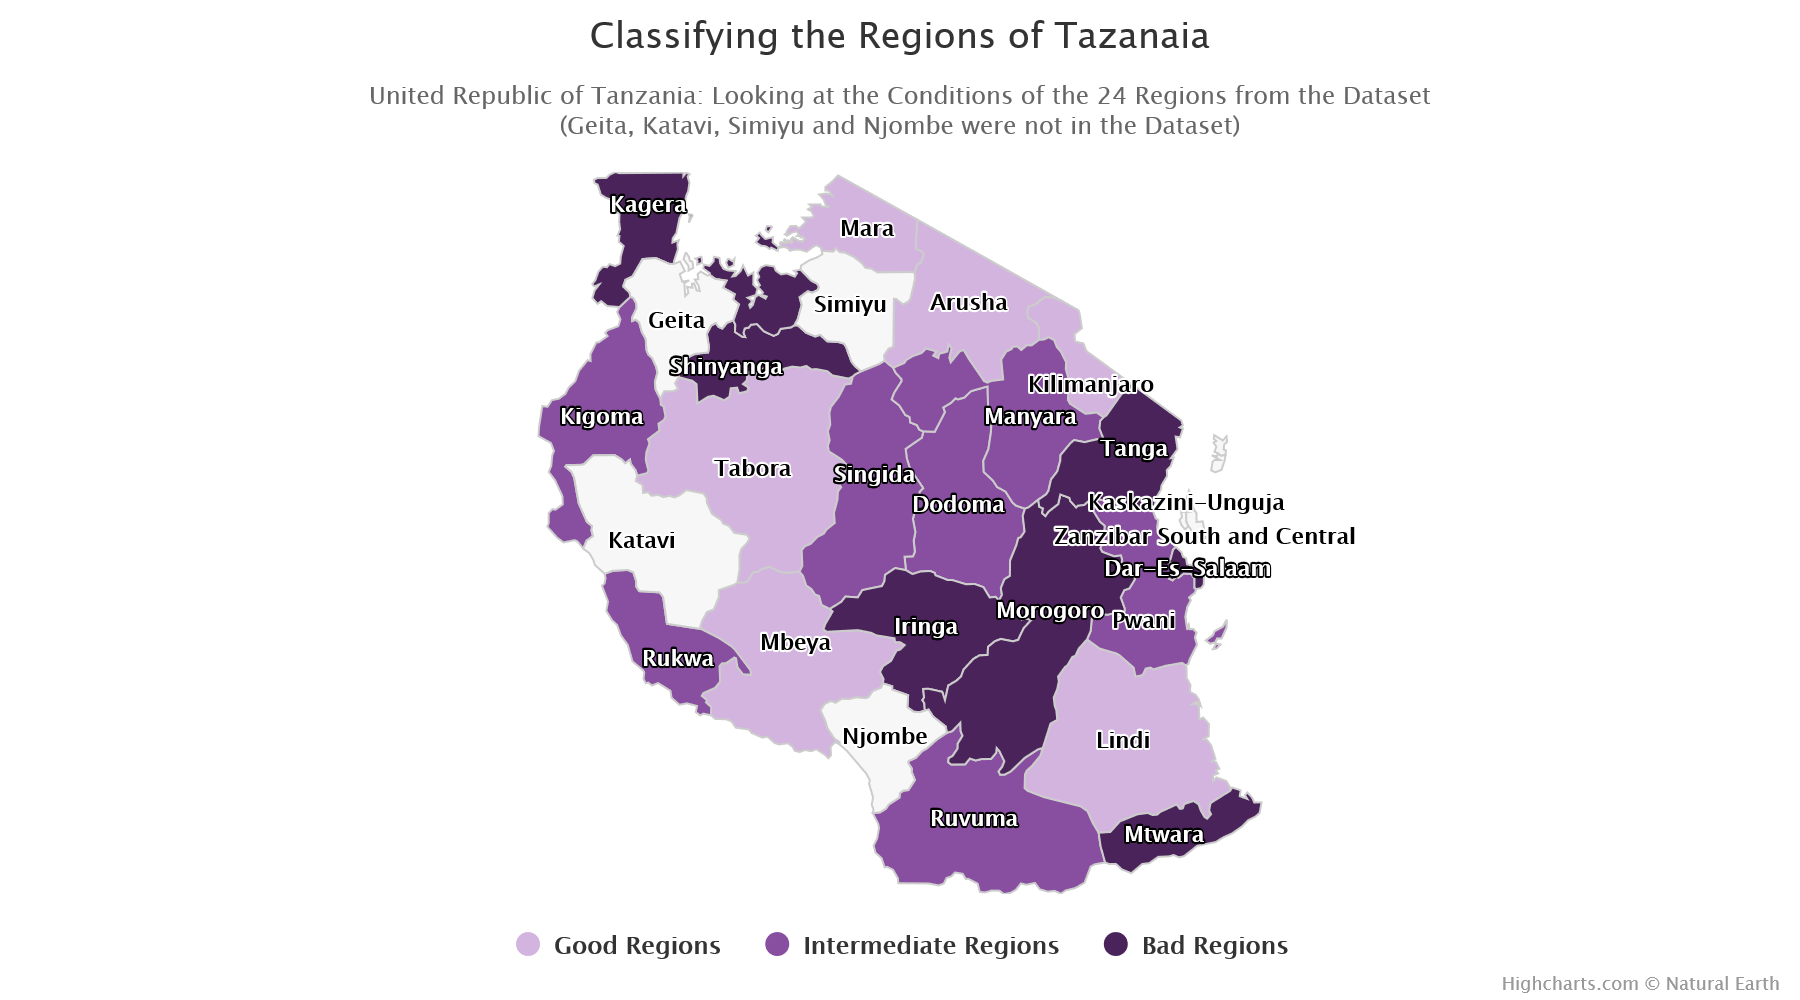</center>

<span style='font-weight:bold;color:#00FFFF'>Classifing the Regions of Tazinina : </span>Below will be the classification of the regions of Tazanania based on the wether its suitable for drining water wells.<br>
<span style='color:#00FFFF'>Good Region:</span> <br>
    
<span style='color:#00FFFF'>Intermediate Region:</span> <br>
    
<span style='color:#00FFFF'>Bad Region:</span> </p>

<p><span style='font-weight:bold;color:#fbec5d'>Conclusion:</span></p>

In [129]:
%%html
<script src="https://code.highcharts.com/maps/highmaps.js"></script>
<script src="https://code.highcharts.com/maps/modules/exporting.js"></script>
<div id="region"></div>

In [127]:
%%js
(async () => {

    const topology = await fetch(
        'https://code.highcharts.com/mapdata/countries/tz/tz-all.topo.json'
    ).then(response => response.json());

    // Prepare demo data. The data is joined to map using value of 'hc-key'
    // property by default. See API docs for 'joinBy' for more info on linking
    // data and map.
    const data = [
       ['tz-mb', 1], ['tz-as', 2], ['tz-kl', 3], ['tz-pw', 4], 
       ['tz-tb', 5], ['tz-ma', 6], ['tz-li', 7], 
    
       ['tz-km',8], 
       ['tz-rv',9],  ['tz-do',10], ['tz-pw', 11],['tz-sd',12], 
       ['tz-rk',13], ['tz-my',14], 
        
        ['tz-sh',15], ['tz-ir',16],
       ['tz-mo',17], ['tz-mw',18], ['tz-tn',19], ['tz-mt',20],
       ['tz-ds',21],['tz-kr', 22]
    ];
    

    // Create the chart
    Highcharts.mapChart('region', {
        chart: {
            map: topology,
            width:900,
            height:500
        },
        

        title: {
            text: 'Classifying the Regions of Tazanaia '
        },

        subtitle: {
            text: 'United Republic of Tanzania: Looking at the Conditions of the 24 Regions from the Dataset<br> (Geita, Katavi, Simiyu and Njombe were not in the Dataset)'
        },

        mapNavigation: {
            enabled: true,
            buttonOptions: {
                verticalAlign: 'bottom'
            }
        },

        colorAxis: {
                        dataClasses: [{
                            from: 1,
                            color: '#D2B4DE',
                            name: 'Good Regions'
                        }, {
                            from: 8,
                            color: '#884EA0',
                            name: 'Intermediate Regions'
                        }, {
                            from: 15,
                            color: '#4A235A',
                            name: 'Bad Regions'
                        }]
                    },
        series: [{
            name: 'Population Density',
            data: data,
            states: {
                hover: {
                    color: '#BADA55'
                }
            },
            dataLabels: {
                enabled: true,
                format: '{point.name}'
            }
        }]
    });

})();

<IPython.core.display.Javascript object>

In [138]:
raw_info["region"].value_counts()

Shinyanga        1311
Iringa           1305
Mbeya            1119
Kilimanjaro      1115
Morogoro         1032
Kagera            858
Mwanza            795
Arusha            761
Kigoma            717
Pwani             696
Ruvuma            666
Tanga             639
Dodoma            578
Tabora            507
Mara              482
Singida           443
Rukwa             434
Mtwara            414
Manyara           389
Lindi             374
Dar es Salaam     215
Name: region, dtype: int64

In [139]:
regions = raw_info["region"].tolist()
len(regions)

14850

In [140]:
qualification17= []
for region in regions:
    if  region == 'Shinyanga':
        qualification17.append('Bad Region')
    elif region == 'Iringa':
        qualification17.append('Bad Region')
    elif region == 'Mbeya':
        qualification17.append('Good Region')
    elif region == 'Kilimanjaro':
        qualification17.append('Intermediate Region')
    elif region == 'Morogoro':
        qualification17.append('Bad Region')
    elif region == 'Kagera':
        qualification17.append('Bad Region')
    elif region == 'Mwanza':
        qualification17.append('Bad Region')
    elif region == 'Arusha':
        qualification17.append('Good Region')
    elif region == 'Kigoma':
        qualification17.append('Good Region')
    elif region == 'Pwani':
        qualification17.append('Good Region')
    elif region == 'Ruvuma':
        qualification17.append('Intermediate Region')
    elif region == 'Tanga':
        qualification17.append('Bad Region')
    elif region == 'Dodoma':
        qualification17.append('Intermediate Region')
    elif region == 'Tabora':
        qualification17.append('Good Region')
    elif region == 'Mara':
        qualification17.append('Good Region')
    elif region == 'Singida':
        qualification17.append('Intermediate Region')
    elif region == 'Rukwa':
        qualification17.append('Intermediate Region')
    elif region == 'Mtwara':
        qualification17.append('Bad Region')
    elif region == 'Manyara':
        qualification17.append('Intermediate Region')
    elif region == 'Lindi':
        qualification17.append('Good Region')
    elif region == 'Dar es Salaam':
        qualification17.append('Bad Region')
len(qualification17)

14850

In [141]:
df18 = pd.DataFrame({'Region':regions,'Region Quality Class':qualification17})
df18

,Region,Region Quality Class
0,Manyara,Intermediate Region
1,Arusha,Good Region
2,Singida,Intermediate Region
3,Lindi,Good Region
4,Ruvuma,Intermediate Region
...,...,...
14845,Pwani,Good Region
14846,Tanga,Bad Region
14847,Singida,Intermediate Region
14848,Ruvuma,Intermediate Region


<AxesSubplot:xlabel='Region Quality Class', ylabel='count'>

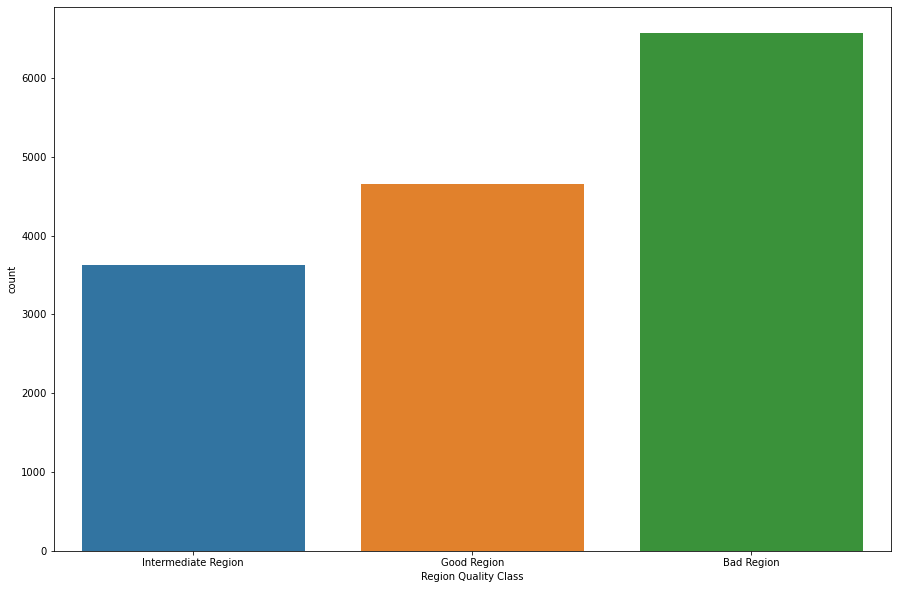

In [142]:
plt.figure(figsize=(15,10))
sns.countplot(x='Region Quality Class',data=df18)

In [143]:
category17 = []
for i in qualification17:
    if i == 'Bad Region':category17.append(3)
    elif i == 'Good Region':category17.append(1)
    elif i == 'Intermediate Region':category17.append(2)
df18['Category'] = category17
df18

,Region,Region Quality Class,Category
0,Manyara,Intermediate Region,2
1,Arusha,Good Region,1
2,Singida,Intermediate Region,2
3,Lindi,Good Region,1
4,Ruvuma,Intermediate Region,2
...,...,...,...
14845,Pwani,Good Region,1
14846,Tanga,Bad Region,3
14847,Singida,Intermediate Region,2
14848,Ruvuma,Intermediate Region,2


In [144]:
tz_well_info = pd.DataFrame({'Location_of_Well':place1,'Type':place2,
                             '___________Zone___________':place3,'Static_Head':amount_tsh3,
                             'Altitude':gps_height4,'Water_Quality_Group':amount_per_group,
                             'Quantity_of_Water':quantity_group2,'____Sources_Type1____':sources2,
                             '____Sources_Type2____':source_type,'Sources_Type3':source_class,
                             '___Waterpoint_Type___':waterpoint_type,
                             '_____________Basins___________':basins,'Pop_Density':ALL_Density,
                             'Extraction_Type':extraction_types,'Managemant_Type':management_group,
                             'Contruction_Year':construction_year,'Permit':permits,
                             'Payment_Type':payment_type,'Public_Meeting':public_meetings,'Regions':regions
})

In [145]:
tz_well_info

,Location_of_Well,Type,___________Zone___________,Static_Head,Altitude,Water_Quality_Group,Quantity_of_Water,____Sources_Type1____,____Sources_Type2____,Sources_Type3,___Waterpoint_Type___,_____________Basins___________,Pop_Density,Extraction_Type,Managemant_Type,Contruction_Year,Permit,Payment_Type,Public_Meeting,Regions
0,Manyara,state,Northern Zone,0.0,1996,Soft,seasonal,rainwater harvesting,rainwater harvesting,surface,other,Internal,82.904654,other,parastatal,2012,True,never pay,True,Manyara
1,Olmotonyi Ward,village,Northern Zone,0.0,1569,Soft,insufficient,spring,spring,groundwater,communal standpipe,Pangani,116.784533,gravity,user-group,2000,True,never pay,True,Arusha
2,Puma,twon,Central Zone,0.0,1567,Soft,insufficient,rainwater harvesting,rainwater harvesting,surface,other,Internal,71.949449,other,user-group,2010,NaN,never pay,True,Singida
3,Mkutano,village,Coastal Zone,0.0,267,Soft,dry,shallow well,shallow well,groundwater,other,Ruvuma / Southern Coast,33.907922,other,user-group,1987,True,unknown,NaN,Lindi
4,Lusonga,village,Southern Highlands Zone,500.0,1260,Soft,enough,spring,spring,groundwater,communal standpipe,Ruvuma / Southern Coast,56.009885,gravity,user-group,2000,True,pay monthly,NaN,Ruvuma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,Yombo,village,Coastal Zone,0.0,34,Fluoride Abandoned,enough,river,river/lake,surface,communal standpipe,Wami / Ruvu,87.431800,motorpump,user-group,1988,True,never pay,True,Pwani
14846,Elerai,village,Northern Zone,1000.0,0,Fluoride Abandoned,insufficient,shallow well,shallow well,groundwater,hand pump,Pangani,198.640734,handpump,user-group,1994,False,pay annually,True,Tanga
14847,Ughandi B,village,Central Zone,0.0,1476,Fluoride Abandoned,insufficient,dam,dam,surface,communal standpipe,Internal,71.949449,gravity,user-group,2010,NaN,never pay,True,Singida
14848,Magazini,village,Southern Highlands Zone,0.0,998,Fluoride Abandoned,insufficient,river,river/lake,surface,communal standpipe,Lake Nyasa,56.009885,gravity,user-group,2009,True,never pay,True,Ruvuma


In [240]:
tz_well_class = pd.DataFrame({'Location_of_Well':place1,'Type':place2,'___________Zone___________':place3,
                            '___________Static_Head____________':qualification,'______________Altitude______________':qualification1,
                            '__Quality_of_Water___':qualification2,'______Quantity_of_Water_______':qualification3,
                            '_______Source_______':qualification4,'____Source_Quality____':qualification5,
                            'Source_Class_Quality':qualification6,
                            '________Waterpiont________':qualification7, '_______Basin________':qualification8, 
                             '________Density_______':qualification9,
                            '____Water_Extraction_____':qualification10, '_______Management________':qualification11,
                            '___Construction_Year_Class___':qualification12,
                            'Permit_Class':qualification13,'Water_Quality_Class':qualification14,
                            'Water_Well_Quality_Class':qualification15,
                            'Public_Meetings':qualification16, 
                            'Region_Quality_Class':qualification17})

In [241]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('max_colwidth', 60)
tz_well_class

,Location_of_Well,Type,___________Zone___________,___________Static_Head____________,______________Altitude______________,__Quality_of_Water___,______Quantity_of_Water_______,_______Source_______,____Source_Quality____,Source_Class_Quality,________Waterpiont________,_______Basin________,________Density_______,____Water_Extraction_____,_______Management________,___Construction_Year_Class___,Permit_Class,Water_Quality_Class,Water_Well_Quality_Class,Public_Meetings,Region_Quality_Class
0,Manyara,state,Northern Zone,Bad Static Head: 0-59 or over 189,Bad Altitude: Over 1500 Feet,Good Water,Intermediate Quantity of Water,Bad Source,Bad Source,Bad Source,Unknown Waterpiont,Bad Basin,Low Density,Unknown,Bad Management,Good Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region
1,Olmotonyi Ward,village,Northern Zone,Bad Static Head: 0-59 or over 189,Bad Altitude: Over 1500 Feet,Good Water,Intermediate Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Intermediate Basin,Intermediate Density,Good Water Extraction,Good Management,Intermediate Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Good Region
2,Puma,twon,Central Zone,Bad Static Head: 0-59 or over 189,Bad Altitude: Over 1500 Feet,Good Water,Intermediate Quantity of Water,Bad Source,Bad Source,Bad Source,Unknown Waterpiont,Bad Basin,Low Density,Unknown,Good Management,Good Construction Year,Unkown,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region
3,Mkutano,village,Coastal Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Good Water,Bad Quantity of Water,Good Source,Good Source,Intermediate Source,Unknown Waterpiont,Bad Basin,Low Density,Unknown,Good Management,Bad Construction Year,Good,Unkown,Good Water well,Unkown,Good Region
4,Lusonga,village,Southern Highlands Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Good Water,Good Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Bad Basin,Low Density,Good Water Extraction,Good Management,Intermediate Construction Year,Good,Good Water Quality,Good Water well,Unkown,Intermediate Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,Yombo,village,Coastal Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Good Quantity of Water,Intermediate Source,Bad Source,Bad Source,Good Waterpiont,Intermediate Basin,Low Density,Good Water Extraction,Good Management,Bad Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Good Region
14846,Elerai,village,Northern Zone,Bad Static Head: 0-59 or over 189,Good Altitude: (-500)-0 Feet,Bad Water,Intermediate Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Intermediate Basin,Intermediate Density,Intermediate Water Extraction,Good Management,Intermediate Construction Year,Bad,Good Water Quality,Bad Water well,Bad Water well,Bad Region
14847,Ughandi B,village,Central Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Intermediate Quantity of Water,Bad Source,Bad Source,Bad Source,Good Waterpiont,Bad Basin,Low Density,Good Water Extraction,Good Management,Good Construction Year,Unkown,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region
14848,Magazini,village,Southern Highlands Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Intermediate Quantity of Water,Intermediate Source,Bad Source,Bad Source,Good Waterpiont,Good Basin,Low Density,Good Water Extraction,Good Management,Good Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region


In [148]:
def category_class_indetify(cat):
    cat_class = []
    for i in cat:
        if i == 0:cat_class.append('Unkown')
        elif i == 1:cat_class.append('Good')
        elif i == 2:cat_class.append('Intermediate')
        elif i == 3:cat_class.append('Bad')
    return cat_class

In [149]:
category_class = category_class_indetify(category)

In [150]:
category_class1 = category_class_indetify(category1)

In [151]:
category_class2 = category_class_indetify(category2)

In [152]:
category_class3 = category_class_indetify(category3)

In [153]:
category_class4 = category_class_indetify(category4)

In [154]:
category_class5 = category_class_indetify(category5)

In [155]:
category_class6 = category_class_indetify(category6)

In [156]:
category_class7 = category_class_indetify(category7)

In [157]:
category_class8 = category_class_indetify(category8)

In [158]:
category_class9 = category_class_indetify(category9)

In [159]:
category_class10 = category_class_indetify(category10)

In [160]:
category_class11 = category_class_indetify(category11)

In [161]:
category_class12 = category_class_indetify(category12)

In [162]:
category_class13 = category_class_indetify(category13)

In [163]:
category_class14 = category_class_indetify(category14)

In [164]:
category_class15 = category_class_indetify(category15)

In [165]:
category_class16 = category_class_indetify(category16)

In [166]:
category_class17 = category_class_indetify(category17)

In [244]:
technical_class = pd.DataFrame({'Location_of_Well':place1,'Type':place2,
                            '___________Zone___________':place3,
                            'Static_Head':category_class,'Altitude':category_class1,
                            'Waterpiont':category_class7,  
                            'Density':category_class9,
                            'Extraction':category_class10, 'Management':category_class11,
                            'Construction':category_class12,
                            'Permit':category_class13,
                            'Public_Meetings':category_class16 })

In [245]:
technical_class

,Location_of_Well,Type,___________Zone___________,Static_Head,Altitude,Waterpiont,Density,Extraction,Management,Construction,Permit,Public_Meetings
0,Manyara,state,Northern Zone,Bad,Bad,Unkown,Good,Unkown,Bad,Good,Good,Bad
1,Olmotonyi Ward,village,Northern Zone,Bad,Bad,Good,Intermediate,Good,Good,Intermediate,Good,Bad
2,Puma,twon,Central Zone,Bad,Bad,Unkown,Good,Unkown,Good,Good,Unkown,Bad
3,Mkutano,village,Coastal Zone,Bad,Intermediate,Unkown,Good,Unkown,Good,Bad,Good,Unkown
4,Lusonga,village,Southern Highlands Zone,Bad,Intermediate,Good,Good,Good,Good,Intermediate,Good,Unkown
...,...,...,...,...,...,...,...,...,...,...,...,...
14845,Yombo,village,Coastal Zone,Bad,Intermediate,Good,Good,Good,Good,Bad,Good,Bad
14846,Elerai,village,Northern Zone,Bad,Good,Good,Intermediate,Intermediate,Good,Intermediate,Bad,Bad
14847,Ughandi B,village,Central Zone,Bad,Intermediate,Good,Good,Good,Good,Good,Unkown,Bad
14848,Magazini,village,Southern Highlands Zone,Bad,Intermediate,Good,Good,Good,Good,Good,Good,Bad


In [242]:
water_class = pd.DataFrame({'Location_of_Well':place1,'Type':place2,
                            '___________Zone___________':place3,
                            'Quality_Water':category_class2,'Quantity_Water':category_class3,
                            'Source':category_class4,'Source_Quality1':category_class5,
                            'Source_Quality2':category_class6,
                             'Basin':category_class8, 
                            'Water_Quality1':category_class14,
                            'Water_Quality2':category_class15,
                            'Region_Quality':category_class17})

In [243]:
water_class

,Location_of_Well,Type,___________Zone___________,Quality_Water,Quantity_Water,Source,Source_Quality1,Source_Quality2,Basin,Water_Quality1,Water_Quality2,Region_Quality
0,Manyara,state,Northern Zone,Good,Intermediate,Bad,Bad,Bad,Bad,Bad,Good,Intermediate
1,Olmotonyi Ward,village,Northern Zone,Good,Intermediate,Good,Good,Intermediate,Intermediate,Bad,Good,Good
2,Puma,twon,Central Zone,Good,Intermediate,Bad,Bad,Bad,Bad,Bad,Good,Intermediate
3,Mkutano,village,Coastal Zone,Good,Bad,Good,Good,Intermediate,Bad,Unkown,Good,Good
4,Lusonga,village,Southern Highlands Zone,Good,Good,Good,Good,Intermediate,Bad,Good,Good,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...
14845,Yombo,village,Coastal Zone,Bad,Good,Intermediate,Bad,Bad,Intermediate,Bad,Good,Good
14846,Elerai,village,Northern Zone,Bad,Intermediate,Good,Good,Intermediate,Intermediate,Good,Bad,Bad
14847,Ughandi B,village,Central Zone,Bad,Intermediate,Bad,Bad,Bad,Bad,Bad,Good,Intermediate
14848,Magazini,village,Southern Highlands Zone,Bad,Intermediate,Intermediate,Bad,Bad,Good,Bad,Good,Intermediate


In [171]:
altitude_good_var = []
for i in range(-57,1):altitude_good_var.append(i)

waterpiont_good_var = [0, 1, 2]

pop_good_var = [82.904654, 71.949449, 33.907922, 56.009885, 68.663408, 77.946361, 87.4318, 81.358809]

extract_good_var = [0, 1, 2, 3]

construct_good_var = []
for i in range(2001,2014): construct_good_var.append(i)

static_good_var = [100]

permit_good_var = [0]

mange_good_var = [0]

public_good_var = [0]

In [172]:
import numpy
a = [altitude_good_var, waterpiont_good_var, pop_good_var, extract_good_var, 
     construct_good_var, static_good_var, permit_good_var,mange_good_var, public_good_var]
all_good_var = [list(x) for x in numpy.array(numpy.meshgrid(*a)).T.reshape(-1,len(a))]

In [173]:
len(all_good_var)

72384

In [174]:
altitude_inter_var = []
for i in range(1,1500):altitude_inter_var.append(i)

waterpiont_inter_var = [3]

pop_inter_var = [116.784533, 197.031628, 320.329492, 198.640734, 210.305289, 148.806294, 130.632476,
         195.030255, 251.975705, 207.59881, 114.152159]

extract_inter_var = [4, 5]

construct_inter_var = []
for i in range(1991,2003): construct_inter_var.append(i)

static_inter_var = [150, 60, 70]

permit_inter_var = [1]

mange_inter_var = [1]

public_inter_var = [1]

In [175]:
a = [altitude_inter_var, waterpiont_inter_var, pop_inter_var, extract_inter_var, 
     construct_inter_var, static_inter_var, permit_inter_var,mange_inter_var,public_inter_var]
all_inter_var = [list(x) for x in numpy.array(numpy.meshgrid(*a)).T.reshape(-1,len(a))]

In [176]:
len(all_inter_var)

1187208

In [177]:
numbers2 = []
for number in gps_height4:
    if 1500 <= number :numbers2.append(number)

In [178]:
numbers3 = []
for number in construction_year:
    if number <= 1991:numbers3.append(number)

In [179]:
altitude_bad_var = []
for i in Counter(numbers2):altitude_bad_var.append(i)

waterpiont_bad_var = [4]

pop_bad_var = [758.552394, 8112.52974]

extract_bad_var = [6]

construct_bad_var = []
for i in Counter(numbers3):construct_bad_var.append(i)

static_bad_var = [0.0, 500.02, 30.0, 5.0, 1000.0, 1200.0, 200.0, 20.0,
                 50.0, 1500.0, 2400.0, 7.0, 7500.0, 2000.0, 300.0,
                 10.0, 250.0, 4000.0, 3000.0, 2500.0, 25.0,
                 6.0, 40.0, 750.0, 400.0, 600.0, 5000.0, 6000.0,
                 33.0, 18000.0, 2200.0, 12000.0, 3600.0, 8000.0, 700.0, 4700.0, 450.0, 10000.0,
                 15.0, 20000.0, 6500.0, 30000.0, 25000.0, 35000.0, 15000.0, 200000.0, 100000.0,
                 70000.0, 0.2, 14000.0, 7200.0, 3500.0, 2.0, 40000.0, 350.0, 35.0, 7000.0,
                 3.0, 2550.0, 50000.0, 60000.0, 0.5, 550.0, 2800.0]

permit_bad_var = [2]

mange_bad_var = [2, 3]
 
public_bad_var = [2]

In [180]:
a = [altitude_bad_var, waterpiont_bad_var, pop_bad_var, extract_bad_var, 
     construct_bad_var, static_bad_var, permit_bad_var,mange_bad_var,public_bad_var ]
all_bad_var = [list(x) for x in numpy.array(numpy.meshgrid(*a)).T.reshape(-1,len(a))]

In [181]:
len(all_bad_var)

5601024

In [182]:
all_var_class = all_good_var+ all_inter_var+ all_bad_var

In [183]:
len(all_var_class)

6860616

In [184]:
tech_y = []
for i in range(72384):
    tech_y.append(0)
for i in range(1187208):
    tech_y.append(1)
for i in range(5601024):
    tech_y.append(2)

In [185]:
len(tech_y)

6860616

In [186]:
extract = []
for extraction in extraction_types:
    if extraction == 'gravity' :
        extract.append(0)
    elif extraction == 'handpump':
        extract.append(4)
    elif extraction == 'other':
        extract.append(7)
    elif extraction == 'submersible':
        extract.append(1)
    elif extraction == 'motorpump':
        extract.append(2)
    elif extraction == 'rope pump':
        extract.append(5)
    elif extraction == 'wind-powered':
        extract.append(3)
len(extract)

14850

In [187]:
permition = []
for permit in permits:
    if permit == True :
        permition.append(0)
    elif permit == False :
        permition.append(2)
    else:
        permition.append(3)
len(permition)

14850

In [188]:
water_piont = []
for waterpoint in waterpoint_type:
    if waterpoint == 'communal standpipe' :
        water_piont.append(0)
    elif waterpoint == 'hand pump':
        water_piont.append(1)
    elif waterpoint == 'other':
        water_piont.append(5)
    elif waterpoint == 'improved spring':
        water_piont.append(2)
    elif waterpoint == 'cattle trough':
        water_piont.append(3)
    elif waterpoint == 'dam':
        water_piont.append(4)
len(water_piont)

14850

In [189]:
manage = []
for management in management_group:
    if management == 'user-group' :
        manage.append(0)
    elif management == 'commercial':
        manage.append(1)
    elif management == 'parastatal':
        manage.append(2)
    elif management == 'other':
        manage.append(3)
    elif management == 'unknown':
        manage.append(4)
len(manage)

14850

In [190]:
pub_met = []
for meetings in public_meetings:
    if  meetings == True :
        pub_met.append(2)
    elif meetings == False :
        pub_met.append(0)
    else:
        pub_met.append(3)
len(pub_met)

14850

In [191]:
tech_predict = []
for i in range(14850):
    tech_predict.append([gps_height4[i],water_piont[i], ALL_Density[i], extract[i],
                         construction_year[i],amount_tsh3[i], permition[i], manage[i], pub_met[i]])

In [192]:
len(tech_predict)

14850

In [246]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OutputCodeClassifier
from sklearn.preprocessing import MinMaxScaler #fixed import
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
bnb = BernoulliNB()
cnb = ComplementNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [1185]:
#X, y = datasets.load_iris(return_X_y=True)
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1191]:
predict1 = list(model.predict(tech_predict))

In [1206]:
model2 = OneVsOneClassifier(LinearSVC(random_state=0)).fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1207]:
predict2 = list(model2.predict(tech_predict))

In [1214]:
clf = OutputCodeClassifier(LinearSVC(random_state=0),
                           code_size=2, random_state=0)

In [1215]:
clf.fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OutputCodeClassifier(code_size=2, estimator=LinearSVC(random_state=0),
                     random_state=0)

In [1216]:
predict3 = list(clf.predict(tech_predict))

In [1223]:
clf1 = gnb.fit(all_var_class, tech_y)

In [1225]:
predict4 = clf1.predict(tech_predict)

In [1249]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(all_var_class)
X_test = scaler.transform(tech_predict)

In [1250]:
clf5 = cnb.fit(X_train, tech_y)

In [1251]:
predict5 = clf5.predict(X_test)

In [1253]:
clf6 = mnb.fit(X_train, tech_y)

In [1254]:
predict6 = clf6.predict(X_test)

In [1230]:
cf4 = bnb.fit(all_var_class, tech_y)

In [1232]:
predict7 = cf4.predict(tech_predict)

In [188]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[BernoulliNB(), OutputCodeClassifier(LinearSVC(random_state=0),
                           code_size=2, random_state=0),OneVsOneClassifier(LinearSVC(random_state=0)),
                        OneVsRestClassifier(LinearSVC(random_state=0)),GaussianNB()], 
                        meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [217]:
clf_stack.fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\sit

StackingClassifier(classifiers=[BernoulliNB(),
                                OutputCodeClassifier(code_size=2,
                                                     estimator=LinearSVC(random_state=0),
                                                     random_state=0),
                                OneVsOneClassifier(estimator=LinearSVC(random_state=0)),
                                OneVsRestClassifier(estimator=LinearSVC(random_state=0)),
                                GaussianNB()],
                   meta_classifier=LogisticRegression(),
                   use_features_in_secondary=True)

In [218]:
predict8 = clf_stack.predict(tech_predict)

In [226]:
lr = OneVsOneClassifier(LinearSVC(random_state=0))  # defining meta-classifier
clf_stack1 = StackingClassifier(classifiers =[BernoulliNB(), OneVsOneClassifier(LinearSVC(random_state=0))], 
                        meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [227]:
clf_stack1.fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


StackingClassifier(classifiers=[BernoulliNB(),
                                OneVsOneClassifier(estimator=LinearSVC(random_state=0))],
                   meta_classifier=OneVsOneClassifier(estimator=LinearSVC(random_state=0)),
                   use_features_in_secondary=True)

In [228]:
predict9 = clf_stack1.predict(tech_predict)

In [230]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack2 = StackingClassifier(classifiers =[BernoulliNB(), OneVsOneClassifier(LinearSVC(random_state=0))], 
                        meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [231]:
clf_stack2.fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[BernoulliNB(),
                                OneVsOneClassifier(estimator=LinearSVC(random_state=0))],
                   meta_classifier=LogisticRegression(),
                   use_features_in_secondary=True)

In [232]:
predict10 = clf_stack2.predict(tech_predict)

In [233]:
dtree_model = DecisionTreeClassifier(max_depth = 3).fit(all_var_class, tech_y)

In [234]:
predict12 = dtree_model.predict(tech_predict)

In [243]:
svm_model_linear = SVC(kernel = 'linear', C = 3).fit(all_var_class, tech_y)

In [244]:
predict13 = svm_model_linear.predict(tech_predict)

In [247]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(all_var_class, tech_y)

In [248]:
predict14 = knn.predict(tech_predict)

In [250]:
clf_new = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf_new.fit(all_var_class, tech_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [251]:
predict15 = clf_new.predict(tech_predict)

<h3>Stacking<h3>

In [204]:
lr = LogisticRegression()  # defining meta-classifier
final_stack = StackingClassifier(classifiers =[BernoulliNB(), 
                                              SVC(kernel = 'linear', C = 3),
                                              DecisionTreeClassifier(max_depth = 3),
                                              DecisionTreeClassifier(max_depth = 2)], 
                        meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [205]:
final_stack.fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[BernoulliNB(), SVC(C=3, kernel='linear'),
                                DecisionTreeClassifier(max_depth=3),
                                DecisionTreeClassifier(max_depth=2)],
                   meta_classifier=LogisticRegression(),
                   use_features_in_secondary=True)

In [206]:
all_pred = final_stack.predict(tech_predict)

<h4>Boosting<h4>

In [201]:
lr = LogisticRegression()
clff = AdaBoostClassifier()

In [210]:
clff.fit(all_var_class, tech_y)

AdaBoostClassifier()

In [211]:
predict16 = clff.predict(tech_predict)

In [215]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(all_var_class, tech_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [216]:
xgboost_pred = xgb_model.predict(tech_predict)

In [231]:
est1 = BernoulliNB() 
est2 = DecisionTreeClassifier(max_depth = 3)
est3 = OneVsOneClassifier(LinearSVC(random_state=0))
est4 = SVC(kernel = 'linear', C = 3)
est5 = GaussianNB()
est6 =  DecisionTreeClassifier(max_depth = 2)

In [212]:
eclf1 = VotingClassifier(estimators= [('bnb', est1), ('occ', est2), ('ooc', est3), 
                                     ('orc', est4), ('gnb', est5), ],  voting='hard')

In [213]:
eclf1 = eclf1.fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\sit

In [214]:
vooting_pred = eclf1.predict(tech_predict)

In [232]:
lr = LogisticRegression()  # defining meta-classifier
final_stack_last = StackingClassifier(classifiers =[BernoulliNB(), 
                                              SVC(kernel = 'linear', C = 3),
                                              DecisionTreeClassifier(max_depth = 3),
                                              xgb.XGBClassifier(objective="multi:softprob", random_state=42),
                                              AdaBoostClassifier()
                                              ], 
                        meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [219]:
final_stack_last.fit(all_var_class, tech_y)

StackingClassifier(classifiers=[BernoulliNB(), SVC(C=3, kernel='linear'),
                                DecisionTreeClassifier(max_depth=3),
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importanc...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, random_state=42,
                                              reg_alpha=None, ...),
                                AdaBoostClassifier()],
                   meta_classifier=LogisticRegression(),
                   use_features_in_secondary=True)

In [221]:
last_stack = final_stack_last.predict(tech_predict)

In [223]:
lr = LogisticRegression(multi_class='multinomial', random_state=1)  # defining meta-classifier
final_stack_last1 = StackingClassifier(classifiers =[BernoulliNB(), 
                                              SVC(kernel = 'linear', C = 3),
                                              DecisionTreeClassifier(max_depth = 3),
                                              xgb.XGBClassifier(objective="multi:softprob", random_state=42),
                                              AdaBoostClassifier()
                                              ], 
                        meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [224]:
final_stack_last1.fit(all_var_class, tech_y)

StackingClassifier(classifiers=[BernoulliNB(), SVC(C=3, kernel='linear'),
                                DecisionTreeClassifier(max_depth=3),
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importanc...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, random_state=42,
                                              reg_alpha=None, ...),
                                AdaBoostClassifier()],
                   meta_classifier=LogisticRegression(multi_class='multinomial',
                                                      random_state=1),
                   use_features_in_secondary=True)

In [225]:
last_stack1 = final_stack_last1.predict(tech_predict)

In [227]:
lr = LogisticRegression(multi_class='multinomial', random_state=1)  # defining meta-classifier
final_stack_last2 = StackingClassifier(classifiers =[
                                              xgb.XGBClassifier(objective="multi:softprob", random_state=42),
                                              AdaBoostClassifier()
                                              ], 
                        meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [228]:
final_stack_last2.fit(all_var_class, tech_y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              ma...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, random_state=42,
                                              reg_alpha=None, ...),
                                AdaBoostClassifier()],
                   meta_classifier=LogisticRegression(multi_class='multinomial',
                                                      random_state=1),
                   use_features_in_secondary=True)

In [229]:
last_stack2 = final_stack_last2.predict(tech_predict)

In [1193]:
Counter(predict1)

Counter({1: 11184, 2: 3408, 0: 258})

In [1217]:
Counter(predict2)

Counter({1: 8374, 0: 909, 2: 5567})

In [1218]:
Counter(predict3)

Counter({1: 11173, 2: 3534, 0: 143})

In [1226]:
Counter(predict4)

Counter({2: 7648, 1: 7195, 0: 7})

In [1233]:
Counter(predict7)

Counter({2: 4299, 0: 9771, 1: 780})

In [238]:
Counter(predict8)#stack of everything

Counter({2: 6064, 1: 8374, 0: 412})

In [215]:
Counter(vooting_pred)#vooting of everything

Counter({1: 10759, 2: 3792, 0: 299})

In [229]:
Counter(predict9)#stack of pred2 and pred7

Counter({1: 8379, 0: 904, 2: 5567})

In [233]:
Counter(predict10)#stack of pred2 and pred7

Counter({2: 6317, 1: 8061, 0: 472})

In [245]:
Counter(predict11)#2

Counter({2: 13559, 0: 1291})

In [235]:
Counter(predict12)#3

Counter({2: 1672, 0: 8901, 1: 4277})

In [246]:
Counter(predict13)

Counter({1: 10818, 0: 3713, 2: 319})

In [249]:
Counter(predict14)

Counter({1: 8234, 2: 6554, 0: 62})

In [252]:
Counter(predict15)

Counter({1: 7553, 0: 850, 2: 6447})

In [212]:
Counter(predict16)#boosting

Counter({2: 278, 1: 9479, 0: 5093})

In [217]:
Counter(xgboost_pred)#xgboost

Counter({2: 1631, 0: 13185, 1: 34})

In [199]:
Counter(all_pred)#stacking1

Counter({2: 6318, 1: 8060, 0: 472})

In [203]:
Counter(all_pred)#stacking2

Counter({2: 6064, 1: 8373, 0: 413})

In [207]:
Counter(all_pred)#stacking3

Counter({2: 6283, 1: 8073, 0: 494})

In [222]:
Counter(last_stack)

Counter({2: 6064, 1: 8374, 0: 412})

In [226]:
Counter(last_stack1)

Counter({2: 6064, 1: 8373, 0: 413})

In [230]:
Counter(last_stack2)

Counter({2: 6237, 1: 8142, 0: 471})

In [255]:
numbers4 = []
for number in populations:
    if 0 <= number <= 2000:numbers4.append(number)

In [259]:
quality_good_var = [0, 1, 2]

waterpiont_good_var = [0]

source_good_var = [0, 1, 2]

sor_qual_good_var1 = [0, 1]

sor_qual_good_var2 = [0]

basin_good_var = [0, 1]

water_qual_good_var1 = [0, 1, 2, 3]

water_qual_good_var2 = []
for i in Counter(numbers4): water_qual_good_var2.append(i)

reg_qual_good_var = [0, 1, 2, 3, 4, 5, 6]

In [261]:
a = [quality_good_var, waterpiont_good_var, source_good_var, sor_qual_good_var1, 
     sor_qual_good_var2, basin_good_var, water_qual_good_var1, water_qual_good_var2, 
     reg_qual_good_var ]
all_good_var1 = [list(x) for x in numpy.array(numpy.meshgrid(*a)).T.reshape(-1,len(a))]

In [262]:
len(all_good_var1)

577584

In [264]:
quality_inter_var = [3, 4]

waterpiont_inter_var = [1, 2]

source_inter_var = [3, 4]

sor_qual_inter_var1 = [2]

sor_qual_inter_var2 = [1]

basin_inter_var = [2, 3, 4]

water_qual_inter_var1 = [4]

water_qual_inter_var2 = [-1]

reg_qual_inter_var = [7, 8, 9, 10, 11, 12]

In [276]:
a = [quality_inter_var, waterpiont_inter_var, source_inter_var, sor_qual_inter_var1, 
     sor_qual_inter_var2, basin_inter_var, water_qual_inter_var1, water_qual_inter_var2, 
     reg_qual_inter_var ]
all_inter_var1 = [list(x) for x in numpy.array(numpy.meshgrid(*a)).T.reshape(-1,len(a))]

In [277]:
len(all_inter_var1)

144

In [268]:
numbers5 = []
for number in populations:
    if  2001 <= number :numbers5.append(number)

In [271]:
quality_bad_var = [5, 6]

waterpiont_bad_var = [3]

source_bad_var = [5, 6, 7]

sor_qual_bad_var1 = [3, 4, 5]

sor_qual_bad_var2 = [2]

basin_bad_var = [5, 6, 7, 8]

water_qual_bad_var1 = [5, 6]

water_qual_bad_var2 = []
for i in Counter(numbers5): water_qual_bad_var2.append(i)

reg_qual_bad_var = [13, 14, 15, 16, 17, 18, 19, 20]

In [278]:
a = [quality_bad_var, waterpiont_bad_var, source_bad_var, sor_qual_bad_var1, 
     sor_qual_bad_var2, basin_bad_var, water_qual_bad_var1, water_qual_bad_var2, 
     reg_qual_bad_var ]
all_bad_var1 = [list(x) for x in numpy.array(numpy.meshgrid(*a)).T.reshape(-1,len(a))]

In [279]:
len(all_bad_var1)

73728

In [280]:
all_var_class1 = all_good_var1 + all_inter_var1 + all_bad_var1

In [281]:
len(all_var_class1)

651456

In [282]:
water_y = []
for i in range(577584):
    water_y.append(0)
for i in range(144):
    water_y.append(1)
for i in range(73728):
    water_y.append(2)

In [283]:
len(water_y)

651456

In [284]:
qual_water = []
for water in amount_per_group:
    if water == 'Soft' :
        qual_water.append(0)
    elif water == 'Milky':
        qual_water.append(1)
    elif  water =='Fluoride':
        qual_water.append(2)
    elif water == 'Salty' :
        qual_water.append(3)
    elif water == 'Coloured':
        qual_water.append(4)
    elif water == 'Salty Abandoned':
        qual_water.append(5)
    elif water == 'Fluoride Abandoned':
        qual_water.append(6)
    elif water == 'Unkown':
        qual_water.append(7)
len(qual_water)

14850

In [285]:
quan_water = []
for water in quantity_group2:
    if water == 'enough' :
        quan_water.append(0)
    elif water == 'insufficient':
            quan_water.append(1)
    elif water == 'seasonal':
        quan_water.append(2)
    elif water == 'dry' :
        quan_water.append(3)
    elif water == 'unknown':
            quan_water.append(4)
len(quan_water)

14850

In [286]:
sour_water = []
for source in sources2:
    if source == 'shallow well' :
        sour_water.append(0)
    elif source == 'spring':
        sour_water.append(1)
    elif source == 'machine dbh':
        sour_water.append(2)
    elif source == 'river' :
        sour_water.append(3)
    elif source == 'rainwater harvesting':
         sour_water.append(5)
    elif source == 'hand dtw':
        sour_water.append(4)
    elif source == 'lake' or 'dam':
        sour_water.append(6)
len(sour_water)

14850

In [287]:
sour_qual1 = []
for source in source_type:
    if source == 'shallow well' :
        sour_qual1.append(0)
    elif source == 'spring':
        sour_qual1.append(1)
    elif source == 'borehole':
        sour_qual1.append(2)
    elif source == 'river/lake' :
        sour_qual1.append(3)
    elif source == 'rainwater harvesting':
         sour_qual1.append(4)
    elif source == 'other':
        sour_qual1.append(6)
    elif source == 'dam':
        sour_qual1.append(5)
len(sour_qual1)

14850

In [288]:
sour_qual2 = []
for source in source_class:
    if source == 'groundwater' :
        sour_qual2.append(1)
    elif source == 'surface':
        sour_qual2.append(2)
    elif source == 'unknown':
        sour_qual2.append(3)
len(sour_qual2)

14850

In [289]:
bas = []
for basin in basins:
    if basin == 'Lake Tanganyika' :
        bas.append(0)
    elif basin == 'Lake Nyasa':
        bas.append(1)
    elif basin == 'Lake Victoria':
        bas.append(5)
    elif basin == 'Ruvuma / Southern Coast':
        bas.append(6)
    elif basin == 'Rufiji':
        bas.append(7)
    elif basin == 'Lake Rukwa':
        bas.append(2)
    elif basin == 'Pangani':
        bas.append(3)
    elif basin == 'Wami / Ruvu':
        bas.append(4)
    elif basin == 'Internal':
        bas.append(8)
len(bas)

14850

In [295]:
war_qual1 = []
for payments in payment_type:
    if payments  == 'pay per bucket': 
        war_qual1.append(0)
    elif payments  == 'pay monthly': 
        war_qual1.append(1)
    elif payments  == 'pay annually': 
        war_qual1.append(2)
    elif payments  == 'pay when scheme fails': 
        war_qual1.append(3)
    elif payments == 'unknown' :
        war_qual1.append(7)
    elif payments == 'other' :
        war_qual1.append(5)
    elif  payments  == 'never pay': 
        war_qual1.append(6)
len(war_qual1)

14850

In [291]:
reg_qual= []
for region in regions:
    if  region == 'Shinyanga':
        reg_qual.append(13)
    elif region == 'Iringa':
        reg_qual.append(14)
    elif region == 'Mbeya':
        reg_qual.append(0)
    elif region == 'Kilimanjaro':
        reg_qual.append(7)
    elif region == 'Morogoro':
        reg_qual.append(15)
    elif region == 'Kagera':
        reg_qual.append(16)
    elif region == 'Mwanza':
        reg_qual.append(17)
    elif region == 'Arusha':
        reg_qual.append(1)
    elif region == 'Kigoma':
        reg_qual.append(2)
    elif region == 'Pwani':
        reg_qual.append(3)
    elif region == 'Ruvuma':
        reg_qual.append(8)
    elif region == 'Tanga':
        reg_qual.append(18)
    elif region == 'Dodoma':
        reg_qual.append(9)
    elif region == 'Tabora':
        reg_qual.append(4)
    elif region == 'Mara':
        reg_qual.append(5)
    elif region == 'Singida':
        reg_qual.append(10)
    elif region == 'Rukwa':
        reg_qual.append(11)
    elif region == 'Mtwara':
        reg_qual.append(19)
    elif region == 'Manyara':
        reg_qual.append(12)
    elif region == 'Lindi':
        reg_qual.append(6)
    elif region == 'Dar es Salaam':
        reg_qual.append(20)
len(reg_qual)

14850

In [296]:
water_predict = []
for i in range(14850):
    water_predict.append([qual_water[i], quan_water[i], sour_water[i], sour_qual1[i],
                         sour_qual2[i], bas[i], war_qual1[i], 
                         populations[i], reg_qual[i]])

In [297]:
len(water_predict)

14850

In [299]:
dtree_model1 = DecisionTreeClassifier(max_depth = 3)

In [300]:
dtree_model1.fit(all_var_class1, water_y)

DecisionTreeClassifier(max_depth=3)

In [301]:
water_predict = dtree_model1.predict(water_predict)

In [302]:
Counter(water_predict)

Counter({2: 4756, 1: 3860, 0: 6234})

In [236]:
classification = []
for i in predict12:
    if i == 0: classification.append('Good')
    elif i == 1: classification.append('Intermediate')
    elif i == 2: classification.append('Bad')

In [237]:
technical_class_pred = technical_class
technical_class_pred['Final_Classification'] = classification

In [326]:
technical_class_pred#[600:610]#[11500:12000]

,Location_of_Well,Type,___________Zone___________,Static_Head,Altitude,Waterpiont,Density,Extraction,Management,Construction,Permit,Final_Classification
0,Manyara,state,Northern Zone,Bad,Bad,Unkown,Good,Unkown,Bad,Good,Good,Bad
1,Olmotonyi Ward,village,Northern Zone,Bad,Bad,Good,Intermediate,Good,Good,Intermediate,Good,Good
2,Puma,twon,Central Zone,Bad,Bad,Unkown,Good,Unkown,Good,Good,Unkown,Bad
3,Mkutano,village,Coastal Zone,Bad,Intermediate,Unkown,Good,Unkown,Good,Bad,Good,Bad
4,Lusonga,village,Southern Highlands Zone,Bad,Intermediate,Good,Good,Good,Good,Intermediate,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
14845,Yombo,village,Coastal Zone,Bad,Intermediate,Good,Good,Good,Good,Bad,Good,Good
14846,Elerai,village,Northern Zone,Bad,Good,Good,Intermediate,Intermediate,Good,Intermediate,Bad,Intermediate
14847,Ughandi B,village,Central Zone,Bad,Intermediate,Good,Good,Good,Good,Good,Unkown,Good
14848,Magazini,village,Southern Highlands Zone,Bad,Intermediate,Good,Good,Good,Good,Good,Good,Good


In [303]:
classification1 = []
for i in water_predict:
    if i == 0: classification1.append('Good')
    elif i == 1: classification1.append('Intermediate')
    elif i == 2: classification1.append('Bad')

In [349]:
water_class_pred = water_class
water_class_pred['Final_Classification'] = classification1

In [350]:
water_class_pred#[600:610]#[11500:12000]

,Location_of_Well,Type,___________Zone___________,Quality_Water,Quantity_Water,Source,Source_Quality1,Source_Quality2,Basin,Water_Quality1,Water_Quality2,Region_Quality,Final_Classification
0,Manyara,state,Northern Zone,Good,Intermediate,Bad,Bad,Bad,Bad,Bad,Good,Intermediate,Bad
1,Olmotonyi Ward,village,Northern Zone,Good,Intermediate,Good,Good,Intermediate,Intermediate,Bad,Good,Good,Intermediate
2,Puma,twon,Central Zone,Good,Intermediate,Bad,Bad,Bad,Bad,Bad,Good,Intermediate,Bad
3,Mkutano,village,Coastal Zone,Good,Bad,Good,Good,Intermediate,Bad,Unkown,Good,Good,Bad
4,Lusonga,village,Southern Highlands Zone,Good,Good,Good,Good,Intermediate,Bad,Good,Good,Intermediate,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,Yombo,village,Coastal Zone,Bad,Good,Intermediate,Bad,Bad,Intermediate,Bad,Good,Good,Intermediate
14846,Elerai,village,Northern Zone,Bad,Intermediate,Good,Good,Intermediate,Intermediate,Good,Bad,Bad,Good
14847,Ughandi B,village,Central Zone,Bad,Intermediate,Bad,Bad,Bad,Bad,Bad,Good,Intermediate,Bad
14848,Magazini,village,Southern Highlands Zone,Bad,Intermediate,Intermediate,Bad,Bad,Good,Bad,Good,Intermediate,Intermediate


In [330]:
counter = []
for i in range(14850):
    count = 0
    if category_class[i] == 'Good': count+=1
    if category_class1[i] == 'Good': count+=1
    if category_class2[i] == 'Good': count+=1
    if category_class3[i] == 'Good': count+=1
    if category_class4[i] == 'Good': count+=1
    if category_class5[i] == 'Good': count+=1
    if category_class6[i] == 'Good': count+=1
    if category_class7[i] == 'Good': count+=1
    if category_class8[i] == 'Good': count+=1
    if category_class9[i] == 'Good': count+=1
    if category_class10[i] == 'Good': count+=1
    if category_class11[i] == 'Good': count+=1
    if category_class12[i] == 'Good': count+=1
    if category_class13[i] == 'Good': count+=1
    if category_class14[i] == 'Good': count+=1
    if category_class15[i] == 'Good': count+=1
    if category_class16[i] == 'Good': count+=1
    if category_class17[i] == 'Good': count+=1
    counter.append(count)

In [332]:
Counter(counter)

Counter({5: 283,
         9: 3406,
         8: 3140,
         11: 1810,
         10: 2705,
         7: 1828,
         6: 828,
         12: 639,
         13: 123,
         4: 71,
         14: 3,
         3: 12,
         2: 2})

In [333]:
high_index = []
for i,x in enumerate(counter):
    if x == 14 or x == 13: high_index.append(i)

In [335]:
final_class = []
for i in range(14850):
    if i in high_index: final_class.append('High Functional')
    elif classification[i] == 'Good' and classification1[i] == 'Good': final_class.append('Functional')
    elif classification[i]=='Bad' and classification1[i]=='Bad': final_class.append('Non-Functional')
    elif (classification[i]=='Good' and classification1[i]=='Intermediate') or (classification[i]=='Intermediate' and classification1[i]=='Good'): 
        final_class.append('High Low-Functional')
    elif classification[i]=='Intermediate' and classification1[i]=='Intermediate': 
        final_class.append('High Intermediate Low-Functional')
    elif (classification[i]=='Good' and classification1[i]=='Bad') or (classification[i]=='Bad' and classification1[i]=='Good'): 
        final_class.append('Low Intermediate Low-Functional')
    elif (classification[i]=='Intermediate' and classification1[i]=='Bad') or (classification[i]=='Bad' and classification1[i]=='Intermediate'): 
        final_class.append('Low Low-Functional')

In [336]:
len(final_class)

14850

In [337]:
Counter(final_class)

Counter({'Non-Functional': 910,
         'High Low-Functional': 3760,
         'Functional': 4494,
         'Low Low-Functional': 2438,
         'Low Intermediate Low-Functional': 2169,
         'High Intermediate Low-Functional': 953,
         'High Functional': 126})

In [343]:
Counter(place1)

Counter({'Manyara': 64,
         'Olmotonyi Ward': 11,
         'Puma': 6,
         'Mkutano': 2,
         'Lusonga': 4,
         'Shombolo,  Sambasha': 2,
         'Mtandika': 1,
         'Huruma': 2,
         'Nanyonda': 1,
         'Donyomuruak,  Olkolili': 5,
         'Uduru': 6,
         'Ruvu Remit': 2,
         'Itunduru': 1,
         'Kiliwi': 3,
         'Wenda': 19,
         'Namatuh': 2,
         'Pwani': 32,
         'Rangwi': 1,
         'Musasa': 7,
         'Liponde': 1,
         'Coastal Zone': 211,
         'Njombe': 75,
         'Mganza': 3,
         'Muhintiri': 10,
         'Simiyu': 64,
         'Ikuna': 6,
         'Magazini': 5,
         'Dodoma': 65,
         'unkown': 458,
         'Kiperesa': 1,
         'Bashay': 3,
         'Tabora': 79,
         'Ibushi': 3,
         'Karatu': 8,
         'Ujindile': 11,
         'Itowo': 4,
         'Mavovo': 1,
         'Chomvu': 5,
         'Msufini': 1,
         'Idugumbi': 4,
         'Mtwara': 86,
         'Bwembwera'

In [342]:
Counter(place2)

Counter({' state': 1856,
         ' village': 11339,
         ' twon': 851,
         ' neighbourhood': 134,
         ' region': 211,
         'unkown': 458,
         ' park': 1})

In [341]:
Counter(place3)

Counter({' Northern Zone': 2892,
         ' Central Zone': 1533,
         ' Coastal Zone': 2726,
         ' Southern Highlands Zone': 3352,
         ' Lake Zone': 2984,
         ' Western Zone': 890,
         'unkown': 458,
         ' ': 15})

In [340]:
coast = []
for i in high_index:coast.append(place3[i])
Counter(coast)

Counter({' Southern Highlands Zone': 63,
         ' Central Zone': 20,
         ' Coastal Zone': 23,
         ' Western Zone': 20})

In [353]:
bad = []
for i,x in enumerate(final_class):
    if x == 'Non-Functional':bad.append(i)